In [1]:
import os
import csv
import re


import numpy as np 
import pandas as pd


from numba import jit, cuda 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import svm 
from sklearn import metrics

In [2]:
def getListOfFiles(dirName):
    
    listOfFile = os.listdir(dirName) #lists the directory provided
    allFiles = list()
    
    for entry in listOfFile: #iterates through all the entries from the directory
        
        fullPath = os.path.join(dirName, entry) #creates full file path
        
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [3]:
#file setup: specify location(s) on local machine for script forming.

corpus = r"C:\Users\Aidan\OneDrive\Desktop\Hons\trec07p\data"

In [4]:
fileList = getListOfFiles(corpus)
print(fileList)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
def generateLinesThatEqual(string):
    nl = "\n" #defining nl as a new line character
    with open(r"C:\Users\Aidan\OneDrive\Desktop\Hons\Dataset\trec07p\full\index.txt") as search:
        for line in search:        
            if string+nl in line: #if the file name is present
                line = line.replace(" ../data/"+string, '') 
                return line.rstrip()

In [6]:
csvDataDict = {} #create dictionary of all files
for currentFile in fileList: #iterate through each file
    print(currentFile.replace('C:\\Users\\Aidan\\OneDrive\\Desktop\\Hons\\trec07p\\data\\', ''))
    print(generateLinesThatEqual(currentFile.replace('C:\\Users\\Aidan\\OneDrive\\Desktop\\Hons\\trec07p\\data\\', '')))

inmail.1
spam
inmail.10
ham
inmail.100
spam
inmail.1000
ham
inmail.10000
spam
inmail.10001
spam
inmail.10002
ham
inmail.10003
spam
inmail.10004
spam
inmail.10005
spam
inmail.10006
spam
inmail.10007
spam
inmail.10008
spam
inmail.10009
spam
inmail.1001
spam
inmail.10010
spam
inmail.10011
ham
inmail.10012
spam
inmail.10013
spam
inmail.10014
ham
inmail.10015
ham
inmail.10016
ham
inmail.10017
ham
inmail.10018
spam
inmail.10019
ham
inmail.1002
ham
inmail.10020
ham
inmail.10021
spam
inmail.10022
spam
inmail.10023
spam
inmail.10024
spam
inmail.10025
spam
inmail.10026
spam
inmail.10027
spam
inmail.10028
spam
inmail.10029
spam
inmail.1003
ham
inmail.10030
ham
inmail.10031
spam
inmail.10032
spam
inmail.10033
spam
inmail.10034
spam
inmail.10035
spam
inmail.10036
ham
inmail.10037
ham
inmail.10038
ham
inmail.10039
spam
inmail.1004
spam
inmail.10040
ham
inmail.10041
ham
inmail.10042
ham
inmail.10043
spam
inmail.10044
ham
inmail.10045
ham
inmail.10046
ham
inmail.10047
ham
inmail.10048
ham
inmail.10049

ham
inmail.10462
spam
inmail.10463
spam
inmail.10464
spam
inmail.10465
spam
inmail.10466
spam
inmail.10467
spam
inmail.10468
spam
inmail.10469
spam
inmail.1047
spam
inmail.10470
spam
inmail.10471
spam
inmail.10472
spam
inmail.10473
spam
inmail.10474
ham
inmail.10475
ham
inmail.10476
spam
inmail.10477
ham
inmail.10478
ham
inmail.10479
ham
inmail.1048
spam
inmail.10480
spam
inmail.10481
spam
inmail.10482
ham
inmail.10483
spam
inmail.10484
spam
inmail.10485
spam
inmail.10486
ham
inmail.10487
spam
inmail.10488
ham
inmail.10489
spam
inmail.1049
ham
inmail.10490
spam
inmail.10491
spam
inmail.10492
spam
inmail.10493
spam
inmail.10494
spam
inmail.10495
spam
inmail.10496
spam
inmail.10497
spam
inmail.10498
spam
inmail.10499
spam
inmail.105
spam
inmail.1050
spam
inmail.10500
spam
inmail.10501
ham
inmail.10502
spam
inmail.10503
spam
inmail.10504
spam
inmail.10505
ham
inmail.10506
spam
inmail.10507
spam
inmail.10508
ham
inmail.10509
ham
inmail.1051
spam
inmail.10510
spam
inmail.10511
ham
inmail.10

spam
inmail.10927
spam
inmail.10928
spam
inmail.10929
spam
inmail.1093
spam
inmail.10930
spam
inmail.10931
spam
inmail.10932
spam
inmail.10933
spam
inmail.10934
spam
inmail.10935
spam
inmail.10936
spam
inmail.10937
ham
inmail.10938
ham
inmail.10939
spam
inmail.1094
ham
inmail.10940
spam
inmail.10941
ham
inmail.10942
spam
inmail.10943
ham
inmail.10944
ham
inmail.10945
spam
inmail.10946
spam
inmail.10947
ham
inmail.10948
spam
inmail.10949
spam
inmail.1095
ham
inmail.10950
spam
inmail.10951
spam
inmail.10952
spam
inmail.10953
spam
inmail.10954
spam
inmail.10955
spam
inmail.10956
spam
inmail.10957
ham
inmail.10958
ham
inmail.10959
ham
inmail.1096
ham
inmail.10960
spam
inmail.10961
spam
inmail.10962
spam
inmail.10963
spam
inmail.10964
spam
inmail.10965
spam
inmail.10966
spam
inmail.10967
spam
inmail.10968
spam
inmail.10969
spam
inmail.1097
ham
inmail.10970
spam
inmail.10971
spam
inmail.10972
ham
inmail.10973
spam
inmail.10974
spam
inmail.10975
spam
inmail.10976
spam
inmail.10977
spam
inmail

spam
inmail.11376
spam
inmail.11377
spam
inmail.11378
spam
inmail.11379
spam
inmail.1138
ham
inmail.11380
spam
inmail.11381
spam
inmail.11382
spam
inmail.11383
spam
inmail.11384
ham
inmail.11385
spam
inmail.11386
ham
inmail.11387
ham
inmail.11388
spam
inmail.11389
spam
inmail.1139
spam
inmail.11390
spam
inmail.11391
spam
inmail.11392
ham
inmail.11393
spam
inmail.11394
ham
inmail.11395
spam
inmail.11396
spam
inmail.11397
spam
inmail.11398
spam
inmail.11399
spam
inmail.114
spam
inmail.1140
ham
inmail.11400
spam
inmail.11401
spam
inmail.11402
spam
inmail.11403
spam
inmail.11404
spam
inmail.11405
spam
inmail.11406
ham
inmail.11407
spam
inmail.11408
ham
inmail.11409
spam
inmail.1141
spam
inmail.11410
spam
inmail.11411
spam
inmail.11412
spam
inmail.11413
ham
inmail.11414
ham
inmail.11415
spam
inmail.11416
spam
inmail.11417
spam
inmail.11418
spam
inmail.11419
spam
inmail.1142
spam
inmail.11420
spam
inmail.11421
ham
inmail.11422
spam
inmail.11423
ham
inmail.11424
spam
inmail.11425
spam
inmail.

spam
inmail.11810
spam
inmail.11811
ham
inmail.11812
spam
inmail.11813
spam
inmail.11814
spam
inmail.11815
spam
inmail.11816
spam
inmail.11817
spam
inmail.11818
spam
inmail.11819
ham
inmail.1182
spam
inmail.11820
ham
inmail.11821
spam
inmail.11822
spam
inmail.11823
spam
inmail.11824
ham
inmail.11825
spam
inmail.11826
spam
inmail.11827
spam
inmail.11828
ham
inmail.11829
spam
inmail.1183
spam
inmail.11830
spam
inmail.11831
spam
inmail.11832
spam
inmail.11833
spam
inmail.11834
spam
inmail.11835
spam
inmail.11836
spam
inmail.11837
spam
inmail.11838
spam
inmail.11839
ham
inmail.1184
spam
inmail.11840
ham
inmail.11841
spam
inmail.11842
ham
inmail.11843
ham
inmail.11844
spam
inmail.11845
ham
inmail.11846
spam
inmail.11847
spam
inmail.11848
spam
inmail.11849
spam
inmail.1185
ham
inmail.11850
spam
inmail.11851
ham
inmail.11852
spam
inmail.11853
spam
inmail.11854
ham
inmail.11855
spam
inmail.11856
ham
inmail.11857
spam
inmail.11858
spam
inmail.11859
spam
inmail.1186
spam
inmail.11860
spam
inmail

spam
inmail.1223
spam
inmail.12230
spam
inmail.12231
spam
inmail.12232
spam
inmail.12233
ham
inmail.12234
ham
inmail.12235
spam
inmail.12236
spam
inmail.12237
spam
inmail.12238
spam
inmail.12239
ham
inmail.1224
ham
inmail.12240
ham
inmail.12241
spam
inmail.12242
spam
inmail.12243
spam
inmail.12244
spam
inmail.12245
spam
inmail.12246
spam
inmail.12247
spam
inmail.12248
spam
inmail.12249
spam
inmail.1225
ham
inmail.12250
spam
inmail.12251
ham
inmail.12252
spam
inmail.12253
spam
inmail.12254
spam
inmail.12255
spam
inmail.12256
spam
inmail.12257
spam
inmail.12258
spam
inmail.12259
spam
inmail.1226
spam
inmail.12260
spam
inmail.12261
spam
inmail.12262
spam
inmail.12263
spam
inmail.12264
spam
inmail.12265
ham
inmail.12266
spam
inmail.12267
spam
inmail.12268
spam
inmail.12269
spam
inmail.1227
spam
inmail.12270
spam
inmail.12271
spam
inmail.12272
spam
inmail.12273
spam
inmail.12274
spam
inmail.12275
spam
inmail.12276
spam
inmail.12277
spam
inmail.12278
spam
inmail.12279
spam
inmail.1228
spam
i

ham
inmail.12698
spam
inmail.12699
spam
inmail.127
ham
inmail.1270
spam
inmail.12700
ham
inmail.12701
spam
inmail.12702
spam
inmail.12703
spam
inmail.12704
spam
inmail.12705
spam
inmail.12706
spam
inmail.12707
spam
inmail.12708
spam
inmail.12709
spam
inmail.1271
ham
inmail.12710
spam
inmail.12711
ham
inmail.12712
spam
inmail.12713
ham
inmail.12714
spam
inmail.12715
spam
inmail.12716
ham
inmail.12717
spam
inmail.12718
ham
inmail.12719
ham
inmail.1272
spam
inmail.12720
spam
inmail.12721
spam
inmail.12722
spam
inmail.12723
spam
inmail.12724
spam
inmail.12725
spam
inmail.12726
spam
inmail.12727
spam
inmail.12728
ham
inmail.12729
ham
inmail.1273
spam
inmail.12730
spam
inmail.12731
ham
inmail.12732
spam
inmail.12733
spam
inmail.12734
ham
inmail.12735
ham
inmail.12736
spam
inmail.12737
spam
inmail.12738
spam
inmail.12739
spam
inmail.1274
spam
inmail.12740
spam
inmail.12741
ham
inmail.12742
spam
inmail.12743
spam
inmail.12744
spam
inmail.12745
ham
inmail.12746
spam
inmail.12747
spam
inmail.127

spam
inmail.13158
ham
inmail.13159
spam
inmail.1316
spam
inmail.13160
spam
inmail.13161
spam
inmail.13162
spam
inmail.13163
spam
inmail.13164
ham
inmail.13165
spam
inmail.13166
spam
inmail.13167
spam
inmail.13168
ham
inmail.13169
ham
inmail.1317
spam
inmail.13170
ham
inmail.13171
spam
inmail.13172
spam
inmail.13173
ham
inmail.13174
spam
inmail.13175
ham
inmail.13176
spam
inmail.13177
spam
inmail.13178
ham
inmail.13179
spam
inmail.1318
spam
inmail.13180
ham
inmail.13181
spam
inmail.13182
spam
inmail.13183
ham
inmail.13184
spam
inmail.13185
spam
inmail.13186
spam
inmail.13187
spam
inmail.13188
spam
inmail.13189
ham
inmail.1319
spam
inmail.13190
spam
inmail.13191
ham
inmail.13192
spam
inmail.13193
spam
inmail.13194
spam
inmail.13195
ham
inmail.13196
ham
inmail.13197
ham
inmail.13198
spam
inmail.13199
ham
inmail.132
spam
inmail.1320
spam
inmail.13200
ham
inmail.13201
spam
inmail.13202
ham
inmail.13203
spam
inmail.13204
spam
inmail.13205
spam
inmail.13206
ham
inmail.13207
ham
inmail.13208
s

ham
inmail.13602
spam
inmail.13603
spam
inmail.13604
spam
inmail.13605
spam
inmail.13606
spam
inmail.13607
ham
inmail.13608
spam
inmail.13609
spam
inmail.1361
spam
inmail.13610
spam
inmail.13611
spam
inmail.13612
spam
inmail.13613
ham
inmail.13614
ham
inmail.13615
ham
inmail.13616
ham
inmail.13617
spam
inmail.13618
spam
inmail.13619
spam
inmail.1362
ham
inmail.13620
ham
inmail.13621
spam
inmail.13622
spam
inmail.13623
spam
inmail.13624
ham
inmail.13625
spam
inmail.13626
spam
inmail.13627
spam
inmail.13628
ham
inmail.13629
spam
inmail.1363
ham
inmail.13630
ham
inmail.13631
spam
inmail.13632
ham
inmail.13633
spam
inmail.13634
ham
inmail.13635
spam
inmail.13636
spam
inmail.13637
spam
inmail.13638
spam
inmail.13639
spam
inmail.1364
spam
inmail.13640
spam
inmail.13641
spam
inmail.13642
spam
inmail.13643
spam
inmail.13644
spam
inmail.13645
spam
inmail.13646
ham
inmail.13647
spam
inmail.13648
ham
inmail.13649
spam
inmail.1365
ham
inmail.13650
ham
inmail.13651
ham
inmail.13652
spam
inmail.1365

ham
inmail.14027
ham
inmail.14028
spam
inmail.14029
spam
inmail.1403
spam
inmail.14030
spam
inmail.14031
spam
inmail.14032
spam
inmail.14033
ham
inmail.14034
ham
inmail.14035
spam
inmail.14036
spam
inmail.14037
spam
inmail.14038
spam
inmail.14039
spam
inmail.1404
spam
inmail.14040
spam
inmail.14041
spam
inmail.14042
spam
inmail.14043
ham
inmail.14044
spam
inmail.14045
spam
inmail.14046
ham
inmail.14047
ham
inmail.14048
ham
inmail.14049
spam
inmail.1405
spam
inmail.14050
spam
inmail.14051
spam
inmail.14052
spam
inmail.14053
spam
inmail.14054
ham
inmail.14055
spam
inmail.14056
spam
inmail.14057
spam
inmail.14058
spam
inmail.14059
spam
inmail.1406
spam
inmail.14060
ham
inmail.14061
spam
inmail.14062
spam
inmail.14063
spam
inmail.14064
spam
inmail.14065
spam
inmail.14066
spam
inmail.14067
spam
inmail.14068
spam
inmail.14069
spam
inmail.1407
spam
inmail.14070
spam
inmail.14071
spam
inmail.14072
spam
inmail.14073
spam
inmail.14074
spam
inmail.14075
spam
inmail.14076
ham
inmail.14077
spam
inm

ham
inmail.14482
spam
inmail.14483
spam
inmail.14484
ham
inmail.14485
spam
inmail.14486
spam
inmail.14487
spam
inmail.14488
spam
inmail.14489
spam
inmail.1449
spam
inmail.14490
spam
inmail.14491
ham
inmail.14492
spam
inmail.14493
spam
inmail.14494
spam
inmail.14495
spam
inmail.14496
spam
inmail.14497
ham
inmail.14498
spam
inmail.14499
spam
inmail.145
spam
inmail.1450
spam
inmail.14500
spam
inmail.14501
ham
inmail.14502
ham
inmail.14503
spam
inmail.14504
spam
inmail.14505
spam
inmail.14506
spam
inmail.14507
spam
inmail.14508
ham
inmail.14509
spam
inmail.1451
spam
inmail.14510
ham
inmail.14511
spam
inmail.14512
spam
inmail.14513
spam
inmail.14514
spam
inmail.14515
ham
inmail.14516
spam
inmail.14517
spam
inmail.14518
ham
inmail.14519
spam
inmail.1452
spam
inmail.14520
ham
inmail.14521
ham
inmail.14522
spam
inmail.14523
ham
inmail.14524
ham
inmail.14525
ham
inmail.14526
spam
inmail.14527
spam
inmail.14528
spam
inmail.14529
spam
inmail.1453
spam
inmail.14530
spam
inmail.14531
ham
inmail.145

spam
inmail.14926
spam
inmail.14927
spam
inmail.14928
spam
inmail.14929
spam
inmail.1493
spam
inmail.14930
spam
inmail.14931
spam
inmail.14932
ham
inmail.14933
spam
inmail.14934
ham
inmail.14935
spam
inmail.14936
spam
inmail.14937
spam
inmail.14938
ham
inmail.14939
ham
inmail.1494
spam
inmail.14940
ham
inmail.14941
ham
inmail.14942
ham
inmail.14943
spam
inmail.14944
spam
inmail.14945
spam
inmail.14946
spam
inmail.14947
spam
inmail.14948
spam
inmail.14949
spam
inmail.1495
ham
inmail.14950
spam
inmail.14951
ham
inmail.14952
ham
inmail.14953
spam
inmail.14954
spam
inmail.14955
ham
inmail.14956
ham
inmail.14957
spam
inmail.14958
spam
inmail.14959
ham
inmail.1496
spam
inmail.14960
ham
inmail.14961
ham
inmail.14962
spam
inmail.14963
spam
inmail.14964
ham
inmail.14965
spam
inmail.14966
ham
inmail.14967
ham
inmail.14968
ham
inmail.14969
ham
inmail.1497
spam
inmail.14970
spam
inmail.14971
spam
inmail.14972
spam
inmail.14973
spam
inmail.14974
ham
inmail.14975
spam
inmail.14976
ham
inmail.14977
h

spam
inmail.15354
spam
inmail.15355
spam
inmail.15356
spam
inmail.15357
spam
inmail.15358
spam
inmail.15359
spam
inmail.1536
spam
inmail.15360
spam
inmail.15361
spam
inmail.15362
spam
inmail.15363
spam
inmail.15364
spam
inmail.15365
spam
inmail.15366
spam
inmail.15367
spam
inmail.15368
spam
inmail.15369
ham
inmail.1537
ham
inmail.15370
ham
inmail.15371
spam
inmail.15372
ham
inmail.15373
spam
inmail.15374
ham
inmail.15375
spam
inmail.15376
spam
inmail.15377
spam
inmail.15378
ham
inmail.15379
spam
inmail.1538
spam
inmail.15380
ham
inmail.15381
ham
inmail.15382
spam
inmail.15383
ham
inmail.15384
ham
inmail.15385
spam
inmail.15386
spam
inmail.15387
spam
inmail.15388
spam
inmail.15389
ham
inmail.1539
spam
inmail.15390
spam
inmail.15391
spam
inmail.15392
spam
inmail.15393
ham
inmail.15394
ham
inmail.15395
ham
inmail.15396
ham
inmail.15397
spam
inmail.15398
ham
inmail.15399
spam
inmail.154
spam
inmail.1540
spam
inmail.15400
ham
inmail.15401
ham
inmail.15402
ham
inmail.15403
ham
inmail.15404
s

spam
inmail.15811
spam
inmail.15812
spam
inmail.15813
ham
inmail.15814
spam
inmail.15815
spam
inmail.15816
spam
inmail.15817
spam
inmail.15818
ham
inmail.15819
ham
inmail.1582
ham
inmail.15820
spam
inmail.15821
spam
inmail.15822
spam
inmail.15823
spam
inmail.15824
spam
inmail.15825
ham
inmail.15826
ham
inmail.15827
spam
inmail.15828
spam
inmail.15829
spam
inmail.1583
spam
inmail.15830
spam
inmail.15831
spam
inmail.15832
ham
inmail.15833
spam
inmail.15834
spam
inmail.15835
spam
inmail.15836
spam
inmail.15837
spam
inmail.15838
spam
inmail.15839
spam
inmail.1584
spam
inmail.15840
spam
inmail.15841
spam
inmail.15842
spam
inmail.15843
spam
inmail.15844
ham
inmail.15845
spam
inmail.15846
ham
inmail.15847
spam
inmail.15848
spam
inmail.15849
ham
inmail.1585
spam
inmail.15850
spam
inmail.15851
spam
inmail.15852
spam
inmail.15853
spam
inmail.15854
spam
inmail.15855
ham
inmail.15856
spam
inmail.15857
spam
inmail.15858
spam
inmail.15859
spam
inmail.1586
spam
inmail.15860
spam
inmail.15861
spam
inm

spam
inmail.16255
spam
inmail.16256
ham
inmail.16257
spam
inmail.16258
spam
inmail.16259
spam
inmail.1626
spam
inmail.16260
ham
inmail.16261
ham
inmail.16262
spam
inmail.16263
spam
inmail.16264
spam
inmail.16265
spam
inmail.16266
spam
inmail.16267
spam
inmail.16268
spam
inmail.16269
spam
inmail.1627
spam
inmail.16270
spam
inmail.16271
spam
inmail.16272
spam
inmail.16273
spam
inmail.16274
spam
inmail.16275
ham
inmail.16276
spam
inmail.16277
spam
inmail.16278
spam
inmail.16279
spam
inmail.1628
spam
inmail.16280
spam
inmail.16281
spam
inmail.16282
spam
inmail.16283
spam
inmail.16284
spam
inmail.16285
spam
inmail.16286
spam
inmail.16287
spam
inmail.16288
spam
inmail.16289
spam
inmail.1629
ham
inmail.16290
spam
inmail.16291
spam
inmail.16292
spam
inmail.16293
ham
inmail.16294
spam
inmail.16295
ham
inmail.16296
spam
inmail.16297
spam
inmail.16298
spam
inmail.16299
spam
inmail.163
spam
inmail.1630
spam
inmail.16300
spam
inmail.16301
spam
inmail.16302
spam
inmail.16303
spam
inmail.16304
spam
i

spam
inmail.16695
ham
inmail.16696
spam
inmail.16697
spam
inmail.16698
spam
inmail.16699
ham
inmail.167
spam
inmail.1670
spam
inmail.16700
spam
inmail.16701
ham
inmail.16702
spam
inmail.16703
spam
inmail.16704
spam
inmail.16705
spam
inmail.16706
ham
inmail.16707
spam
inmail.16708
spam
inmail.16709
spam
inmail.1671
spam
inmail.16710
spam
inmail.16711
spam
inmail.16712
spam
inmail.16713
spam
inmail.16714
ham
inmail.16715
spam
inmail.16716
spam
inmail.16717
ham
inmail.16718
spam
inmail.16719
spam
inmail.1672
spam
inmail.16720
spam
inmail.16721
ham
inmail.16722
ham
inmail.16723
ham
inmail.16724
spam
inmail.16725
spam
inmail.16726
spam
inmail.16727
ham
inmail.16728
ham
inmail.16729
spam
inmail.1673
ham
inmail.16730
spam
inmail.16731
ham
inmail.16732
spam
inmail.16733
ham
inmail.16734
spam
inmail.16735
spam
inmail.16736
ham
inmail.16737
spam
inmail.16738
spam
inmail.16739
ham
inmail.1674
ham
inmail.16740
ham
inmail.16741
spam
inmail.16742
spam
inmail.16743
spam
inmail.16744
ham
inmail.16745


spam
inmail.17118
spam
inmail.17119
spam
inmail.1712
spam
inmail.17120
spam
inmail.17121
spam
inmail.17122
ham
inmail.17123
spam
inmail.17124
spam
inmail.17125
spam
inmail.17126
spam
inmail.17127
spam
inmail.17128
spam
inmail.17129
spam
inmail.1713
spam
inmail.17130
spam
inmail.17131
spam
inmail.17132
ham
inmail.17133
spam
inmail.17134
spam
inmail.17135
spam
inmail.17136
spam
inmail.17137
spam
inmail.17138
spam
inmail.17139
spam
inmail.1714
ham
inmail.17140
spam
inmail.17141
ham
inmail.17142
ham
inmail.17143
spam
inmail.17144
spam
inmail.17145
spam
inmail.17146
spam
inmail.17147
spam
inmail.17148
spam
inmail.17149
spam
inmail.1715
ham
inmail.17150
spam
inmail.17151
spam
inmail.17152
spam
inmail.17153
spam
inmail.17154
spam
inmail.17155
spam
inmail.17156
spam
inmail.17157
spam
inmail.17158
spam
inmail.17159
spam
inmail.1716
ham
inmail.17160
spam
inmail.17161
ham
inmail.17162
spam
inmail.17163
spam
inmail.17164
spam
inmail.17165
spam
inmail.17166
spam
inmail.17167
spam
inmail.17168
spam


spam
inmail.17579
spam
inmail.1758
spam
inmail.17580
spam
inmail.17581
spam
inmail.17582
spam
inmail.17583
spam
inmail.17584
spam
inmail.17585
ham
inmail.17586
ham
inmail.17587
spam
inmail.17588
spam
inmail.17589
spam
inmail.1759
ham
inmail.17590
spam
inmail.17591
spam
inmail.17592
spam
inmail.17593
ham
inmail.17594
spam
inmail.17595
ham
inmail.17596
ham
inmail.17597
ham
inmail.17598
spam
inmail.17599
spam
inmail.176
spam
inmail.1760
spam
inmail.17600
spam
inmail.17601
spam
inmail.17602
ham
inmail.17603
spam
inmail.17604
spam
inmail.17605
spam
inmail.17606
spam
inmail.17607
spam
inmail.17608
spam
inmail.17609
spam
inmail.1761
spam
inmail.17610
spam
inmail.17611
spam
inmail.17612
spam
inmail.17613
spam
inmail.17614
ham
inmail.17615
spam
inmail.17616
spam
inmail.17617
ham
inmail.17618
spam
inmail.17619
spam
inmail.1762
spam
inmail.17620
spam
inmail.17621
spam
inmail.17622
spam
inmail.17623
spam
inmail.17624
ham
inmail.17625
spam
inmail.17626
spam
inmail.17627
ham
inmail.17628
spam
inmail

ham
inmail.1803
ham
inmail.18030
spam
inmail.18031
spam
inmail.18032
spam
inmail.18033
spam
inmail.18034
spam
inmail.18035
spam
inmail.18036
spam
inmail.18037
spam
inmail.18038
spam
inmail.18039
spam
inmail.1804
ham
inmail.18040
spam
inmail.18041
spam
inmail.18042
spam
inmail.18043
ham
inmail.18044
ham
inmail.18045
ham
inmail.18046
spam
inmail.18047
ham
inmail.18048
spam
inmail.18049
spam
inmail.1805
ham
inmail.18050
spam
inmail.18051
ham
inmail.18052
spam
inmail.18053
spam
inmail.18054
spam
inmail.18055
spam
inmail.18056
spam
inmail.18057
spam
inmail.18058
ham
inmail.18059
spam
inmail.1806
ham
inmail.18060
ham
inmail.18061
ham
inmail.18062
spam
inmail.18063
spam
inmail.18064
ham
inmail.18065
spam
inmail.18066
spam
inmail.18067
ham
inmail.18068
spam
inmail.18069
ham
inmail.1807
ham
inmail.18070
spam
inmail.18071
spam
inmail.18072
spam
inmail.18073
spam
inmail.18074
ham
inmail.18075
spam
inmail.18076
spam
inmail.18077
spam
inmail.18078
spam
inmail.18079
spam
inmail.1808
spam
inmail.1808

ham
inmail.18467
ham
inmail.18468
spam
inmail.18469
spam
inmail.1847
ham
inmail.18470
spam
inmail.18471
ham
inmail.18472
spam
inmail.18473
ham
inmail.18474
spam
inmail.18475
spam
inmail.18476
spam
inmail.18477
spam
inmail.18478
ham
inmail.18479
ham
inmail.1848
ham
inmail.18480
spam
inmail.18481
spam
inmail.18482
spam
inmail.18483
spam
inmail.18484
spam
inmail.18485
spam
inmail.18486
spam
inmail.18487
spam
inmail.18488
ham
inmail.18489
spam
inmail.1849
spam
inmail.18490
spam
inmail.18491
spam
inmail.18492
spam
inmail.18493
spam
inmail.18494
spam
inmail.18495
spam
inmail.18496
spam
inmail.18497
spam
inmail.18498
spam
inmail.18499
spam
inmail.185
spam
inmail.1850
ham
inmail.18500
spam
inmail.18501
spam
inmail.18502
spam
inmail.18503
spam
inmail.18504
spam
inmail.18505
spam
inmail.18506
ham
inmail.18507
spam
inmail.18508
ham
inmail.18509
ham
inmail.1851
spam
inmail.18510
spam
inmail.18511
ham
inmail.18512
spam
inmail.18513
spam
inmail.18514
spam
inmail.18515
spam
inmail.18516
spam
inmail.1

ham
inmail.18891
ham
inmail.18892
ham
inmail.18893
ham
inmail.18894
spam
inmail.18895
ham
inmail.18896
spam
inmail.18897
spam
inmail.18898
spam
inmail.18899
ham
inmail.189
spam
inmail.1890
spam
inmail.18900
ham
inmail.18901
ham
inmail.18902
ham
inmail.18903
spam
inmail.18904
spam
inmail.18905
spam
inmail.18906
ham
inmail.18907
ham
inmail.18908
ham
inmail.18909
spam
inmail.1891
ham
inmail.18910
spam
inmail.18911
spam
inmail.18912
spam
inmail.18913
spam
inmail.18914
spam
inmail.18915
spam
inmail.18916
spam
inmail.18917
ham
inmail.18918
spam
inmail.18919
ham
inmail.1892
ham
inmail.18920
ham
inmail.18921
spam
inmail.18922
spam
inmail.18923
spam
inmail.18924
spam
inmail.18925
spam
inmail.18926
spam
inmail.18927
ham
inmail.18928
spam
inmail.18929
spam
inmail.1893
ham
inmail.18930
ham
inmail.18931
spam
inmail.18932
spam
inmail.18933
spam
inmail.18934
spam
inmail.18935
spam
inmail.18936
spam
inmail.18937
spam
inmail.18938
ham
inmail.18939
spam
inmail.1894
ham
inmail.18940
spam
inmail.18941
ham

spam
inmail.19345
spam
inmail.19346
spam
inmail.19347
ham
inmail.19348
spam
inmail.19349
spam
inmail.1935
ham
inmail.19350
spam
inmail.19351
spam
inmail.19352
spam
inmail.19353
spam
inmail.19354
spam
inmail.19355
spam
inmail.19356
spam
inmail.19357
spam
inmail.19358
spam
inmail.19359
spam
inmail.1936
spam
inmail.19360
spam
inmail.19361
ham
inmail.19362
spam
inmail.19363
spam
inmail.19364
ham
inmail.19365
spam
inmail.19366
spam
inmail.19367
spam
inmail.19368
spam
inmail.19369
spam
inmail.1937
spam
inmail.19370
spam
inmail.19371
spam
inmail.19372
spam
inmail.19373
spam
inmail.19374
spam
inmail.19375
spam
inmail.19376
spam
inmail.19377
ham
inmail.19378
ham
inmail.19379
spam
inmail.1938
spam
inmail.19380
spam
inmail.19381
spam
inmail.19382
spam
inmail.19383
ham
inmail.19384
spam
inmail.19385
spam
inmail.19386
spam
inmail.19387
spam
inmail.19388
spam
inmail.19389
spam
inmail.1939
spam
inmail.19390
spam
inmail.19391
spam
inmail.19392
spam
inmail.19393
spam
inmail.19394
ham
inmail.19395
ham
i

spam
inmail.19798
spam
inmail.19799
spam
inmail.198
spam
inmail.1980
spam
inmail.19800
spam
inmail.19801
spam
inmail.19802
spam
inmail.19803
spam
inmail.19804
spam
inmail.19805
spam
inmail.19806
spam
inmail.19807
ham
inmail.19808
spam
inmail.19809
ham
inmail.1981
spam
inmail.19810
ham
inmail.19811
spam
inmail.19812
ham
inmail.19813
ham
inmail.19814
spam
inmail.19815
spam
inmail.19816
spam
inmail.19817
spam
inmail.19818
spam
inmail.19819
ham
inmail.1982
spam
inmail.19820
spam
inmail.19821
spam
inmail.19822
spam
inmail.19823
spam
inmail.19824
spam
inmail.19825
ham
inmail.19826
spam
inmail.19827
spam
inmail.19828
ham
inmail.19829
spam
inmail.1983
ham
inmail.19830
spam
inmail.19831
spam
inmail.19832
spam
inmail.19833
spam
inmail.19834
spam
inmail.19835
spam
inmail.19836
spam
inmail.19837
spam
inmail.19838
spam
inmail.19839
spam
inmail.1984
spam
inmail.19840
ham
inmail.19841
spam
inmail.19842
spam
inmail.19843
spam
inmail.19844
spam
inmail.19845
ham
inmail.19846
spam
inmail.19847
spam
inmai

spam
inmail.20244
spam
inmail.20245
spam
inmail.20246
ham
inmail.20247
ham
inmail.20248
spam
inmail.20249
ham
inmail.2025
spam
inmail.20250
spam
inmail.20251
spam
inmail.20252
ham
inmail.20253
spam
inmail.20254
spam
inmail.20255
ham
inmail.20256
spam
inmail.20257
ham
inmail.20258
ham
inmail.20259
spam
inmail.2026
spam
inmail.20260
ham
inmail.20261
spam
inmail.20262
ham
inmail.20263
spam
inmail.20264
spam
inmail.20265
ham
inmail.20266
ham
inmail.20267
spam
inmail.20268
spam
inmail.20269
spam
inmail.2027
spam
inmail.20270
spam
inmail.20271
spam
inmail.20272
spam
inmail.20273
spam
inmail.20274
ham
inmail.20275
ham
inmail.20276
ham
inmail.20277
ham
inmail.20278
ham
inmail.20279
spam
inmail.2028
spam
inmail.20280
ham
inmail.20281
spam
inmail.20282
ham
inmail.20283
ham
inmail.20284
spam
inmail.20285
ham
inmail.20286
spam
inmail.20287
spam
inmail.20288
spam
inmail.20289
spam
inmail.2029
spam
inmail.20290
spam
inmail.20291
spam
inmail.20292
spam
inmail.20293
spam
inmail.20294
spam
inmail.20295

spam
inmail.20682
spam
inmail.20683
spam
inmail.20684
spam
inmail.20685
spam
inmail.20686
spam
inmail.20687
ham
inmail.20688
ham
inmail.20689
spam
inmail.2069
spam
inmail.20690
spam
inmail.20691
spam
inmail.20692
ham
inmail.20693
spam
inmail.20694
spam
inmail.20695
spam
inmail.20696
spam
inmail.20697
spam
inmail.20698
spam
inmail.20699
spam
inmail.207
ham
inmail.2070
spam
inmail.20700
spam
inmail.20701
spam
inmail.20702
spam
inmail.20703
spam
inmail.20704
spam
inmail.20705
ham
inmail.20706
spam
inmail.20707
spam
inmail.20708
spam
inmail.20709
ham
inmail.2071
spam
inmail.20710
spam
inmail.20711
spam
inmail.20712
spam
inmail.20713
spam
inmail.20714
ham
inmail.20715
spam
inmail.20716
spam
inmail.20717
spam
inmail.20718
spam
inmail.20719
spam
inmail.2072
ham
inmail.20720
spam
inmail.20721
spam
inmail.20722
spam
inmail.20723
spam
inmail.20724
spam
inmail.20725
spam
inmail.20726
spam
inmail.20727
ham
inmail.20728
spam
inmail.20729
spam
inmail.2073
spam
inmail.20730
spam
inmail.20731
spam
inm

ham
inmail.21109
spam
inmail.2111
ham
inmail.21110
ham
inmail.21111
spam
inmail.21112
spam
inmail.21113
ham
inmail.21114
ham
inmail.21115
spam
inmail.21116
ham
inmail.21117
spam
inmail.21118
spam
inmail.21119
ham
inmail.2112
spam
inmail.21120
ham
inmail.21121
spam
inmail.21122
spam
inmail.21123
ham
inmail.21124
spam
inmail.21125
ham
inmail.21126
spam
inmail.21127
spam
inmail.21128
spam
inmail.21129
spam
inmail.2113
spam
inmail.21130
spam
inmail.21131
spam
inmail.21132
spam
inmail.21133
spam
inmail.21134
spam
inmail.21135
ham
inmail.21136
ham
inmail.21137
spam
inmail.21138
ham
inmail.21139
spam
inmail.2114
spam
inmail.21140
spam
inmail.21141
spam
inmail.21142
ham
inmail.21143
spam
inmail.21144
spam
inmail.21145
spam
inmail.21146
spam
inmail.21147
ham
inmail.21148
spam
inmail.21149
spam
inmail.2115
spam
inmail.21150
spam
inmail.21151
ham
inmail.21152
spam
inmail.21153
spam
inmail.21154
spam
inmail.21155
ham
inmail.21156
ham
inmail.21157
spam
inmail.21158
ham
inmail.21159
ham
inmail.2116


ham
inmail.21561
spam
inmail.21562
spam
inmail.21563
ham
inmail.21564
ham
inmail.21565
spam
inmail.21566
spam
inmail.21567
spam
inmail.21568
ham
inmail.21569
ham
inmail.2157
spam
inmail.21570
ham
inmail.21571
spam
inmail.21572
spam
inmail.21573
ham
inmail.21574
spam
inmail.21575
ham
inmail.21576
spam
inmail.21577
ham
inmail.21578
spam
inmail.21579
spam
inmail.2158
spam
inmail.21580
spam
inmail.21581
spam
inmail.21582
spam
inmail.21583
spam
inmail.21584
ham
inmail.21585
ham
inmail.21586
spam
inmail.21587
ham
inmail.21588
spam
inmail.21589
spam
inmail.2159
spam
inmail.21590
spam
inmail.21591
spam
inmail.21592
spam
inmail.21593
spam
inmail.21594
spam
inmail.21595
spam
inmail.21596
spam
inmail.21597
ham
inmail.21598
spam
inmail.21599
ham
inmail.216
spam
inmail.2160
ham
inmail.21600
spam
inmail.21601
spam
inmail.21602
ham
inmail.21603
spam
inmail.21604
spam
inmail.21605
spam
inmail.21606
spam
inmail.21607
ham
inmail.21608
ham
inmail.21609
spam
inmail.2161
ham
inmail.21610
spam
inmail.21611


spam
inmail.22004
spam
inmail.22005
spam
inmail.22006
spam
inmail.22007
spam
inmail.22008
spam
inmail.22009
spam
inmail.2201
spam
inmail.22010
spam
inmail.22011
spam
inmail.22012
spam
inmail.22013
spam
inmail.22014
spam
inmail.22015
spam
inmail.22016
ham
inmail.22017
ham
inmail.22018
ham
inmail.22019
spam
inmail.2202
spam
inmail.22020
spam
inmail.22021
spam
inmail.22022
spam
inmail.22023
spam
inmail.22024
spam
inmail.22025
spam
inmail.22026
spam
inmail.22027
spam
inmail.22028
spam
inmail.22029
spam
inmail.2203
spam
inmail.22030
spam
inmail.22031
spam
inmail.22032
spam
inmail.22033
spam
inmail.22034
spam
inmail.22035
spam
inmail.22036
spam
inmail.22037
spam
inmail.22038
spam
inmail.22039
ham
inmail.2204
ham
inmail.22040
spam
inmail.22041
spam
inmail.22042
spam
inmail.22043
spam
inmail.22044
spam
inmail.22045
spam
inmail.22046
spam
inmail.22047
spam
inmail.22048
spam
inmail.22049
spam
inmail.2205
spam
inmail.22050
spam
inmail.22051
spam
inmail.22052
ham
inmail.22053
spam
inmail.22054
spa

ham
inmail.22442
ham
inmail.22443
ham
inmail.22444
ham
inmail.22445
spam
inmail.22446
ham
inmail.22447
spam
inmail.22448
ham
inmail.22449
spam
inmail.2245
spam
inmail.22450
ham
inmail.22451
ham
inmail.22452
ham
inmail.22453
spam
inmail.22454
spam
inmail.22455
spam
inmail.22456
spam
inmail.22457
spam
inmail.22458
ham
inmail.22459
spam
inmail.2246
ham
inmail.22460
spam
inmail.22461
ham
inmail.22462
spam
inmail.22463
spam
inmail.22464
spam
inmail.22465
spam
inmail.22466
spam
inmail.22467
spam
inmail.22468
spam
inmail.22469
ham
inmail.2247
spam
inmail.22470
ham
inmail.22471
spam
inmail.22472
spam
inmail.22473
spam
inmail.22474
spam
inmail.22475
ham
inmail.22476
spam
inmail.22477
ham
inmail.22478
spam
inmail.22479
spam
inmail.2248
spam
inmail.22480
ham
inmail.22481
spam
inmail.22482
spam
inmail.22483
spam
inmail.22484
spam
inmail.22485
spam
inmail.22486
spam
inmail.22487
ham
inmail.22488
spam
inmail.22489
ham
inmail.2249
spam
inmail.22490
ham
inmail.22491
spam
inmail.22492
ham
inmail.22493


spam
inmail.22888
spam
inmail.22889
ham
inmail.2289
ham
inmail.22890
ham
inmail.22891
spam
inmail.22892
ham
inmail.22893
spam
inmail.22894
spam
inmail.22895
ham
inmail.22896
ham
inmail.22897
ham
inmail.22898
ham
inmail.22899
spam
inmail.229
spam
inmail.2290
spam
inmail.22900
ham
inmail.22901
spam
inmail.22902
spam
inmail.22903
spam
inmail.22904
spam
inmail.22905
ham
inmail.22906
spam
inmail.22907
ham
inmail.22908
spam
inmail.22909
spam
inmail.2291
ham
inmail.22910
spam
inmail.22911
spam
inmail.22912
ham
inmail.22913
spam
inmail.22914
spam
inmail.22915
spam
inmail.22916
spam
inmail.22917
spam
inmail.22918
spam
inmail.22919
ham
inmail.2292
spam
inmail.22920
spam
inmail.22921
spam
inmail.22922
spam
inmail.22923
spam
inmail.22924
spam
inmail.22925
spam
inmail.22926
spam
inmail.22927
spam
inmail.22928
spam
inmail.22929
spam
inmail.2293
ham
inmail.22930
spam
inmail.22931
spam
inmail.22932
ham
inmail.22933
spam
inmail.22934
spam
inmail.22935
spam
inmail.22936
ham
inmail.22937
ham
inmail.22938

spam
inmail.23310
spam
inmail.23311
spam
inmail.23312
spam
inmail.23313
spam
inmail.23314
spam
inmail.23315
spam
inmail.23316
spam
inmail.23317
ham
inmail.23318
spam
inmail.23319
ham
inmail.2332
spam
inmail.23320
ham
inmail.23321
ham
inmail.23322
ham
inmail.23323
spam
inmail.23324
spam
inmail.23325
spam
inmail.23326
spam
inmail.23327
ham
inmail.23328
spam
inmail.23329
spam
inmail.2333
spam
inmail.23330
spam
inmail.23331
ham
inmail.23332
spam
inmail.23333
ham
inmail.23334
spam
inmail.23335
ham
inmail.23336
spam
inmail.23337
ham
inmail.23338
ham
inmail.23339
spam
inmail.2334
spam
inmail.23340
spam
inmail.23341
spam
inmail.23342
spam
inmail.23343
spam
inmail.23344
spam
inmail.23345
spam
inmail.23346
ham
inmail.23347
spam
inmail.23348
ham
inmail.23349
spam
inmail.2335
spam
inmail.23350
ham
inmail.23351
ham
inmail.23352
spam
inmail.23353
spam
inmail.23354
spam
inmail.23355
spam
inmail.23356
ham
inmail.23357
spam
inmail.23358
spam
inmail.23359
spam
inmail.2336
spam
inmail.23360
spam
inmail.2

spam
inmail.23762
spam
inmail.23763
spam
inmail.23764
spam
inmail.23765
spam
inmail.23766
spam
inmail.23767
spam
inmail.23768
ham
inmail.23769
spam
inmail.2377
ham
inmail.23770
ham
inmail.23771
spam
inmail.23772
spam
inmail.23773
spam
inmail.23774
spam
inmail.23775
spam
inmail.23776
spam
inmail.23777
spam
inmail.23778
ham
inmail.23779
spam
inmail.2378
spam
inmail.23780
ham
inmail.23781
spam
inmail.23782
spam
inmail.23783
ham
inmail.23784
spam
inmail.23785
spam
inmail.23786
ham
inmail.23787
spam
inmail.23788
spam
inmail.23789
ham
inmail.2379
spam
inmail.23790
spam
inmail.23791
spam
inmail.23792
ham
inmail.23793
ham
inmail.23794
spam
inmail.23795
spam
inmail.23796
spam
inmail.23797
spam
inmail.23798
spam
inmail.23799
ham
inmail.238
ham
inmail.2380
spam
inmail.23800
spam
inmail.23801
spam
inmail.23802
spam
inmail.23803
spam
inmail.23804
spam
inmail.23805
spam
inmail.23806
spam
inmail.23807
spam
inmail.23808
spam
inmail.23809
spam
inmail.2381
spam
inmail.23810
spam
inmail.23811
ham
inmail.

ham
inmail.24203
ham
inmail.24204
spam
inmail.24205
spam
inmail.24206
ham
inmail.24207
ham
inmail.24208
spam
inmail.24209
spam
inmail.2421
spam
inmail.24210
spam
inmail.24211
spam
inmail.24212
spam
inmail.24213
spam
inmail.24214
spam
inmail.24215
ham
inmail.24216
spam
inmail.24217
spam
inmail.24218
spam
inmail.24219
spam
inmail.2422
ham
inmail.24220
spam
inmail.24221
ham
inmail.24222
ham
inmail.24223
spam
inmail.24224
ham
inmail.24225
spam
inmail.24226
spam
inmail.24227
ham
inmail.24228
spam
inmail.24229
spam
inmail.2423
spam
inmail.24230
spam
inmail.24231
spam
inmail.24232
spam
inmail.24233
ham
inmail.24234
spam
inmail.24235
spam
inmail.24236
spam
inmail.24237
spam
inmail.24238
ham
inmail.24239
spam
inmail.2424
spam
inmail.24240
spam
inmail.24241
spam
inmail.24242
spam
inmail.24243
spam
inmail.24244
ham
inmail.24245
ham
inmail.24246
spam
inmail.24247
spam
inmail.24248
spam
inmail.24249
spam
inmail.2425
spam
inmail.24250
spam
inmail.24251
spam
inmail.24252
spam
inmail.24253
spam
inmail

spam
inmail.24638
spam
inmail.24639
ham
inmail.2464
ham
inmail.24640
spam
inmail.24641
spam
inmail.24642
ham
inmail.24643
spam
inmail.24644
ham
inmail.24645
ham
inmail.24646
spam
inmail.24647
spam
inmail.24648
spam
inmail.24649
spam
inmail.2465
spam
inmail.24650
ham
inmail.24651
spam
inmail.24652
spam
inmail.24653
spam
inmail.24654
ham
inmail.24655
spam
inmail.24656
spam
inmail.24657
spam
inmail.24658
spam
inmail.24659
spam
inmail.2466
spam
inmail.24660
spam
inmail.24661
spam
inmail.24662
spam
inmail.24663
spam
inmail.24664
spam
inmail.24665
spam
inmail.24666
ham
inmail.24667
spam
inmail.24668
spam
inmail.24669
spam
inmail.2467
spam
inmail.24670
spam
inmail.24671
spam
inmail.24672
spam
inmail.24673
ham
inmail.24674
spam
inmail.24675
spam
inmail.24676
spam
inmail.24677
spam
inmail.24678
spam
inmail.24679
spam
inmail.2468
spam
inmail.24680
spam
inmail.24681
spam
inmail.24682
spam
inmail.24683
spam
inmail.24684
ham
inmail.24685
ham
inmail.24686
spam
inmail.24687
ham
inmail.24688
spam
inma

spam
inmail.25059
spam
inmail.2506
spam
inmail.25060
spam
inmail.25061
spam
inmail.25062
spam
inmail.25063
ham
inmail.25064
spam
inmail.25065
spam
inmail.25066
ham
inmail.25067
ham
inmail.25068
ham
inmail.25069
ham
inmail.2507
spam
inmail.25070
ham
inmail.25071
spam
inmail.25072
spam
inmail.25073
spam
inmail.25074
spam
inmail.25075
spam
inmail.25076
spam
inmail.25077
spam
inmail.25078
spam
inmail.25079
spam
inmail.2508
spam
inmail.25080
spam
inmail.25081
spam
inmail.25082
spam
inmail.25083
spam
inmail.25084
spam
inmail.25085
spam
inmail.25086
spam
inmail.25087
ham
inmail.25088
spam
inmail.25089
spam
inmail.2509
spam
inmail.25090
spam
inmail.25091
spam
inmail.25092
spam
inmail.25093
spam
inmail.25094
spam
inmail.25095
spam
inmail.25096
spam
inmail.25097
spam
inmail.25098
ham
inmail.25099
spam
inmail.251
spam
inmail.2510
spam
inmail.25100
spam
inmail.25101
spam
inmail.25102
spam
inmail.25103
ham
inmail.25104
ham
inmail.25105
ham
inmail.25106
spam
inmail.25107
spam
inmail.25108
ham
inmail

spam
inmail.25510
spam
inmail.25511
spam
inmail.25512
ham
inmail.25513
spam
inmail.25514
ham
inmail.25515
spam
inmail.25516
ham
inmail.25517
spam
inmail.25518
spam
inmail.25519
spam
inmail.2552
ham
inmail.25520
spam
inmail.25521
ham
inmail.25522
spam
inmail.25523
ham
inmail.25524
spam
inmail.25525
spam
inmail.25526
spam
inmail.25527
spam
inmail.25528
spam
inmail.25529
spam
inmail.2553
ham
inmail.25530
spam
inmail.25531
spam
inmail.25532
spam
inmail.25533
spam
inmail.25534
spam
inmail.25535
spam
inmail.25536
spam
inmail.25537
ham
inmail.25538
spam
inmail.25539
spam
inmail.2554
ham
inmail.25540
spam
inmail.25541
ham
inmail.25542
spam
inmail.25543
ham
inmail.25544
ham
inmail.25545
spam
inmail.25546
spam
inmail.25547
spam
inmail.25548
spam
inmail.25549
spam
inmail.2555
spam
inmail.25550
ham
inmail.25551
spam
inmail.25552
spam
inmail.25553
spam
inmail.25554
spam
inmail.25555
spam
inmail.25556
ham
inmail.25557
ham
inmail.25558
ham
inmail.25559
spam
inmail.2556
ham
inmail.25560
ham
inmail.255

spam
inmail.25946
spam
inmail.25947
spam
inmail.25948
spam
inmail.25949
spam
inmail.2595
spam
inmail.25950
spam
inmail.25951
spam
inmail.25952
spam
inmail.25953
spam
inmail.25954
spam
inmail.25955
spam
inmail.25956
spam
inmail.25957
spam
inmail.25958
spam
inmail.25959
ham
inmail.2596
spam
inmail.25960
ham
inmail.25961
ham
inmail.25962
spam
inmail.25963
spam
inmail.25964
spam
inmail.25965
spam
inmail.25966
spam
inmail.25967
spam
inmail.25968
spam
inmail.25969
spam
inmail.2597
spam
inmail.25970
spam
inmail.25971
spam
inmail.25972
spam
inmail.25973
spam
inmail.25974
spam
inmail.25975
ham
inmail.25976
spam
inmail.25977
ham
inmail.25978
ham
inmail.25979
spam
inmail.2598
ham
inmail.25980
spam
inmail.25981
spam
inmail.25982
ham
inmail.25983
spam
inmail.25984
spam
inmail.25985
spam
inmail.25986
ham
inmail.25987
ham
inmail.25988
ham
inmail.25989
spam
inmail.2599
ham
inmail.25990
ham
inmail.25991
ham
inmail.25992
spam
inmail.25993
spam
inmail.25994
spam
inmail.25995
ham
inmail.25996
spam
inmail.

ham
inmail.26378
ham
inmail.26379
ham
inmail.2638
spam
inmail.26380
spam
inmail.26381
ham
inmail.26382
ham
inmail.26383
spam
inmail.26384
ham
inmail.26385
spam
inmail.26386
ham
inmail.26387
spam
inmail.26388
spam
inmail.26389
ham
inmail.2639
spam
inmail.26390
spam
inmail.26391
ham
inmail.26392
ham
inmail.26393
ham
inmail.26394
spam
inmail.26395
ham
inmail.26396
spam
inmail.26397
spam
inmail.26398
ham
inmail.26399
spam
inmail.264
spam
inmail.2640
spam
inmail.26400
ham
inmail.26401
spam
inmail.26402
spam
inmail.26403
spam
inmail.26404
spam
inmail.26405
spam
inmail.26406
spam
inmail.26407
spam
inmail.26408
ham
inmail.26409
ham
inmail.2641
ham
inmail.26410
spam
inmail.26411
ham
inmail.26412
ham
inmail.26413
ham
inmail.26414
ham
inmail.26415
ham
inmail.26416
ham
inmail.26417
spam
inmail.26418
ham
inmail.26419
ham
inmail.2642
ham
inmail.26420
ham
inmail.26421
ham
inmail.26422
ham
inmail.26423
ham
inmail.26424
ham
inmail.26425
ham
inmail.26426
ham
inmail.26427
spam
inmail.26428
ham
inmail.264

spam
inmail.26804
spam
inmail.26805
spam
inmail.26806
ham
inmail.26807
spam
inmail.26808
spam
inmail.26809
spam
inmail.2681
spam
inmail.26810
spam
inmail.26811
ham
inmail.26812
spam
inmail.26813
spam
inmail.26814
spam
inmail.26815
spam
inmail.26816
ham
inmail.26817
spam
inmail.26818
spam
inmail.26819
spam
inmail.2682
spam
inmail.26820
spam
inmail.26821
spam
inmail.26822
ham
inmail.26823
spam
inmail.26824
spam
inmail.26825
ham
inmail.26826
spam
inmail.26827
spam
inmail.26828
spam
inmail.26829
spam
inmail.2683
spam
inmail.26830
spam
inmail.26831
ham
inmail.26832
ham
inmail.26833
spam
inmail.26834
ham
inmail.26835
spam
inmail.26836
spam
inmail.26837
spam
inmail.26838
spam
inmail.26839
spam
inmail.2684
spam
inmail.26840
spam
inmail.26841
spam
inmail.26842
ham
inmail.26843
ham
inmail.26844
ham
inmail.26845
spam
inmail.26846
ham
inmail.26847
ham
inmail.26848
ham
inmail.26849
ham
inmail.2685
ham
inmail.26850
ham
inmail.26851
ham
inmail.26852
spam
inmail.26853
spam
inmail.26854
spam
inmail.268

spam
inmail.27229
ham
inmail.2723
spam
inmail.27230
spam
inmail.27231
spam
inmail.27232
ham
inmail.27233
ham
inmail.27234
ham
inmail.27235
ham
inmail.27236
ham
inmail.27237
spam
inmail.27238
spam
inmail.27239
ham
inmail.2724
ham
inmail.27240
ham
inmail.27241
spam
inmail.27242
ham
inmail.27243
ham
inmail.27244
ham
inmail.27245
ham
inmail.27246
spam
inmail.27247
ham
inmail.27248
ham
inmail.27249
ham
inmail.2725
ham
inmail.27250
spam
inmail.27251
ham
inmail.27252
spam
inmail.27253
spam
inmail.27254
spam
inmail.27255
ham
inmail.27256
spam
inmail.27257
ham
inmail.27258
ham
inmail.27259
ham
inmail.2726
spam
inmail.27260
spam
inmail.27261
spam
inmail.27262
ham
inmail.27263
ham
inmail.27264
spam
inmail.27265
spam
inmail.27266
spam
inmail.27267
ham
inmail.27268
ham
inmail.27269
ham
inmail.2727
ham
inmail.27270
spam
inmail.27271
ham
inmail.27272
ham
inmail.27273
ham
inmail.27274
spam
inmail.27275
ham
inmail.27276
spam
inmail.27277
spam
inmail.27278
ham
inmail.27279
spam
inmail.2728
spam
inmail.2

ham
inmail.2767
ham
inmail.27670
ham
inmail.27671
ham
inmail.27672
spam
inmail.27673
spam
inmail.27674
spam
inmail.27675
ham
inmail.27676
ham
inmail.27677
ham
inmail.27678
ham
inmail.27679
spam
inmail.2768
spam
inmail.27680
ham
inmail.27681
spam
inmail.27682
ham
inmail.27683
spam
inmail.27684
spam
inmail.27685
spam
inmail.27686
spam
inmail.27687
spam
inmail.27688
ham
inmail.27689
spam
inmail.2769
ham
inmail.27690
ham
inmail.27691
ham
inmail.27692
ham
inmail.27693
ham
inmail.27694
spam
inmail.27695
ham
inmail.27696
spam
inmail.27697
ham
inmail.27698
ham
inmail.27699
ham
inmail.277
spam
inmail.2770
spam
inmail.27700
ham
inmail.27701
ham
inmail.27702
ham
inmail.27703
ham
inmail.27704
ham
inmail.27705
ham
inmail.27706
ham
inmail.27707
ham
inmail.27708
ham
inmail.27709
spam
inmail.2771
spam
inmail.27710
spam
inmail.27711
ham
inmail.27712
ham
inmail.27713
spam
inmail.27714
ham
inmail.27715
spam
inmail.27716
spam
inmail.27717
spam
inmail.27718
spam
inmail.27719
ham
inmail.2772
spam
inmail.277

spam
inmail.28113
ham
inmail.28114
spam
inmail.28115
spam
inmail.28116
spam
inmail.28117
spam
inmail.28118
ham
inmail.28119
spam
inmail.2812
ham
inmail.28120
spam
inmail.28121
spam
inmail.28122
spam
inmail.28123
spam
inmail.28124
spam
inmail.28125
spam
inmail.28126
spam
inmail.28127
spam
inmail.28128
spam
inmail.28129
ham
inmail.2813
spam
inmail.28130
spam
inmail.28131
spam
inmail.28132
spam
inmail.28133
spam
inmail.28134
spam
inmail.28135
spam
inmail.28136
spam
inmail.28137
spam
inmail.28138
spam
inmail.28139
spam
inmail.2814
ham
inmail.28140
spam
inmail.28141
ham
inmail.28142
ham
inmail.28143
spam
inmail.28144
spam
inmail.28145
ham
inmail.28146
spam
inmail.28147
spam
inmail.28148
spam
inmail.28149
ham
inmail.2815
spam
inmail.28150
spam
inmail.28151
ham
inmail.28152
spam
inmail.28153
spam
inmail.28154
spam
inmail.28155
spam
inmail.28156
ham
inmail.28157
spam
inmail.28158
spam
inmail.28159
spam
inmail.2816
ham
inmail.28160
spam
inmail.28161
spam
inmail.28162
spam
inmail.28163
spam
inma

spam
inmail.28546
ham
inmail.28547
ham
inmail.28548
spam
inmail.28549
spam
inmail.2855
spam
inmail.28550
spam
inmail.28551
ham
inmail.28552
ham
inmail.28553
ham
inmail.28554
ham
inmail.28555
ham
inmail.28556
ham
inmail.28557
spam
inmail.28558
ham
inmail.28559
ham
inmail.2856
ham
inmail.28560
spam
inmail.28561
ham
inmail.28562
ham
inmail.28563
ham
inmail.28564
ham
inmail.28565
ham
inmail.28566
spam
inmail.28567
spam
inmail.28568
ham
inmail.28569
ham
inmail.2857
ham
inmail.28570
spam
inmail.28571
spam
inmail.28572
ham
inmail.28573
ham
inmail.28574
ham
inmail.28575
spam
inmail.28576
spam
inmail.28577
spam
inmail.28578
spam
inmail.28579
spam
inmail.2858
spam
inmail.28580
ham
inmail.28581
ham
inmail.28582
spam
inmail.28583
ham
inmail.28584
spam
inmail.28585
spam
inmail.28586
ham
inmail.28587
ham
inmail.28588
ham
inmail.28589
ham
inmail.2859
ham
inmail.28590
ham
inmail.28591
ham
inmail.28592
ham
inmail.28593
ham
inmail.28594
ham
inmail.28595
ham
inmail.28596
ham
inmail.28597
spam
inmail.2859

spam
inmail.28976
spam
inmail.28977
spam
inmail.28978
spam
inmail.28979
spam
inmail.2898
ham
inmail.28980
ham
inmail.28981
ham
inmail.28982
spam
inmail.28983
spam
inmail.28984
ham
inmail.28985
ham
inmail.28986
ham
inmail.28987
spam
inmail.28988
ham
inmail.28989
spam
inmail.2899
spam
inmail.28990
ham
inmail.28991
spam
inmail.28992
ham
inmail.28993
spam
inmail.28994
spam
inmail.28995
ham
inmail.28996
ham
inmail.28997
spam
inmail.28998
ham
inmail.28999
spam
inmail.29
ham
inmail.290
spam
inmail.2900
spam
inmail.29000
ham
inmail.29001
spam
inmail.29002
spam
inmail.29003
spam
inmail.29004
ham
inmail.29005
spam
inmail.29006
spam
inmail.29007
spam
inmail.29008
spam
inmail.29009
ham
inmail.2901
ham
inmail.29010
ham
inmail.29011
spam
inmail.29012
ham
inmail.29013
ham
inmail.29014
ham
inmail.29015
spam
inmail.29016
ham
inmail.29017
spam
inmail.29018
spam
inmail.29019
spam
inmail.2902
ham
inmail.29020
spam
inmail.29021
spam
inmail.29022
spam
inmail.29023
spam
inmail.29024
ham
inmail.29025
spam
inm

spam
inmail.29396
spam
inmail.29397
ham
inmail.29398
spam
inmail.29399
spam
inmail.294
ham
inmail.2940
ham
inmail.29400
ham
inmail.29401
spam
inmail.29402
ham
inmail.29403
ham
inmail.29404
spam
inmail.29405
spam
inmail.29406
spam
inmail.29407
spam
inmail.29408
spam
inmail.29409
spam
inmail.2941
spam
inmail.29410
ham
inmail.29411
spam
inmail.29412
spam
inmail.29413
spam
inmail.29414
spam
inmail.29415
spam
inmail.29416
spam
inmail.29417
spam
inmail.29418
spam
inmail.29419
spam
inmail.2942
spam
inmail.29420
ham
inmail.29421
ham
inmail.29422
spam
inmail.29423
ham
inmail.29424
spam
inmail.29425
ham
inmail.29426
ham
inmail.29427
spam
inmail.29428
ham
inmail.29429
spam
inmail.2943
spam
inmail.29430
spam
inmail.29431
spam
inmail.29432
spam
inmail.29433
ham
inmail.29434
spam
inmail.29435
ham
inmail.29436
spam
inmail.29437
ham
inmail.29438
spam
inmail.29439
spam
inmail.2944
spam
inmail.29440
spam
inmail.29441
spam
inmail.29442
spam
inmail.29443
spam
inmail.29444
spam
inmail.29445
spam
inmail.294

spam
inmail.29833
spam
inmail.29834
spam
inmail.29835
spam
inmail.29836
spam
inmail.29837
ham
inmail.29838
spam
inmail.29839
spam
inmail.2984
ham
inmail.29840
spam
inmail.29841
spam
inmail.29842
spam
inmail.29843
spam
inmail.29844
spam
inmail.29845
spam
inmail.29846
spam
inmail.29847
spam
inmail.29848
ham
inmail.29849
ham
inmail.2985
ham
inmail.29850
ham
inmail.29851
spam
inmail.29852
ham
inmail.29853
spam
inmail.29854
spam
inmail.29855
spam
inmail.29856
spam
inmail.29857
spam
inmail.29858
spam
inmail.29859
ham
inmail.2986
spam
inmail.29860
spam
inmail.29861
spam
inmail.29862
spam
inmail.29863
spam
inmail.29864
spam
inmail.29865
spam
inmail.29866
spam
inmail.29867
spam
inmail.29868
ham
inmail.29869
spam
inmail.2987
ham
inmail.29870
ham
inmail.29871
ham
inmail.29872
spam
inmail.29873
spam
inmail.29874
spam
inmail.29875
spam
inmail.29876
spam
inmail.29877
spam
inmail.29878
spam
inmail.29879
spam
inmail.2988
ham
inmail.29880
spam
inmail.29881
spam
inmail.29882
spam
inmail.29883
spam
inmai

spam
inmail.30274
spam
inmail.30275
spam
inmail.30276
spam
inmail.30277
ham
inmail.30278
ham
inmail.30279
ham
inmail.3028
ham
inmail.30280
spam
inmail.30281
spam
inmail.30282
spam
inmail.30283
spam
inmail.30284
spam
inmail.30285
spam
inmail.30286
ham
inmail.30287
spam
inmail.30288
spam
inmail.30289
spam
inmail.3029
spam
inmail.30290
spam
inmail.30291
spam
inmail.30292
spam
inmail.30293
spam
inmail.30294
ham
inmail.30295
spam
inmail.30296
spam
inmail.30297
spam
inmail.30298
ham
inmail.30299
spam
inmail.303
ham
inmail.3030
ham
inmail.30300
spam
inmail.30301
spam
inmail.30302
spam
inmail.30303
spam
inmail.30304
spam
inmail.30305
ham
inmail.30306
spam
inmail.30307
spam
inmail.30308
ham
inmail.30309
spam
inmail.3031
ham
inmail.30310
spam
inmail.30311
spam
inmail.30312
spam
inmail.30313
spam
inmail.30314
spam
inmail.30315
ham
inmail.30316
spam
inmail.30317
spam
inmail.30318
spam
inmail.30319
spam
inmail.3032
spam
inmail.30320
spam
inmail.30321
ham
inmail.30322
spam
inmail.30323
spam
inmail.3

ham
inmail.3071
spam
inmail.30710
ham
inmail.30711
ham
inmail.30712
ham
inmail.30713
spam
inmail.30714
ham
inmail.30715
ham
inmail.30716
spam
inmail.30717
spam
inmail.30718
spam
inmail.30719
ham
inmail.3072
spam
inmail.30720
spam
inmail.30721
spam
inmail.30722
spam
inmail.30723
spam
inmail.30724
spam
inmail.30725
spam
inmail.30726
ham
inmail.30727
spam
inmail.30728
spam
inmail.30729
spam
inmail.3073
spam
inmail.30730
ham
inmail.30731
ham
inmail.30732
ham
inmail.30733
spam
inmail.30734
spam
inmail.30735
ham
inmail.30736
spam
inmail.30737
ham
inmail.30738
spam
inmail.30739
spam
inmail.3074
spam
inmail.30740
ham
inmail.30741
spam
inmail.30742
ham
inmail.30743
ham
inmail.30744
ham
inmail.30745
ham
inmail.30746
spam
inmail.30747
spam
inmail.30748
ham
inmail.30749
ham
inmail.3075
ham
inmail.30750
spam
inmail.30751
spam
inmail.30752
spam
inmail.30753
spam
inmail.30754
spam
inmail.30755
spam
inmail.30756
ham
inmail.30757
spam
inmail.30758
spam
inmail.30759
spam
inmail.3076
ham
inmail.30760
spa

spam
inmail.3114
ham
inmail.31140
spam
inmail.31141
ham
inmail.31142
spam
inmail.31143
ham
inmail.31144
spam
inmail.31145
spam
inmail.31146
spam
inmail.31147
spam
inmail.31148
spam
inmail.31149
spam
inmail.3115
spam
inmail.31150
ham
inmail.31151
spam
inmail.31152
ham
inmail.31153
spam
inmail.31154
spam
inmail.31155
spam
inmail.31156
spam
inmail.31157
spam
inmail.31158
spam
inmail.31159
ham
inmail.3116
spam
inmail.31160
spam
inmail.31161
ham
inmail.31162
spam
inmail.31163
spam
inmail.31164
spam
inmail.31165
ham
inmail.31166
spam
inmail.31167
spam
inmail.31168
spam
inmail.31169
spam
inmail.3117
ham
inmail.31170
spam
inmail.31171
spam
inmail.31172
spam
inmail.31173
spam
inmail.31174
spam
inmail.31175
spam
inmail.31176
spam
inmail.31177
spam
inmail.31178
spam
inmail.31179
spam
inmail.3118
spam
inmail.31180
spam
inmail.31181
spam
inmail.31182
spam
inmail.31183
spam
inmail.31184
spam
inmail.31185
spam
inmail.31186
ham
inmail.31187
spam
inmail.31188
spam
inmail.31189
spam
inmail.3119
spam
inm

ham
inmail.31562
spam
inmail.31563
spam
inmail.31564
spam
inmail.31565
spam
inmail.31566
ham
inmail.31567
spam
inmail.31568
spam
inmail.31569
spam
inmail.3157
spam
inmail.31570
spam
inmail.31571
ham
inmail.31572
spam
inmail.31573
spam
inmail.31574
spam
inmail.31575
spam
inmail.31576
ham
inmail.31577
spam
inmail.31578
spam
inmail.31579
spam
inmail.3158
spam
inmail.31580
spam
inmail.31581
spam
inmail.31582
spam
inmail.31583
spam
inmail.31584
spam
inmail.31585
ham
inmail.31586
spam
inmail.31587
spam
inmail.31588
ham
inmail.31589
spam
inmail.3159
ham
inmail.31590
spam
inmail.31591
spam
inmail.31592
ham
inmail.31593
ham
inmail.31594
spam
inmail.31595
spam
inmail.31596
spam
inmail.31597
spam
inmail.31598
spam
inmail.31599
spam
inmail.316
spam
inmail.3160
ham
inmail.31600
ham
inmail.31601
spam
inmail.31602
spam
inmail.31603
spam
inmail.31604
spam
inmail.31605
spam
inmail.31606
spam
inmail.31607
ham
inmail.31608
ham
inmail.31609
ham
inmail.3161
spam
inmail.31610
spam
inmail.31611
spam
inmail.3

spam
inmail.32008
spam
inmail.32009
spam
inmail.3201
ham
inmail.32010
spam
inmail.32011
ham
inmail.32012
spam
inmail.32013
spam
inmail.32014
spam
inmail.32015
ham
inmail.32016
spam
inmail.32017
spam
inmail.32018
spam
inmail.32019
ham
inmail.3202
ham
inmail.32020
spam
inmail.32021
spam
inmail.32022
ham
inmail.32023
spam
inmail.32024
spam
inmail.32025
spam
inmail.32026
spam
inmail.32027
spam
inmail.32028
spam
inmail.32029
spam
inmail.3203
ham
inmail.32030
spam
inmail.32031
spam
inmail.32032
ham
inmail.32033
spam
inmail.32034
spam
inmail.32035
spam
inmail.32036
spam
inmail.32037
ham
inmail.32038
spam
inmail.32039
ham
inmail.3204
spam
inmail.32040
spam
inmail.32041
ham
inmail.32042
spam
inmail.32043
spam
inmail.32044
spam
inmail.32045
spam
inmail.32046
spam
inmail.32047
ham
inmail.32048
ham
inmail.32049
ham
inmail.3205
spam
inmail.32050
ham
inmail.32051
spam
inmail.32052
spam
inmail.32053
spam
inmail.32054
spam
inmail.32055
spam
inmail.32056
spam
inmail.32057
spam
inmail.32058
spam
inmail.

ham
inmail.32448
ham
inmail.32449
spam
inmail.3245
ham
inmail.32450
spam
inmail.32451
spam
inmail.32452
spam
inmail.32453
ham
inmail.32454
spam
inmail.32455
spam
inmail.32456
ham
inmail.32457
spam
inmail.32458
spam
inmail.32459
spam
inmail.3246
spam
inmail.32460
spam
inmail.32461
spam
inmail.32462
spam
inmail.32463
ham
inmail.32464
spam
inmail.32465
spam
inmail.32466
spam
inmail.32467
spam
inmail.32468
ham
inmail.32469
ham
inmail.3247
spam
inmail.32470
ham
inmail.32471
ham
inmail.32472
ham
inmail.32473
spam
inmail.32474
ham
inmail.32475
ham
inmail.32476
spam
inmail.32477
ham
inmail.32478
ham
inmail.32479
ham
inmail.3248
spam
inmail.32480
spam
inmail.32481
spam
inmail.32482
ham
inmail.32483
ham
inmail.32484
ham
inmail.32485
spam
inmail.32486
spam
inmail.32487
ham
inmail.32488
ham
inmail.32489
ham
inmail.3249
spam
inmail.32490
ham
inmail.32491
spam
inmail.32492
ham
inmail.32493
ham
inmail.32494
spam
inmail.32495
ham
inmail.32496
spam
inmail.32497
spam
inmail.32498
spam
inmail.32499
ham
i

spam
inmail.32882
ham
inmail.32883
spam
inmail.32884
spam
inmail.32885
spam
inmail.32886
ham
inmail.32887
spam
inmail.32888
spam
inmail.32889
spam
inmail.3289
ham
inmail.32890
ham
inmail.32891
spam
inmail.32892
spam
inmail.32893
spam
inmail.32894
ham
inmail.32895
spam
inmail.32896
spam
inmail.32897
spam
inmail.32898
spam
inmail.32899
ham
inmail.329
spam
inmail.3290
spam
inmail.32900
spam
inmail.32901
spam
inmail.32902
spam
inmail.32903
ham
inmail.32904
spam
inmail.32905
spam
inmail.32906
spam
inmail.32907
spam
inmail.32908
ham
inmail.32909
spam
inmail.3291
ham
inmail.32910
ham
inmail.32911
ham
inmail.32912
spam
inmail.32913
ham
inmail.32914
ham
inmail.32915
ham
inmail.32916
spam
inmail.32917
ham
inmail.32918
spam
inmail.32919
spam
inmail.3292
spam
inmail.32920
spam
inmail.32921
ham
inmail.32922
ham
inmail.32923
spam
inmail.32924
ham
inmail.32925
spam
inmail.32926
spam
inmail.32927
ham
inmail.32928
ham
inmail.32929
spam
inmail.3293
spam
inmail.32930
spam
inmail.32931
ham
inmail.32932
ha

ham
inmail.33303
ham
inmail.33304
spam
inmail.33305
spam
inmail.33306
spam
inmail.33307
ham
inmail.33308
spam
inmail.33309
spam
inmail.3331
ham
inmail.33310
spam
inmail.33311
spam
inmail.33312
ham
inmail.33313
spam
inmail.33314
spam
inmail.33315
spam
inmail.33316
spam
inmail.33317
spam
inmail.33318
spam
inmail.33319
ham
inmail.3332
ham
inmail.33320
spam
inmail.33321
spam
inmail.33322
ham
inmail.33323
spam
inmail.33324
spam
inmail.33325
spam
inmail.33326
ham
inmail.33327
spam
inmail.33328
ham
inmail.33329
ham
inmail.3333
spam
inmail.33330
spam
inmail.33331
ham
inmail.33332
ham
inmail.33333
spam
inmail.33334
spam
inmail.33335
spam
inmail.33336
spam
inmail.33337
spam
inmail.33338
spam
inmail.33339
ham
inmail.3334
spam
inmail.33340
spam
inmail.33341
spam
inmail.33342
ham
inmail.33343
spam
inmail.33344
spam
inmail.33345
ham
inmail.33346
ham
inmail.33347
spam
inmail.33348
ham
inmail.33349
spam
inmail.3335
spam
inmail.33350
spam
inmail.33351
spam
inmail.33352
spam
inmail.33353
ham
inmail.3335

spam
inmail.33727
spam
inmail.33728
ham
inmail.33729
spam
inmail.3373
ham
inmail.33730
ham
inmail.33731
spam
inmail.33732
spam
inmail.33733
ham
inmail.33734
spam
inmail.33735
spam
inmail.33736
spam
inmail.33737
spam
inmail.33738
spam
inmail.33739
ham
inmail.3374
ham
inmail.33740
spam
inmail.33741
ham
inmail.33742
ham
inmail.33743
spam
inmail.33744
ham
inmail.33745
ham
inmail.33746
ham
inmail.33747
spam
inmail.33748
ham
inmail.33749
ham
inmail.3375
spam
inmail.33750
spam
inmail.33751
spam
inmail.33752
spam
inmail.33753
spam
inmail.33754
ham
inmail.33755
spam
inmail.33756
ham
inmail.33757
spam
inmail.33758
spam
inmail.33759
spam
inmail.3376
ham
inmail.33760
ham
inmail.33761
spam
inmail.33762
spam
inmail.33763
spam
inmail.33764
spam
inmail.33765
spam
inmail.33766
ham
inmail.33767
ham
inmail.33768
spam
inmail.33769
spam
inmail.3377
spam
inmail.33770
spam
inmail.33771
spam
inmail.33772
ham
inmail.33773
spam
inmail.33774
ham
inmail.33775
ham
inmail.33776
spam
inmail.33777
spam
inmail.33778
s

spam
inmail.34163
spam
inmail.34164
ham
inmail.34165
spam
inmail.34166
ham
inmail.34167
spam
inmail.34168
ham
inmail.34169
ham
inmail.3417
spam
inmail.34170
ham
inmail.34171
spam
inmail.34172
ham
inmail.34173
ham
inmail.34174
ham
inmail.34175
ham
inmail.34176
ham
inmail.34177
ham
inmail.34178
ham
inmail.34179
ham
inmail.3418
spam
inmail.34180
ham
inmail.34181
ham
inmail.34182
spam
inmail.34183
spam
inmail.34184
ham
inmail.34185
spam
inmail.34186
ham
inmail.34187
spam
inmail.34188
spam
inmail.34189
spam
inmail.3419
spam
inmail.34190
spam
inmail.34191
spam
inmail.34192
ham
inmail.34193
ham
inmail.34194
ham
inmail.34195
ham
inmail.34196
ham
inmail.34197
ham
inmail.34198
spam
inmail.34199
ham
inmail.342
spam
inmail.3420
spam
inmail.34200
ham
inmail.34201
spam
inmail.34202
ham
inmail.34203
ham
inmail.34204
ham
inmail.34205
spam
inmail.34206
ham
inmail.34207
ham
inmail.34208
ham
inmail.34209
spam
inmail.3421
spam
inmail.34210
spam
inmail.34211
ham
inmail.34212
ham
inmail.34213
spam
inmail.34

spam
inmail.34604
spam
inmail.34605
spam
inmail.34606
spam
inmail.34607
spam
inmail.34608
spam
inmail.34609
spam
inmail.3461
spam
inmail.34610
spam
inmail.34611
spam
inmail.34612
ham
inmail.34613
spam
inmail.34614
spam
inmail.34615
spam
inmail.34616
spam
inmail.34617
spam
inmail.34618
spam
inmail.34619
spam
inmail.3462
spam
inmail.34620
spam
inmail.34621
spam
inmail.34622
spam
inmail.34623
spam
inmail.34624
spam
inmail.34625
spam
inmail.34626
spam
inmail.34627
spam
inmail.34628
spam
inmail.34629
spam
inmail.3463
ham
inmail.34630
spam
inmail.34631
ham
inmail.34632
spam
inmail.34633
ham
inmail.34634
spam
inmail.34635
spam
inmail.34636
spam
inmail.34637
spam
inmail.34638
spam
inmail.34639
ham
inmail.3464
spam
inmail.34640
spam
inmail.34641
spam
inmail.34642
spam
inmail.34643
ham
inmail.34644
spam
inmail.34645
ham
inmail.34646
spam
inmail.34647
ham
inmail.34648
spam
inmail.34649
spam
inmail.3465
spam
inmail.34650
spam
inmail.34651
spam
inmail.34652
spam
inmail.34653
spam
inmail.34654
spam


spam
inmail.35034
spam
inmail.35035
ham
inmail.35036
ham
inmail.35037
spam
inmail.35038
spam
inmail.35039
ham
inmail.3504
ham
inmail.35040
ham
inmail.35041
spam
inmail.35042
spam
inmail.35043
ham
inmail.35044
spam
inmail.35045
spam
inmail.35046
spam
inmail.35047
spam
inmail.35048
spam
inmail.35049
spam
inmail.3505
spam
inmail.35050
ham
inmail.35051
spam
inmail.35052
spam
inmail.35053
ham
inmail.35054
ham
inmail.35055
ham
inmail.35056
spam
inmail.35057
spam
inmail.35058
spam
inmail.35059
ham
inmail.3506
spam
inmail.35060
spam
inmail.35061
spam
inmail.35062
spam
inmail.35063
spam
inmail.35064
ham
inmail.35065
ham
inmail.35066
spam
inmail.35067
spam
inmail.35068
spam
inmail.35069
ham
inmail.3507
ham
inmail.35070
spam
inmail.35071
spam
inmail.35072
spam
inmail.35073
spam
inmail.35074
spam
inmail.35075
spam
inmail.35076
ham
inmail.35077
spam
inmail.35078
spam
inmail.35079
ham
inmail.3508
spam
inmail.35080
ham
inmail.35081
ham
inmail.35082
ham
inmail.35083
ham
inmail.35084
spam
inmail.35085


ham
inmail.35462
ham
inmail.35463
ham
inmail.35464
spam
inmail.35465
spam
inmail.35466
spam
inmail.35467
spam
inmail.35468
spam
inmail.35469
ham
inmail.3547
spam
inmail.35470
spam
inmail.35471
spam
inmail.35472
spam
inmail.35473
ham
inmail.35474
ham
inmail.35475
spam
inmail.35476
spam
inmail.35477
spam
inmail.35478
ham
inmail.35479
ham
inmail.3548
spam
inmail.35480
ham
inmail.35481
ham
inmail.35482
spam
inmail.35483
spam
inmail.35484
spam
inmail.35485
spam
inmail.35486
ham
inmail.35487
spam
inmail.35488
ham
inmail.35489
spam
inmail.3549
spam
inmail.35490
ham
inmail.35491
spam
inmail.35492
ham
inmail.35493
ham
inmail.35494
spam
inmail.35495
spam
inmail.35496
ham
inmail.35497
spam
inmail.35498
spam
inmail.35499
spam
inmail.355
spam
inmail.3550
ham
inmail.35500
ham
inmail.35501
spam
inmail.35502
spam
inmail.35503
spam
inmail.35504
spam
inmail.35505
ham
inmail.35506
spam
inmail.35507
spam
inmail.35508
ham
inmail.35509
spam
inmail.3551
ham
inmail.35510
spam
inmail.35511
spam
inmail.35512
ha

spam
inmail.35886
spam
inmail.35887
spam
inmail.35888
spam
inmail.35889
spam
inmail.3589
spam
inmail.35890
ham
inmail.35891
ham
inmail.35892
spam
inmail.35893
spam
inmail.35894
spam
inmail.35895
spam
inmail.35896
ham
inmail.35897
ham
inmail.35898
ham
inmail.35899
ham
inmail.359
spam
inmail.3590
spam
inmail.35900
ham
inmail.35901
spam
inmail.35902
ham
inmail.35903
spam
inmail.35904
spam
inmail.35905
ham
inmail.35906
ham
inmail.35907
ham
inmail.35908
ham
inmail.35909
spam
inmail.3591
spam
inmail.35910
spam
inmail.35911
ham
inmail.35912
spam
inmail.35913
spam
inmail.35914
ham
inmail.35915
spam
inmail.35916
ham
inmail.35917
ham
inmail.35918
ham
inmail.35919
ham
inmail.3592
ham
inmail.35920
ham
inmail.35921
ham
inmail.35922
spam
inmail.35923
spam
inmail.35924
spam
inmail.35925
ham
inmail.35926
ham
inmail.35927
ham
inmail.35928
ham
inmail.35929
spam
inmail.3593
spam
inmail.35930
spam
inmail.35931
spam
inmail.35932
ham
inmail.35933
ham
inmail.35934
spam
inmail.35935
spam
inmail.35936
ham
inma

ham
inmail.36329
ham
inmail.3633
spam
inmail.36330
spam
inmail.36331
spam
inmail.36332
ham
inmail.36333
spam
inmail.36334
spam
inmail.36335
spam
inmail.36336
spam
inmail.36337
spam
inmail.36338
ham
inmail.36339
ham
inmail.3634
spam
inmail.36340
spam
inmail.36341
spam
inmail.36342
spam
inmail.36343
ham
inmail.36344
ham
inmail.36345
ham
inmail.36346
ham
inmail.36347
ham
inmail.36348
spam
inmail.36349
ham
inmail.3635
spam
inmail.36350
ham
inmail.36351
spam
inmail.36352
spam
inmail.36353
ham
inmail.36354
ham
inmail.36355
ham
inmail.36356
ham
inmail.36357
ham
inmail.36358
spam
inmail.36359
ham
inmail.3636
spam
inmail.36360
spam
inmail.36361
spam
inmail.36362
spam
inmail.36363
ham
inmail.36364
spam
inmail.36365
ham
inmail.36366
ham
inmail.36367
spam
inmail.36368
ham
inmail.36369
ham
inmail.3637
spam
inmail.36370
spam
inmail.36371
spam
inmail.36372
spam
inmail.36373
spam
inmail.36374
ham
inmail.36375
spam
inmail.36376
ham
inmail.36377
ham
inmail.36378
ham
inmail.36379
ham
inmail.3638
spam
inm

spam
inmail.36767
spam
inmail.36768
ham
inmail.36769
ham
inmail.3677
spam
inmail.36770
ham
inmail.36771
spam
inmail.36772
ham
inmail.36773
ham
inmail.36774
spam
inmail.36775
ham
inmail.36776
spam
inmail.36777
spam
inmail.36778
ham
inmail.36779
spam
inmail.3678
spam
inmail.36780
spam
inmail.36781
ham
inmail.36782
spam
inmail.36783
spam
inmail.36784
ham
inmail.36785
spam
inmail.36786
ham
inmail.36787
spam
inmail.36788
spam
inmail.36789
spam
inmail.3679
spam
inmail.36790
ham
inmail.36791
spam
inmail.36792
ham
inmail.36793
spam
inmail.36794
spam
inmail.36795
spam
inmail.36796
ham
inmail.36797
spam
inmail.36798
ham
inmail.36799
spam
inmail.368
spam
inmail.3680
ham
inmail.36800
ham
inmail.36801
ham
inmail.36802
spam
inmail.36803
ham
inmail.36804
ham
inmail.36805
ham
inmail.36806
spam
inmail.36807
ham
inmail.36808
spam
inmail.36809
ham
inmail.3681
ham
inmail.36810
ham
inmail.36811
ham
inmail.36812
ham
inmail.36813
spam
inmail.36814
ham
inmail.36815
ham
inmail.36816
ham
inmail.36817
ham
inmail

ham
inmail.37203
ham
inmail.37204
spam
inmail.37205
ham
inmail.37206
ham
inmail.37207
ham
inmail.37208
spam
inmail.37209
ham
inmail.3721
spam
inmail.37210
spam
inmail.37211
ham
inmail.37212
ham
inmail.37213
ham
inmail.37214
spam
inmail.37215
ham
inmail.37216
ham
inmail.37217
spam
inmail.37218
ham
inmail.37219
spam
inmail.3722
spam
inmail.37220
spam
inmail.37221
spam
inmail.37222
spam
inmail.37223
ham
inmail.37224
ham
inmail.37225
ham
inmail.37226
spam
inmail.37227
ham
inmail.37228
ham
inmail.37229
spam
inmail.3723
spam
inmail.37230
ham
inmail.37231
ham
inmail.37232
spam
inmail.37233
spam
inmail.37234
spam
inmail.37235
spam
inmail.37236
spam
inmail.37237
spam
inmail.37238
spam
inmail.37239
spam
inmail.3724
spam
inmail.37240
spam
inmail.37241
spam
inmail.37242
spam
inmail.37243
spam
inmail.37244
spam
inmail.37245
spam
inmail.37246
spam
inmail.37247
spam
inmail.37248
spam
inmail.37249
ham
inmail.3725
spam
inmail.37250
ham
inmail.37251
spam
inmail.37252
ham
inmail.37253
ham
inmail.37254
sp

ham
inmail.37649
ham
inmail.3765
spam
inmail.37650
spam
inmail.37651
spam
inmail.37652
spam
inmail.37653
ham
inmail.37654
ham
inmail.37655
ham
inmail.37656
ham
inmail.37657
ham
inmail.37658
ham
inmail.37659
ham
inmail.3766
ham
inmail.37660
ham
inmail.37661
ham
inmail.37662
spam
inmail.37663
spam
inmail.37664
spam
inmail.37665
ham
inmail.37666
ham
inmail.37667
ham
inmail.37668
ham
inmail.37669
ham
inmail.3767
ham
inmail.37670
ham
inmail.37671
ham
inmail.37672
spam
inmail.37673
spam
inmail.37674
ham
inmail.37675
spam
inmail.37676
spam
inmail.37677
spam
inmail.37678
spam
inmail.37679
ham
inmail.3768
spam
inmail.37680
ham
inmail.37681
spam
inmail.37682
spam
inmail.37683
ham
inmail.37684
ham
inmail.37685
spam
inmail.37686
ham
inmail.37687
ham
inmail.37688
ham
inmail.37689
ham
inmail.3769
spam
inmail.37690
ham
inmail.37691
ham
inmail.37692
ham
inmail.37693
spam
inmail.37694
spam
inmail.37695
spam
inmail.37696
ham
inmail.37697
spam
inmail.37698
spam
inmail.37699
ham
inmail.377
spam
inmail.377

spam
inmail.38091
spam
inmail.38092
spam
inmail.38093
spam
inmail.38094
spam
inmail.38095
spam
inmail.38096
ham
inmail.38097
spam
inmail.38098
ham
inmail.38099
ham
inmail.381
spam
inmail.3810
spam
inmail.38100
ham
inmail.38101
ham
inmail.38102
ham
inmail.38103
ham
inmail.38104
ham
inmail.38105
spam
inmail.38106
spam
inmail.38107
spam
inmail.38108
spam
inmail.38109
spam
inmail.3811
spam
inmail.38110
ham
inmail.38111
spam
inmail.38112
spam
inmail.38113
spam
inmail.38114
ham
inmail.38115
spam
inmail.38116
spam
inmail.38117
spam
inmail.38118
spam
inmail.38119
spam
inmail.3812
spam
inmail.38120
spam
inmail.38121
spam
inmail.38122
spam
inmail.38123
spam
inmail.38124
spam
inmail.38125
spam
inmail.38126
spam
inmail.38127
spam
inmail.38128
spam
inmail.38129
spam
inmail.3813
spam
inmail.38130
spam
inmail.38131
ham
inmail.38132
spam
inmail.38133
spam
inmail.38134
spam
inmail.38135
spam
inmail.38136
spam
inmail.38137
spam
inmail.38138
spam
inmail.38139
spam
inmail.3814
spam
inmail.38140
spam
inmai

spam
inmail.38533
ham
inmail.38534
ham
inmail.38535
spam
inmail.38536
spam
inmail.38537
spam
inmail.38538
spam
inmail.38539
spam
inmail.3854
spam
inmail.38540
spam
inmail.38541
spam
inmail.38542
spam
inmail.38543
spam
inmail.38544
ham
inmail.38545
ham
inmail.38546
ham
inmail.38547
spam
inmail.38548
spam
inmail.38549
spam
inmail.3855
ham
inmail.38550
ham
inmail.38551
ham
inmail.38552
spam
inmail.38553
spam
inmail.38554
spam
inmail.38555
ham
inmail.38556
spam
inmail.38557
spam
inmail.38558
ham
inmail.38559
spam
inmail.3856
spam
inmail.38560
ham
inmail.38561
spam
inmail.38562
spam
inmail.38563
spam
inmail.38564
spam
inmail.38565
ham
inmail.38566
spam
inmail.38567
spam
inmail.38568
ham
inmail.38569
ham
inmail.3857
ham
inmail.38570
ham
inmail.38571
ham
inmail.38572
spam
inmail.38573
spam
inmail.38574
ham
inmail.38575
ham
inmail.38576
ham
inmail.38577
spam
inmail.38578
ham
inmail.38579
ham
inmail.3858
spam
inmail.38580
ham
inmail.38581
ham
inmail.38582
ham
inmail.38583
spam
inmail.38584
spam

ham
inmail.3897
spam
inmail.38970
spam
inmail.38971
ham
inmail.38972
spam
inmail.38973
ham
inmail.38974
spam
inmail.38975
ham
inmail.38976
spam
inmail.38977
spam
inmail.38978
spam
inmail.38979
spam
inmail.3898
spam
inmail.38980
ham
inmail.38981
ham
inmail.38982
spam
inmail.38983
spam
inmail.38984
ham
inmail.38985
spam
inmail.38986
ham
inmail.38987
spam
inmail.38988
spam
inmail.38989
spam
inmail.3899
spam
inmail.38990
ham
inmail.38991
ham
inmail.38992
ham
inmail.38993
ham
inmail.38994
spam
inmail.38995
ham
inmail.38996
spam
inmail.38997
spam
inmail.38998
ham
inmail.38999
spam
inmail.39
spam
inmail.390
spam
inmail.3900
spam
inmail.39000
spam
inmail.39001
spam
inmail.39002
ham
inmail.39003
spam
inmail.39004
spam
inmail.39005
spam
inmail.39006
ham
inmail.39007
ham
inmail.39008
ham
inmail.39009
spam
inmail.3901
spam
inmail.39010
spam
inmail.39011
spam
inmail.39012
ham
inmail.39013
spam
inmail.39014
ham
inmail.39015
ham
inmail.39016
ham
inmail.39017
spam
inmail.39018
spam
inmail.39019
spam
i

spam
inmail.39398
spam
inmail.39399
spam
inmail.394
ham
inmail.3940
spam
inmail.39400
ham
inmail.39401
ham
inmail.39402
ham
inmail.39403
spam
inmail.39404
ham
inmail.39405
spam
inmail.39406
spam
inmail.39407
spam
inmail.39408
spam
inmail.39409
spam
inmail.3941
ham
inmail.39410
spam
inmail.39411
spam
inmail.39412
ham
inmail.39413
spam
inmail.39414
ham
inmail.39415
spam
inmail.39416
spam
inmail.39417
ham
inmail.39418
ham
inmail.39419
ham
inmail.3942
spam
inmail.39420
spam
inmail.39421
ham
inmail.39422
spam
inmail.39423
spam
inmail.39424
ham
inmail.39425
ham
inmail.39426
spam
inmail.39427
ham
inmail.39428
spam
inmail.39429
ham
inmail.3943
ham
inmail.39430
spam
inmail.39431
spam
inmail.39432
spam
inmail.39433
spam
inmail.39434
spam
inmail.39435
spam
inmail.39436
spam
inmail.39437
spam
inmail.39438
spam
inmail.39439
spam
inmail.3944
spam
inmail.39440
ham
inmail.39441
spam
inmail.39442
spam
inmail.39443
spam
inmail.39444
ham
inmail.39445
ham
inmail.39446
spam
inmail.39447
spam
inmail.39448
h

spam
inmail.39823
spam
inmail.39824
ham
inmail.39825
spam
inmail.39826
spam
inmail.39827
spam
inmail.39828
ham
inmail.39829
ham
inmail.3983
spam
inmail.39830
ham
inmail.39831
ham
inmail.39832
spam
inmail.39833
spam
inmail.39834
ham
inmail.39835
spam
inmail.39836
ham
inmail.39837
spam
inmail.39838
ham
inmail.39839
spam
inmail.3984
ham
inmail.39840
spam
inmail.39841
spam
inmail.39842
spam
inmail.39843
spam
inmail.39844
spam
inmail.39845
spam
inmail.39846
ham
inmail.39847
spam
inmail.39848
spam
inmail.39849
spam
inmail.3985
spam
inmail.39850
spam
inmail.39851
spam
inmail.39852
spam
inmail.39853
spam
inmail.39854
spam
inmail.39855
spam
inmail.39856
ham
inmail.39857
ham
inmail.39858
ham
inmail.39859
spam
inmail.3986
spam
inmail.39860
ham
inmail.39861
spam
inmail.39862
spam
inmail.39863
spam
inmail.39864
ham
inmail.39865
ham
inmail.39866
ham
inmail.39867
spam
inmail.39868
spam
inmail.39869
spam
inmail.3987
spam
inmail.39870
spam
inmail.39871
spam
inmail.39872
spam
inmail.39873
spam
inmail.39

spam
inmail.40256
spam
inmail.40257
spam
inmail.40258
spam
inmail.40259
spam
inmail.4026
ham
inmail.40260
spam
inmail.40261
ham
inmail.40262
spam
inmail.40263
spam
inmail.40264
ham
inmail.40265
ham
inmail.40266
spam
inmail.40267
spam
inmail.40268
spam
inmail.40269
ham
inmail.4027
spam
inmail.40270
ham
inmail.40271
spam
inmail.40272
spam
inmail.40273
ham
inmail.40274
spam
inmail.40275
spam
inmail.40276
spam
inmail.40277
spam
inmail.40278
spam
inmail.40279
spam
inmail.4028
spam
inmail.40280
spam
inmail.40281
ham
inmail.40282
ham
inmail.40283
spam
inmail.40284
ham
inmail.40285
spam
inmail.40286
spam
inmail.40287
ham
inmail.40288
ham
inmail.40289
spam
inmail.4029
spam
inmail.40290
spam
inmail.40291
ham
inmail.40292
ham
inmail.40293
spam
inmail.40294
spam
inmail.40295
spam
inmail.40296
ham
inmail.40297
ham
inmail.40298
spam
inmail.40299
spam
inmail.403
spam
inmail.4030
ham
inmail.40300
spam
inmail.40301
spam
inmail.40302
ham
inmail.40303
spam
inmail.40304
ham
inmail.40305
ham
inmail.40306
h

spam
inmail.40698
spam
inmail.40699
spam
inmail.407
spam
inmail.4070
spam
inmail.40700
ham
inmail.40701
ham
inmail.40702
spam
inmail.40703
spam
inmail.40704
ham
inmail.40705
spam
inmail.40706
spam
inmail.40707
spam
inmail.40708
spam
inmail.40709
ham
inmail.4071
ham
inmail.40710
ham
inmail.40711
spam
inmail.40712
ham
inmail.40713
spam
inmail.40714
spam
inmail.40715
spam
inmail.40716
ham
inmail.40717
ham
inmail.40718
spam
inmail.40719
spam
inmail.4072
spam
inmail.40720
spam
inmail.40721
ham
inmail.40722
ham
inmail.40723
ham
inmail.40724
ham
inmail.40725
spam
inmail.40726
ham
inmail.40727
ham
inmail.40728
ham
inmail.40729
ham
inmail.4073
spam
inmail.40730
ham
inmail.40731
spam
inmail.40732
spam
inmail.40733
spam
inmail.40734
ham
inmail.40735
ham
inmail.40736
ham
inmail.40737
ham
inmail.40738
spam
inmail.40739
spam
inmail.4074
ham
inmail.40740
spam
inmail.40741
spam
inmail.40742
ham
inmail.40743
spam
inmail.40744
spam
inmail.40745
ham
inmail.40746
spam
inmail.40747
ham
inmail.40748
ham
inm

ham
inmail.4114
spam
inmail.41140
spam
inmail.41141
ham
inmail.41142
spam
inmail.41143
spam
inmail.41144
spam
inmail.41145
spam
inmail.41146
ham
inmail.41147
ham
inmail.41148
spam
inmail.41149
spam
inmail.4115
spam
inmail.41150
spam
inmail.41151
ham
inmail.41152
spam
inmail.41153
spam
inmail.41154
ham
inmail.41155
ham
inmail.41156
spam
inmail.41157
spam
inmail.41158
spam
inmail.41159
ham
inmail.4116
spam
inmail.41160
ham
inmail.41161
spam
inmail.41162
spam
inmail.41163
ham
inmail.41164
ham
inmail.41165
spam
inmail.41166
ham
inmail.41167
ham
inmail.41168
ham
inmail.41169
spam
inmail.4117
spam
inmail.41170
spam
inmail.41171
spam
inmail.41172
spam
inmail.41173
ham
inmail.41174
spam
inmail.41175
spam
inmail.41176
spam
inmail.41177
spam
inmail.41178
spam
inmail.41179
spam
inmail.4118
spam
inmail.41180
spam
inmail.41181
spam
inmail.41182
spam
inmail.41183
spam
inmail.41184
ham
inmail.41185
spam
inmail.41186
spam
inmail.41187
spam
inmail.41188
spam
inmail.41189
spam
inmail.4119
ham
inmail.411

spam
inmail.41573
spam
inmail.41574
ham
inmail.41575
ham
inmail.41576
ham
inmail.41577
ham
inmail.41578
spam
inmail.41579
spam
inmail.4158
spam
inmail.41580
ham
inmail.41581
ham
inmail.41582
spam
inmail.41583
ham
inmail.41584
spam
inmail.41585
ham
inmail.41586
spam
inmail.41587
spam
inmail.41588
ham
inmail.41589
ham
inmail.4159
spam
inmail.41590
ham
inmail.41591
ham
inmail.41592
spam
inmail.41593
ham
inmail.41594
spam
inmail.41595
ham
inmail.41596
spam
inmail.41597
spam
inmail.41598
ham
inmail.41599
spam
inmail.416
spam
inmail.4160
spam
inmail.41600
ham
inmail.41601
spam
inmail.41602
spam
inmail.41603
ham
inmail.41604
spam
inmail.41605
spam
inmail.41606
ham
inmail.41607
spam
inmail.41608
spam
inmail.41609
ham
inmail.4161
spam
inmail.41610
ham
inmail.41611
spam
inmail.41612
ham
inmail.41613
spam
inmail.41614
spam
inmail.41615
ham
inmail.41616
ham
inmail.41617
ham
inmail.41618
ham
inmail.41619
spam
inmail.4162
ham
inmail.41620
ham
inmail.41621
spam
inmail.41622
spam
inmail.41623
spam
inm

spam
inmail.42
spam
inmail.420
spam
inmail.4200
ham
inmail.42000
ham
inmail.42001
spam
inmail.42002
spam
inmail.42003
ham
inmail.42004
spam
inmail.42005
ham
inmail.42006
spam
inmail.42007
spam
inmail.42008
ham
inmail.42009
spam
inmail.4201
spam
inmail.42010
spam
inmail.42011
ham
inmail.42012
spam
inmail.42013
spam
inmail.42014
ham
inmail.42015
ham
inmail.42016
ham
inmail.42017
spam
inmail.42018
spam
inmail.42019
spam
inmail.4202
spam
inmail.42020
ham
inmail.42021
spam
inmail.42022
spam
inmail.42023
spam
inmail.42024
ham
inmail.42025
ham
inmail.42026
spam
inmail.42027
spam
inmail.42028
ham
inmail.42029
spam
inmail.4203
spam
inmail.42030
spam
inmail.42031
spam
inmail.42032
spam
inmail.42033
spam
inmail.42034
spam
inmail.42035
spam
inmail.42036
ham
inmail.42037
spam
inmail.42038
spam
inmail.42039
ham
inmail.4204
ham
inmail.42040
spam
inmail.42041
ham
inmail.42042
ham
inmail.42043
ham
inmail.42044
spam
inmail.42045
spam
inmail.42046
spam
inmail.42047
spam
inmail.42048
spam
inmail.42049
ham

ham
inmail.42423
ham
inmail.42424
spam
inmail.42425
ham
inmail.42426
spam
inmail.42427
spam
inmail.42428
spam
inmail.42429
spam
inmail.4243
spam
inmail.42430
ham
inmail.42431
spam
inmail.42432
spam
inmail.42433
ham
inmail.42434
ham
inmail.42435
spam
inmail.42436
spam
inmail.42437
ham
inmail.42438
ham
inmail.42439
spam
inmail.4244
ham
inmail.42440
ham
inmail.42441
spam
inmail.42442
spam
inmail.42443
spam
inmail.42444
ham
inmail.42445
ham
inmail.42446
spam
inmail.42447
ham
inmail.42448
spam
inmail.42449
ham
inmail.4245
spam
inmail.42450
ham
inmail.42451
spam
inmail.42452
ham
inmail.42453
ham
inmail.42454
ham
inmail.42455
ham
inmail.42456
spam
inmail.42457
spam
inmail.42458
ham
inmail.42459
ham
inmail.4246
spam
inmail.42460
ham
inmail.42461
ham
inmail.42462
spam
inmail.42463
ham
inmail.42464
ham
inmail.42465
ham
inmail.42466
ham
inmail.42467
ham
inmail.42468
ham
inmail.42469
spam
inmail.4247
ham
inmail.42470
ham
inmail.42471
spam
inmail.42472
spam
inmail.42473
spam
inmail.42474
spam
inmai

ham
inmail.42855
ham
inmail.42856
ham
inmail.42857
ham
inmail.42858
spam
inmail.42859
spam
inmail.4286
spam
inmail.42860
ham
inmail.42861
ham
inmail.42862
ham
inmail.42863
ham
inmail.42864
ham
inmail.42865
ham
inmail.42866
spam
inmail.42867
ham
inmail.42868
ham
inmail.42869
ham
inmail.4287
ham
inmail.42870
spam
inmail.42871
ham
inmail.42872
ham
inmail.42873
spam
inmail.42874
spam
inmail.42875
ham
inmail.42876
ham
inmail.42877
ham
inmail.42878
spam
inmail.42879
ham
inmail.4288
ham
inmail.42880
spam
inmail.42881
spam
inmail.42882
ham
inmail.42883
spam
inmail.42884
spam
inmail.42885
ham
inmail.42886
ham
inmail.42887
ham
inmail.42888
spam
inmail.42889
ham
inmail.4289
spam
inmail.42890
ham
inmail.42891
ham
inmail.42892
ham
inmail.42893
ham
inmail.42894
spam
inmail.42895
spam
inmail.42896
spam
inmail.42897
ham
inmail.42898
ham
inmail.42899
ham
inmail.429
spam
inmail.4290
spam
inmail.42900
ham
inmail.42901
ham
inmail.42902
ham
inmail.42903
spam
inmail.42904
spam
inmail.42905
spam
inmail.42906

spam
inmail.43284
ham
inmail.43285
spam
inmail.43286
spam
inmail.43287
spam
inmail.43288
spam
inmail.43289
spam
inmail.4329
spam
inmail.43290
spam
inmail.43291
spam
inmail.43292
spam
inmail.43293
spam
inmail.43294
ham
inmail.43295
ham
inmail.43296
ham
inmail.43297
ham
inmail.43298
spam
inmail.43299
spam
inmail.433
spam
inmail.4330
ham
inmail.43300
spam
inmail.43301
spam
inmail.43302
spam
inmail.43303
spam
inmail.43304
spam
inmail.43305
ham
inmail.43306
ham
inmail.43307
spam
inmail.43308
spam
inmail.43309
spam
inmail.4331
ham
inmail.43310
spam
inmail.43311
spam
inmail.43312
ham
inmail.43313
spam
inmail.43314
spam
inmail.43315
spam
inmail.43316
spam
inmail.43317
spam
inmail.43318
spam
inmail.43319
spam
inmail.4332
spam
inmail.43320
spam
inmail.43321
ham
inmail.43322
ham
inmail.43323
spam
inmail.43324
ham
inmail.43325
spam
inmail.43326
ham
inmail.43327
ham
inmail.43328
spam
inmail.43329
spam
inmail.4333
spam
inmail.43330
spam
inmail.43331
spam
inmail.43332
ham
inmail.43333
spam
inmail.433

ham
inmail.43707
ham
inmail.43708
ham
inmail.43709
ham
inmail.4371
spam
inmail.43710
ham
inmail.43711
ham
inmail.43712
ham
inmail.43713
ham
inmail.43714
ham
inmail.43715
ham
inmail.43716
ham
inmail.43717
ham
inmail.43718
spam
inmail.43719
spam
inmail.4372
spam
inmail.43720
ham
inmail.43721
spam
inmail.43722
ham
inmail.43723
spam
inmail.43724
spam
inmail.43725
ham
inmail.43726
ham
inmail.43727
ham
inmail.43728
spam
inmail.43729
ham
inmail.4373
spam
inmail.43730
ham
inmail.43731
ham
inmail.43732
ham
inmail.43733
spam
inmail.43734
spam
inmail.43735
spam
inmail.43736
spam
inmail.43737
ham
inmail.43738
ham
inmail.43739
spam
inmail.4374
spam
inmail.43740
ham
inmail.43741
ham
inmail.43742
ham
inmail.43743
ham
inmail.43744
spam
inmail.43745
spam
inmail.43746
spam
inmail.43747
spam
inmail.43748
ham
inmail.43749
spam
inmail.4375
spam
inmail.43750
spam
inmail.43751
ham
inmail.43752
ham
inmail.43753
ham
inmail.43754
ham
inmail.43755
ham
inmail.43756
ham
inmail.43757
ham
inmail.43758
spam
inmail.43

spam
inmail.44144
spam
inmail.44145
spam
inmail.44146
spam
inmail.44147
spam
inmail.44148
ham
inmail.44149
spam
inmail.4415
spam
inmail.44150
ham
inmail.44151
spam
inmail.44152
ham
inmail.44153
spam
inmail.44154
spam
inmail.44155
ham
inmail.44156
spam
inmail.44157
spam
inmail.44158
spam
inmail.44159
spam
inmail.4416
spam
inmail.44160
spam
inmail.44161
spam
inmail.44162
spam
inmail.44163
ham
inmail.44164
ham
inmail.44165
spam
inmail.44166
spam
inmail.44167
spam
inmail.44168
spam
inmail.44169
spam
inmail.4417
spam
inmail.44170
spam
inmail.44171
spam
inmail.44172
spam
inmail.44173
spam
inmail.44174
ham
inmail.44175
spam
inmail.44176
spam
inmail.44177
spam
inmail.44178
spam
inmail.44179
spam
inmail.4418
spam
inmail.44180
spam
inmail.44181
ham
inmail.44182
spam
inmail.44183
ham
inmail.44184
ham
inmail.44185
spam
inmail.44186
spam
inmail.44187
spam
inmail.44188
spam
inmail.44189
spam
inmail.4419
ham
inmail.44190
spam
inmail.44191
spam
inmail.44192
spam
inmail.44193
spam
inmail.44194
spam
inm

ham
inmail.44566
spam
inmail.44567
spam
inmail.44568
spam
inmail.44569
ham
inmail.4457
spam
inmail.44570
spam
inmail.44571
spam
inmail.44572
spam
inmail.44573
ham
inmail.44574
ham
inmail.44575
spam
inmail.44576
spam
inmail.44577
spam
inmail.44578
spam
inmail.44579
spam
inmail.4458
spam
inmail.44580
spam
inmail.44581
spam
inmail.44582
spam
inmail.44583
ham
inmail.44584
ham
inmail.44585
ham
inmail.44586
spam
inmail.44587
spam
inmail.44588
spam
inmail.44589
spam
inmail.4459
spam
inmail.44590
ham
inmail.44591
spam
inmail.44592
spam
inmail.44593
spam
inmail.44594
spam
inmail.44595
spam
inmail.44596
spam
inmail.44597
spam
inmail.44598
spam
inmail.44599
ham
inmail.446
spam
inmail.4460
spam
inmail.44600
spam
inmail.44601
spam
inmail.44602
spam
inmail.44603
spam
inmail.44604
ham
inmail.44605
spam
inmail.44606
spam
inmail.44607
spam
inmail.44608
spam
inmail.44609
spam
inmail.4461
spam
inmail.44610
spam
inmail.44611
ham
inmail.44612
spam
inmail.44613
spam
inmail.44614
spam
inmail.44615
ham
inmail

spam
inmail.44998
ham
inmail.44999
spam
inmail.45
spam
inmail.450
spam
inmail.4500
spam
inmail.45000
spam
inmail.45001
spam
inmail.45002
spam
inmail.45003
spam
inmail.45004
spam
inmail.45005
spam
inmail.45006
spam
inmail.45007
spam
inmail.45008
spam
inmail.45009
ham
inmail.4501
spam
inmail.45010
ham
inmail.45011
spam
inmail.45012
ham
inmail.45013
ham
inmail.45014
ham
inmail.45015
ham
inmail.45016
spam
inmail.45017
spam
inmail.45018
spam
inmail.45019
ham
inmail.4502
spam
inmail.45020
spam
inmail.45021
spam
inmail.45022
spam
inmail.45023
spam
inmail.45024
spam
inmail.45025
spam
inmail.45026
ham
inmail.45027
spam
inmail.45028
spam
inmail.45029
ham
inmail.4503
spam
inmail.45030
spam
inmail.45031
ham
inmail.45032
spam
inmail.45033
ham
inmail.45034
spam
inmail.45035
spam
inmail.45036
spam
inmail.45037
ham
inmail.45038
ham
inmail.45039
spam
inmail.4504
spam
inmail.45040
ham
inmail.45041
spam
inmail.45042
spam
inmail.45043
spam
inmail.45044
ham
inmail.45045
ham
inmail.45046
spam
inmail.45047
s

ham
inmail.45429
ham
inmail.4543
spam
inmail.45430
spam
inmail.45431
spam
inmail.45432
spam
inmail.45433
spam
inmail.45434
ham
inmail.45435
ham
inmail.45436
spam
inmail.45437
spam
inmail.45438
spam
inmail.45439
spam
inmail.4544
ham
inmail.45440
spam
inmail.45441
spam
inmail.45442
ham
inmail.45443
ham
inmail.45444
ham
inmail.45445
spam
inmail.45446
ham
inmail.45447
spam
inmail.45448
spam
inmail.45449
spam
inmail.4545
spam
inmail.45450
spam
inmail.45451
spam
inmail.45452
ham
inmail.45453
spam
inmail.45454
spam
inmail.45455
spam
inmail.45456
ham
inmail.45457
ham
inmail.45458
spam
inmail.45459
spam
inmail.4546
spam
inmail.45460
ham
inmail.45461
spam
inmail.45462
spam
inmail.45463
spam
inmail.45464
spam
inmail.45465
ham
inmail.45466
spam
inmail.45467
spam
inmail.45468
spam
inmail.45469
spam
inmail.4547
spam
inmail.45470
spam
inmail.45471
spam
inmail.45472
spam
inmail.45473
spam
inmail.45474
spam
inmail.45475
spam
inmail.45476
spam
inmail.45477
spam
inmail.45478
ham
inmail.45479
spam
inmail.

ham
inmail.45851
spam
inmail.45852
spam
inmail.45853
spam
inmail.45854
ham
inmail.45855
spam
inmail.45856
spam
inmail.45857
spam
inmail.45858
ham
inmail.45859
ham
inmail.4586
spam
inmail.45860
spam
inmail.45861
spam
inmail.45862
spam
inmail.45863
spam
inmail.45864
spam
inmail.45865
ham
inmail.45866
ham
inmail.45867
spam
inmail.45868
spam
inmail.45869
spam
inmail.4587
spam
inmail.45870
ham
inmail.45871
spam
inmail.45872
spam
inmail.45873
ham
inmail.45874
ham
inmail.45875
spam
inmail.45876
spam
inmail.45877
spam
inmail.45878
spam
inmail.45879
ham
inmail.4588
spam
inmail.45880
spam
inmail.45881
ham
inmail.45882
spam
inmail.45883
ham
inmail.45884
ham
inmail.45885
spam
inmail.45886
spam
inmail.45887
spam
inmail.45888
spam
inmail.45889
spam
inmail.4589
spam
inmail.45890
ham
inmail.45891
ham
inmail.45892
spam
inmail.45893
ham
inmail.45894
spam
inmail.45895
ham
inmail.45896
spam
inmail.45897
ham
inmail.45898
ham
inmail.45899
ham
inmail.459
spam
inmail.4590
spam
inmail.45900
ham
inmail.45901
sp

ham
inmail.46292
spam
inmail.46293
ham
inmail.46294
spam
inmail.46295
spam
inmail.46296
ham
inmail.46297
ham
inmail.46298
spam
inmail.46299
ham
inmail.463
spam
inmail.4630
spam
inmail.46300
ham
inmail.46301
ham
inmail.46302
ham
inmail.46303
ham
inmail.46304
spam
inmail.46305
spam
inmail.46306
spam
inmail.46307
spam
inmail.46308
ham
inmail.46309
ham
inmail.4631
spam
inmail.46310
ham
inmail.46311
ham
inmail.46312
ham
inmail.46313
ham
inmail.46314
ham
inmail.46315
ham
inmail.46316
ham
inmail.46317
ham
inmail.46318
ham
inmail.46319
spam
inmail.4632
spam
inmail.46320
ham
inmail.46321
ham
inmail.46322
spam
inmail.46323
spam
inmail.46324
spam
inmail.46325
ham
inmail.46326
spam
inmail.46327
ham
inmail.46328
spam
inmail.46329
ham
inmail.4633
ham
inmail.46330
spam
inmail.46331
ham
inmail.46332
spam
inmail.46333
ham
inmail.46334
ham
inmail.46335
spam
inmail.46336
spam
inmail.46337
ham
inmail.46338
ham
inmail.46339
ham
inmail.4634
ham
inmail.46340
spam
inmail.46341
ham
inmail.46342
ham
inmail.4634

ham
inmail.4673
spam
inmail.46730
spam
inmail.46731
spam
inmail.46732
spam
inmail.46733
ham
inmail.46734
spam
inmail.46735
spam
inmail.46736
spam
inmail.46737
ham
inmail.46738
spam
inmail.46739
spam
inmail.4674
ham
inmail.46740
ham
inmail.46741
spam
inmail.46742
spam
inmail.46743
spam
inmail.46744
spam
inmail.46745
ham
inmail.46746
ham
inmail.46747
ham
inmail.46748
ham
inmail.46749
spam
inmail.4675
spam
inmail.46750
ham
inmail.46751
spam
inmail.46752
spam
inmail.46753
spam
inmail.46754
spam
inmail.46755
ham
inmail.46756
spam
inmail.46757
spam
inmail.46758
spam
inmail.46759
ham
inmail.4676
spam
inmail.46760
spam
inmail.46761
ham
inmail.46762
spam
inmail.46763
spam
inmail.46764
ham
inmail.46765
ham
inmail.46766
spam
inmail.46767
ham
inmail.46768
ham
inmail.46769
spam
inmail.4677
spam
inmail.46770
spam
inmail.46771
ham
inmail.46772
spam
inmail.46773
spam
inmail.46774
spam
inmail.46775
spam
inmail.46776
ham
inmail.46777
spam
inmail.46778
spam
inmail.46779
spam
inmail.4678
spam
inmail.46780

ham
inmail.47166
ham
inmail.47167
spam
inmail.47168
spam
inmail.47169
ham
inmail.4717
spam
inmail.47170
ham
inmail.47171
spam
inmail.47172
spam
inmail.47173
spam
inmail.47174
ham
inmail.47175
ham
inmail.47176
ham
inmail.47177
spam
inmail.47178
spam
inmail.47179
ham
inmail.4718
spam
inmail.47180
spam
inmail.47181
spam
inmail.47182
ham
inmail.47183
ham
inmail.47184
ham
inmail.47185
spam
inmail.47186
spam
inmail.47187
spam
inmail.47188
ham
inmail.47189
ham
inmail.4719
ham
inmail.47190
ham
inmail.47191
spam
inmail.47192
spam
inmail.47193
spam
inmail.47194
spam
inmail.47195
spam
inmail.47196
spam
inmail.47197
ham
inmail.47198
spam
inmail.47199
ham
inmail.472
spam
inmail.4720
spam
inmail.47200
spam
inmail.47201
ham
inmail.47202
spam
inmail.47203
spam
inmail.47204
ham
inmail.47205
ham
inmail.47206
spam
inmail.47207
ham
inmail.47208
ham
inmail.47209
ham
inmail.4721
spam
inmail.47210
spam
inmail.47211
ham
inmail.47212
spam
inmail.47213
spam
inmail.47214
ham
inmail.47215
ham
inmail.47216
spam
in

spam
inmail.47596
spam
inmail.47597
spam
inmail.47598
spam
inmail.47599
spam
inmail.476
spam
inmail.4760
ham
inmail.47600
spam
inmail.47601
ham
inmail.47602
ham
inmail.47603
ham
inmail.47604
spam
inmail.47605
ham
inmail.47606
spam
inmail.47607
spam
inmail.47608
spam
inmail.47609
spam
inmail.4761
spam
inmail.47610
ham
inmail.47611
ham
inmail.47612
spam
inmail.47613
spam
inmail.47614
ham
inmail.47615
spam
inmail.47616
ham
inmail.47617
ham
inmail.47618
ham
inmail.47619
spam
inmail.4762
spam
inmail.47620
spam
inmail.47621
spam
inmail.47622
ham
inmail.47623
ham
inmail.47624
ham
inmail.47625
spam
inmail.47626
ham
inmail.47627
spam
inmail.47628
ham
inmail.47629
ham
inmail.4763
spam
inmail.47630
spam
inmail.47631
spam
inmail.47632
ham
inmail.47633
ham
inmail.47634
ham
inmail.47635
ham
inmail.47636
ham
inmail.47637
spam
inmail.47638
ham
inmail.47639
ham
inmail.4764
spam
inmail.47640
ham
inmail.47641
spam
inmail.47642
ham
inmail.47643
spam
inmail.47644
ham
inmail.47645
ham
inmail.47646
spam
inma

ham
inmail.48022
ham
inmail.48023
ham
inmail.48024
ham
inmail.48025
ham
inmail.48026
spam
inmail.48027
spam
inmail.48028
spam
inmail.48029
ham
inmail.4803
spam
inmail.48030
ham
inmail.48031
spam
inmail.48032
spam
inmail.48033
ham
inmail.48034
spam
inmail.48035
spam
inmail.48036
ham
inmail.48037
spam
inmail.48038
spam
inmail.48039
ham
inmail.4804
spam
inmail.48040
ham
inmail.48041
ham
inmail.48042
ham
inmail.48043
spam
inmail.48044
ham
inmail.48045
ham
inmail.48046
ham
inmail.48047
ham
inmail.48048
ham
inmail.48049
ham
inmail.4805
spam
inmail.48050
ham
inmail.48051
spam
inmail.48052
ham
inmail.48053
ham
inmail.48054
ham
inmail.48055
spam
inmail.48056
ham
inmail.48057
spam
inmail.48058
spam
inmail.48059
ham
inmail.4806
ham
inmail.48060
ham
inmail.48061
ham
inmail.48062
spam
inmail.48063
ham
inmail.48064
ham
inmail.48065
spam
inmail.48066
ham
inmail.48067
ham
inmail.48068
ham
inmail.48069
ham
inmail.4807
spam
inmail.48070
ham
inmail.48071
ham
inmail.48072
spam
inmail.48073
spam
inmail.480

spam
inmail.4846
spam
inmail.48460
ham
inmail.48461
ham
inmail.48462
spam
inmail.48463
ham
inmail.48464
ham
inmail.48465
ham
inmail.48466
spam
inmail.48467
spam
inmail.48468
spam
inmail.48469
ham
inmail.4847
spam
inmail.48470
ham
inmail.48471
spam
inmail.48472
spam
inmail.48473
spam
inmail.48474
ham
inmail.48475
ham
inmail.48476
spam
inmail.48477
spam
inmail.48478
spam
inmail.48479
ham
inmail.4848
ham
inmail.48480
ham
inmail.48481
ham
inmail.48482
spam
inmail.48483
ham
inmail.48484
spam
inmail.48485
ham
inmail.48486
ham
inmail.48487
spam
inmail.48488
ham
inmail.48489
spam
inmail.4849
spam
inmail.48490
spam
inmail.48491
spam
inmail.48492
ham
inmail.48493
ham
inmail.48494
ham
inmail.48495
ham
inmail.48496
spam
inmail.48497
ham
inmail.48498
spam
inmail.48499
spam
inmail.485
ham
inmail.4850
spam
inmail.48500
ham
inmail.48501
spam
inmail.48502
spam
inmail.48503
spam
inmail.48504
ham
inmail.48505
ham
inmail.48506
ham
inmail.48507
ham
inmail.48508
ham
inmail.48509
spam
inmail.4851
ham
inmail.

spam
inmail.48894
ham
inmail.48895
spam
inmail.48896
ham
inmail.48897
ham
inmail.48898
spam
inmail.48899
spam
inmail.489
spam
inmail.4890
spam
inmail.48900
spam
inmail.48901
spam
inmail.48902
spam
inmail.48903
spam
inmail.48904
spam
inmail.48905
spam
inmail.48906
spam
inmail.48907
spam
inmail.48908
spam
inmail.48909
spam
inmail.4891
spam
inmail.48910
ham
inmail.48911
spam
inmail.48912
ham
inmail.48913
spam
inmail.48914
spam
inmail.48915
ham
inmail.48916
ham
inmail.48917
ham
inmail.48918
ham
inmail.48919
ham
inmail.4892
spam
inmail.48920
spam
inmail.48921
spam
inmail.48922
spam
inmail.48923
ham
inmail.48924
spam
inmail.48925
spam
inmail.48926
ham
inmail.48927
spam
inmail.48928
spam
inmail.48929
spam
inmail.4893
spam
inmail.48930
ham
inmail.48931
spam
inmail.48932
spam
inmail.48933
ham
inmail.48934
spam
inmail.48935
spam
inmail.48936
spam
inmail.48937
ham
inmail.48938
spam
inmail.48939
spam
inmail.4894
ham
inmail.48940
spam
inmail.48941
spam
inmail.48942
spam
inmail.48943
ham
inmail.4894

ham
inmail.49315
spam
inmail.49316
spam
inmail.49317
spam
inmail.49318
spam
inmail.49319
spam
inmail.4932
spam
inmail.49320
ham
inmail.49321
spam
inmail.49322
ham
inmail.49323
spam
inmail.49324
spam
inmail.49325
ham
inmail.49326
spam
inmail.49327
ham
inmail.49328
spam
inmail.49329
ham
inmail.4933
spam
inmail.49330
spam
inmail.49331
ham
inmail.49332
spam
inmail.49333
spam
inmail.49334
ham
inmail.49335
ham
inmail.49336
spam
inmail.49337
spam
inmail.49338
ham
inmail.49339
spam
inmail.4934
spam
inmail.49340
spam
inmail.49341
spam
inmail.49342
spam
inmail.49343
spam
inmail.49344
spam
inmail.49345
ham
inmail.49346
ham
inmail.49347
spam
inmail.49348
ham
inmail.49349
ham
inmail.4935
spam
inmail.49350
ham
inmail.49351
ham
inmail.49352
spam
inmail.49353
ham
inmail.49354
spam
inmail.49355
ham
inmail.49356
spam
inmail.49357
spam
inmail.49358
spam
inmail.49359
ham
inmail.4936
ham
inmail.49360
spam
inmail.49361
ham
inmail.49362
spam
inmail.49363
spam
inmail.49364
ham
inmail.49365
spam
inmail.49366
s

spam
inmail.49736
ham
inmail.49737
ham
inmail.49738
spam
inmail.49739
spam
inmail.4974
ham
inmail.49740
spam
inmail.49741
ham
inmail.49742
ham
inmail.49743
spam
inmail.49744
spam
inmail.49745
spam
inmail.49746
ham
inmail.49747
spam
inmail.49748
spam
inmail.49749
ham
inmail.4975
spam
inmail.49750
spam
inmail.49751
spam
inmail.49752
spam
inmail.49753
ham
inmail.49754
spam
inmail.49755
ham
inmail.49756
spam
inmail.49757
ham
inmail.49758
ham
inmail.49759
spam
inmail.4976
ham
inmail.49760
ham
inmail.49761
spam
inmail.49762
spam
inmail.49763
spam
inmail.49764
ham
inmail.49765
spam
inmail.49766
ham
inmail.49767
ham
inmail.49768
spam
inmail.49769
spam
inmail.4977
spam
inmail.49770
spam
inmail.49771
spam
inmail.49772
spam
inmail.49773
ham
inmail.49774
spam
inmail.49775
ham
inmail.49776
ham
inmail.49777
spam
inmail.49778
spam
inmail.49779
spam
inmail.4978
spam
inmail.49780
spam
inmail.49781
spam
inmail.49782
spam
inmail.49783
spam
inmail.49784
spam
inmail.49785
ham
inmail.49786
spam
inmail.49787

ham
inmail.50157
spam
inmail.50158
spam
inmail.50159
ham
inmail.5016
ham
inmail.50160
spam
inmail.50161
spam
inmail.50162
spam
inmail.50163
ham
inmail.50164
spam
inmail.50165
spam
inmail.50166
ham
inmail.50167
spam
inmail.50168
spam
inmail.50169
spam
inmail.5017
spam
inmail.50170
ham
inmail.50171
spam
inmail.50172
ham
inmail.50173
spam
inmail.50174
ham
inmail.50175
ham
inmail.50176
spam
inmail.50177
ham
inmail.50178
spam
inmail.50179
ham
inmail.5018
spam
inmail.50180
spam
inmail.50181
spam
inmail.50182
ham
inmail.50183
spam
inmail.50184
ham
inmail.50185
spam
inmail.50186
spam
inmail.50187
spam
inmail.50188
spam
inmail.50189
spam
inmail.5019
spam
inmail.50190
spam
inmail.50191
ham
inmail.50192
spam
inmail.50193
spam
inmail.50194
spam
inmail.50195
spam
inmail.50196
spam
inmail.50197
ham
inmail.50198
spam
inmail.50199
spam
inmail.502
ham
inmail.5020
spam
inmail.50200
spam
inmail.50201
spam
inmail.50202
ham
inmail.50203
spam
inmail.50204
spam
inmail.50205
ham
inmail.50206
ham
inmail.50207


ham
inmail.50581
spam
inmail.50582
spam
inmail.50583
ham
inmail.50584
ham
inmail.50585
spam
inmail.50586
spam
inmail.50587
spam
inmail.50588
spam
inmail.50589
ham
inmail.5059
spam
inmail.50590
spam
inmail.50591
spam
inmail.50592
spam
inmail.50593
ham
inmail.50594
spam
inmail.50595
spam
inmail.50596
ham
inmail.50597
ham
inmail.50598
ham
inmail.50599
ham
inmail.506
ham
inmail.5060
ham
inmail.50600
ham
inmail.50601
ham
inmail.50602
spam
inmail.50603
ham
inmail.50604
ham
inmail.50605
ham
inmail.50606
spam
inmail.50607
ham
inmail.50608
spam
inmail.50609
ham
inmail.5061
spam
inmail.50610
spam
inmail.50611
ham
inmail.50612
ham
inmail.50613
spam
inmail.50614
ham
inmail.50615
ham
inmail.50616
ham
inmail.50617
ham
inmail.50618
ham
inmail.50619
ham
inmail.5062
ham
inmail.50620
ham
inmail.50621
ham
inmail.50622
ham
inmail.50623
ham
inmail.50624
ham
inmail.50625
ham
inmail.50626
spam
inmail.50627
ham
inmail.50628
ham
inmail.50629
spam
inmail.5063
spam
inmail.50630
ham
inmail.50631
ham
inmail.50632


ham
inmail.51008
spam
inmail.51009
ham
inmail.5101
spam
inmail.51010
spam
inmail.51011
ham
inmail.51012
ham
inmail.51013
ham
inmail.51014
ham
inmail.51015
ham
inmail.51016
spam
inmail.51017
spam
inmail.51018
spam
inmail.51019
spam
inmail.5102
spam
inmail.51020
spam
inmail.51021
spam
inmail.51022
ham
inmail.51023
ham
inmail.51024
spam
inmail.51025
ham
inmail.51026
spam
inmail.51027
ham
inmail.51028
spam
inmail.51029
spam
inmail.5103
spam
inmail.51030
spam
inmail.51031
ham
inmail.51032
ham
inmail.51033
spam
inmail.51034
ham
inmail.51035
spam
inmail.51036
spam
inmail.51037
spam
inmail.51038
spam
inmail.51039
ham
inmail.5104
ham
inmail.51040
spam
inmail.51041
spam
inmail.51042
spam
inmail.51043
spam
inmail.51044
ham
inmail.51045
spam
inmail.51046
spam
inmail.51047
spam
inmail.51048
ham
inmail.51049
spam
inmail.5105
spam
inmail.51050
spam
inmail.51051
ham
inmail.51052
spam
inmail.51053
ham
inmail.51054
spam
inmail.51055
ham
inmail.51056
ham
inmail.51057
ham
inmail.51058
ham
inmail.51059
ham

spam
inmail.51444
ham
inmail.51445
spam
inmail.51446
spam
inmail.51447
spam
inmail.51448
spam
inmail.51449
ham
inmail.5145
spam
inmail.51450
spam
inmail.51451
spam
inmail.51452
spam
inmail.51453
spam
inmail.51454
ham
inmail.51455
ham
inmail.51456
ham
inmail.51457
ham
inmail.51458
ham
inmail.51459
ham
inmail.5146
spam
inmail.51460
spam
inmail.51461
spam
inmail.51462
spam
inmail.51463
ham
inmail.51464
ham
inmail.51465
spam
inmail.51466
spam
inmail.51467
spam
inmail.51468
spam
inmail.51469
spam
inmail.5147
spam
inmail.51470
ham
inmail.51471
ham
inmail.51472
ham
inmail.51473
ham
inmail.51474
ham
inmail.51475
ham
inmail.51476
spam
inmail.51477
ham
inmail.51478
spam
inmail.51479
ham
inmail.5148
spam
inmail.51480
ham
inmail.51481
ham
inmail.51482
ham
inmail.51483
spam
inmail.51484
ham
inmail.51485
ham
inmail.51486
ham
inmail.51487
ham
inmail.51488
ham
inmail.51489
ham
inmail.5149
spam
inmail.51490
spam
inmail.51491
ham
inmail.51492
ham
inmail.51493
ham
inmail.51494
spam
inmail.51495
spam
inma

spam
inmail.51876
ham
inmail.51877
ham
inmail.51878
spam
inmail.51879
ham
inmail.5188
spam
inmail.51880
spam
inmail.51881
spam
inmail.51882
ham
inmail.51883
ham
inmail.51884
ham
inmail.51885
ham
inmail.51886
ham
inmail.51887
spam
inmail.51888
spam
inmail.51889
spam
inmail.5189
spam
inmail.51890
spam
inmail.51891
ham
inmail.51892
ham
inmail.51893
spam
inmail.51894
ham
inmail.51895
spam
inmail.51896
spam
inmail.51897
ham
inmail.51898
ham
inmail.51899
ham
inmail.519
spam
inmail.5190
spam
inmail.51900
ham
inmail.51901
ham
inmail.51902
spam
inmail.51903
spam
inmail.51904
spam
inmail.51905
spam
inmail.51906
spam
inmail.51907
spam
inmail.51908
spam
inmail.51909
spam
inmail.5191
spam
inmail.51910
ham
inmail.51911
ham
inmail.51912
ham
inmail.51913
ham
inmail.51914
spam
inmail.51915
ham
inmail.51916
spam
inmail.51917
spam
inmail.51918
spam
inmail.51919
spam
inmail.5192
ham
inmail.51920
spam
inmail.51921
ham
inmail.51922
spam
inmail.51923
spam
inmail.51924
spam
inmail.51925
spam
inmail.51926
spam

spam
inmail.52306
ham
inmail.52307
spam
inmail.52308
ham
inmail.52309
ham
inmail.5231
spam
inmail.52310
ham
inmail.52311
ham
inmail.52312
ham
inmail.52313
spam
inmail.52314
ham
inmail.52315
spam
inmail.52316
ham
inmail.52317
ham
inmail.52318
ham
inmail.52319
spam
inmail.5232
spam
inmail.52320
spam
inmail.52321
spam
inmail.52322
ham
inmail.52323
spam
inmail.52324
spam
inmail.52325
spam
inmail.52326
ham
inmail.52327
spam
inmail.52328
ham
inmail.52329
ham
inmail.5233
spam
inmail.52330
spam
inmail.52331
spam
inmail.52332
spam
inmail.52333
ham
inmail.52334
ham
inmail.52335
spam
inmail.52336
ham
inmail.52337
ham
inmail.52338
spam
inmail.52339
spam
inmail.5234
ham
inmail.52340
spam
inmail.52341
ham
inmail.52342
ham
inmail.52343
spam
inmail.52344
spam
inmail.52345
ham
inmail.52346
ham
inmail.52347
ham
inmail.52348
ham
inmail.52349
spam
inmail.5235
spam
inmail.52350
ham
inmail.52351
spam
inmail.52352
ham
inmail.52353
spam
inmail.52354
spam
inmail.52355
spam
inmail.52356
spam
inmail.52357
spam
i

spam
inmail.52741
ham
inmail.52742
ham
inmail.52743
spam
inmail.52744
spam
inmail.52745
ham
inmail.52746
spam
inmail.52747
ham
inmail.52748
ham
inmail.52749
spam
inmail.5275
spam
inmail.52750
spam
inmail.52751
spam
inmail.52752
ham
inmail.52753
spam
inmail.52754
ham
inmail.52755
ham
inmail.52756
ham
inmail.52757
ham
inmail.52758
ham
inmail.52759
ham
inmail.5276
spam
inmail.52760
spam
inmail.52761
ham
inmail.52762
ham
inmail.52763
spam
inmail.52764
ham
inmail.52765
ham
inmail.52766
spam
inmail.52767
spam
inmail.52768
spam
inmail.52769
ham
inmail.5277
ham
inmail.52770
spam
inmail.52771
spam
inmail.52772
spam
inmail.52773
ham
inmail.52774
ham
inmail.52775
spam
inmail.52776
spam
inmail.52777
spam
inmail.52778
spam
inmail.52779
spam
inmail.5278
spam
inmail.52780
ham
inmail.52781
ham
inmail.52782
ham
inmail.52783
ham
inmail.52784
spam
inmail.52785
spam
inmail.52786
ham
inmail.52787
spam
inmail.52788
spam
inmail.52789
ham
inmail.5279
ham
inmail.52790
ham
inmail.52791
ham
inmail.52792
ham
inma

spam
inmail.53167
spam
inmail.53168
spam
inmail.53169
ham
inmail.5317
ham
inmail.53170
spam
inmail.53171
ham
inmail.53172
ham
inmail.53173
spam
inmail.53174
spam
inmail.53175
spam
inmail.53176
spam
inmail.53177
ham
inmail.53178
ham
inmail.53179
ham
inmail.5318
ham
inmail.53180
ham
inmail.53181
spam
inmail.53182
ham
inmail.53183
spam
inmail.53184
spam
inmail.53185
ham
inmail.53186
spam
inmail.53187
spam
inmail.53188
spam
inmail.53189
spam
inmail.5319
spam
inmail.53190
spam
inmail.53191
spam
inmail.53192
spam
inmail.53193
spam
inmail.53194
spam
inmail.53195
spam
inmail.53196
ham
inmail.53197
ham
inmail.53198
spam
inmail.53199
ham
inmail.532
ham
inmail.5320
ham
inmail.53200
ham
inmail.53201
ham
inmail.53202
spam
inmail.53203
spam
inmail.53204
spam
inmail.53205
spam
inmail.53206
ham
inmail.53207
ham
inmail.53208
ham
inmail.53209
spam
inmail.5321
spam
inmail.53210
ham
inmail.53211
ham
inmail.53212
ham
inmail.53213
spam
inmail.53214
ham
inmail.53215
ham
inmail.53216
ham
inmail.53217
spam
inm

ham
inmail.53599
spam
inmail.536
ham
inmail.5360
ham
inmail.53600
ham
inmail.53601
spam
inmail.53602
spam
inmail.53603
ham
inmail.53604
spam
inmail.53605
spam
inmail.53606
spam
inmail.53607
spam
inmail.53608
ham
inmail.53609
ham
inmail.5361
spam
inmail.53610
ham
inmail.53611
ham
inmail.53612
ham
inmail.53613
spam
inmail.53614
spam
inmail.53615
ham
inmail.53616
ham
inmail.53617
ham
inmail.53618
ham
inmail.53619
ham
inmail.5362
spam
inmail.53620
ham
inmail.53621
ham
inmail.53622
ham
inmail.53623
ham
inmail.53624
ham
inmail.53625
spam
inmail.53626
spam
inmail.53627
ham
inmail.53628
spam
inmail.53629
spam
inmail.5363
spam
inmail.53630
spam
inmail.53631
spam
inmail.53632
spam
inmail.53633
spam
inmail.53634
spam
inmail.53635
ham
inmail.53636
ham
inmail.53637
ham
inmail.53638
ham
inmail.53639
spam
inmail.5364
spam
inmail.53640
spam
inmail.53641
spam
inmail.53642
spam
inmail.53643
spam
inmail.53644
ham
inmail.53645
ham
inmail.53646
ham
inmail.53647
spam
inmail.53648
spam
inmail.53649
ham
inmai

ham
inmail.54031
spam
inmail.54032
ham
inmail.54033
spam
inmail.54034
ham
inmail.54035
ham
inmail.54036
ham
inmail.54037
ham
inmail.54038
spam
inmail.54039
ham
inmail.5404
spam
inmail.54040
spam
inmail.54041
ham
inmail.54042
spam
inmail.54043
spam
inmail.54044
spam
inmail.54045
ham
inmail.54046
spam
inmail.54047
spam
inmail.54048
ham
inmail.54049
ham
inmail.5405
spam
inmail.54050
spam
inmail.54051
spam
inmail.54052
ham
inmail.54053
ham
inmail.54054
ham
inmail.54055
ham
inmail.54056
ham
inmail.54057
ham
inmail.54058
spam
inmail.54059
ham
inmail.5406
spam
inmail.54060
ham
inmail.54061
spam
inmail.54062
ham
inmail.54063
ham
inmail.54064
ham
inmail.54065
spam
inmail.54066
ham
inmail.54067
ham
inmail.54068
spam
inmail.54069
ham
inmail.5407
spam
inmail.54070
spam
inmail.54071
ham
inmail.54072
spam
inmail.54073
spam
inmail.54074
spam
inmail.54075
spam
inmail.54076
spam
inmail.54077
spam
inmail.54078
spam
inmail.54079
spam
inmail.5408
spam
inmail.54080
spam
inmail.54081
ham
inmail.54082
ham
in

spam
inmail.54455
spam
inmail.54456
spam
inmail.54457
spam
inmail.54458
spam
inmail.54459
spam
inmail.5446
spam
inmail.54460
spam
inmail.54461
ham
inmail.54462
spam
inmail.54463
spam
inmail.54464
spam
inmail.54465
ham
inmail.54466
spam
inmail.54467
spam
inmail.54468
spam
inmail.54469
spam
inmail.5447
spam
inmail.54470
ham
inmail.54471
spam
inmail.54472
spam
inmail.54473
spam
inmail.54474
ham
inmail.54475
spam
inmail.54476
spam
inmail.54477
spam
inmail.54478
spam
inmail.54479
spam
inmail.5448
spam
inmail.54480
spam
inmail.54481
ham
inmail.54482
spam
inmail.54483
spam
inmail.54484
spam
inmail.54485
spam
inmail.54486
ham
inmail.54487
spam
inmail.54488
ham
inmail.54489
spam
inmail.5449
spam
inmail.54490
ham
inmail.54491
ham
inmail.54492
spam
inmail.54493
spam
inmail.54494
spam
inmail.54495
spam
inmail.54496
spam
inmail.54497
ham
inmail.54498
ham
inmail.54499
ham
inmail.545
spam
inmail.5450
spam
inmail.54500
ham
inmail.54501
ham
inmail.54502
spam
inmail.54503
spam
inmail.54504
spam
inmail.5

spam
inmail.54887
spam
inmail.54888
spam
inmail.54889
ham
inmail.5489
spam
inmail.54890
ham
inmail.54891
spam
inmail.54892
ham
inmail.54893
ham
inmail.54894
ham
inmail.54895
spam
inmail.54896
ham
inmail.54897
spam
inmail.54898
spam
inmail.54899
spam
inmail.549
spam
inmail.5490
spam
inmail.54900
spam
inmail.54901
spam
inmail.54902
ham
inmail.54903
spam
inmail.54904
spam
inmail.54905
spam
inmail.54906
spam
inmail.54907
ham
inmail.54908
spam
inmail.54909
spam
inmail.5491
spam
inmail.54910
spam
inmail.54911
spam
inmail.54912
ham
inmail.54913
spam
inmail.54914
spam
inmail.54915
spam
inmail.54916
spam
inmail.54917
spam
inmail.54918
ham
inmail.54919
spam
inmail.5492
spam
inmail.54920
ham
inmail.54921
ham
inmail.54922
ham
inmail.54923
spam
inmail.54924
spam
inmail.54925
spam
inmail.54926
spam
inmail.54927
ham
inmail.54928
ham
inmail.54929
spam
inmail.5493
spam
inmail.54930
spam
inmail.54931
spam
inmail.54932
spam
inmail.54933
spam
inmail.54934
spam
inmail.54935
spam
inmail.54936
spam
inmail.54

spam
inmail.55311
ham
inmail.55312
spam
inmail.55313
ham
inmail.55314
spam
inmail.55315
ham
inmail.55316
ham
inmail.55317
spam
inmail.55318
spam
inmail.55319
ham
inmail.5532
spam
inmail.55320
ham
inmail.55321
ham
inmail.55322
ham
inmail.55323
ham
inmail.55324
ham
inmail.55325
spam
inmail.55326
spam
inmail.55327
ham
inmail.55328
ham
inmail.55329
spam
inmail.5533
spam
inmail.55330
ham
inmail.55331
spam
inmail.55332
spam
inmail.55333
ham
inmail.55334
spam
inmail.55335
spam
inmail.55336
ham
inmail.55337
ham
inmail.55338
ham
inmail.55339
spam
inmail.5534
spam
inmail.55340
ham
inmail.55341
spam
inmail.55342
ham
inmail.55343
spam
inmail.55344
ham
inmail.55345
spam
inmail.55346
spam
inmail.55347
spam
inmail.55348
spam
inmail.55349
ham
inmail.5535
spam
inmail.55350
ham
inmail.55351
spam
inmail.55352
ham
inmail.55353
ham
inmail.55354
spam
inmail.55355
ham
inmail.55356
ham
inmail.55357
spam
inmail.55358
spam
inmail.55359
ham
inmail.5536
spam
inmail.55360
spam
inmail.55361
ham
inmail.55362
spam
in

ham
inmail.55737
spam
inmail.55738
spam
inmail.55739
ham
inmail.5574
spam
inmail.55740
spam
inmail.55741
spam
inmail.55742
spam
inmail.55743
spam
inmail.55744
ham
inmail.55745
spam
inmail.55746
spam
inmail.55747
spam
inmail.55748
ham
inmail.55749
spam
inmail.5575
spam
inmail.55750
ham
inmail.55751
ham
inmail.55752
ham
inmail.55753
spam
inmail.55754
spam
inmail.55755
spam
inmail.55756
ham
inmail.55757
spam
inmail.55758
ham
inmail.55759
spam
inmail.5576
spam
inmail.55760
spam
inmail.55761
ham
inmail.55762
spam
inmail.55763
spam
inmail.55764
spam
inmail.55765
ham
inmail.55766
ham
inmail.55767
ham
inmail.55768
spam
inmail.55769
spam
inmail.5577
spam
inmail.55770
spam
inmail.55771
ham
inmail.55772
ham
inmail.55773
ham
inmail.55774
ham
inmail.55775
ham
inmail.55776
ham
inmail.55777
spam
inmail.55778
spam
inmail.55779
spam
inmail.5578
spam
inmail.55780
spam
inmail.55781
ham
inmail.55782
ham
inmail.55783
ham
inmail.55784
spam
inmail.55785
spam
inmail.55786
ham
inmail.55787
spam
inmail.55788
sp

spam
inmail.5617
spam
inmail.56170
spam
inmail.56171
ham
inmail.56172
spam
inmail.56173
spam
inmail.56174
spam
inmail.56175
ham
inmail.56176
spam
inmail.56177
ham
inmail.56178
spam
inmail.56179
ham
inmail.5618
ham
inmail.56180
ham
inmail.56181
ham
inmail.56182
ham
inmail.56183
ham
inmail.56184
spam
inmail.56185
spam
inmail.56186
spam
inmail.56187
ham
inmail.56188
ham
inmail.56189
spam
inmail.5619
spam
inmail.56190
ham
inmail.56191
ham
inmail.56192
ham
inmail.56193
ham
inmail.56194
ham
inmail.56195
ham
inmail.56196
ham
inmail.56197
ham
inmail.56198
ham
inmail.56199
ham
inmail.562
spam
inmail.5620
spam
inmail.56200
ham
inmail.56201
spam
inmail.56202
spam
inmail.56203
spam
inmail.56204
ham
inmail.56205
ham
inmail.56206
ham
inmail.56207
spam
inmail.56208
spam
inmail.56209
spam
inmail.5621
ham
inmail.56210
spam
inmail.56211
spam
inmail.56212
spam
inmail.56213
ham
inmail.56214
ham
inmail.56215
ham
inmail.56216
ham
inmail.56217
spam
inmail.56218
ham
inmail.56219
ham
inmail.5622
spam
inmail.56

spam
inmail.56602
ham
inmail.56603
spam
inmail.56604
ham
inmail.56605
ham
inmail.56606
spam
inmail.56607
spam
inmail.56608
spam
inmail.56609
spam
inmail.5661
spam
inmail.56610
spam
inmail.56611
spam
inmail.56612
spam
inmail.56613
spam
inmail.56614
spam
inmail.56615
ham
inmail.56616
ham
inmail.56617
spam
inmail.56618
ham
inmail.56619
spam
inmail.5662
spam
inmail.56620
spam
inmail.56621
spam
inmail.56622
ham
inmail.56623
spam
inmail.56624
ham
inmail.56625
spam
inmail.56626
ham
inmail.56627
ham
inmail.56628
spam
inmail.56629
spam
inmail.5663
spam
inmail.56630
spam
inmail.56631
spam
inmail.56632
spam
inmail.56633
spam
inmail.56634
spam
inmail.56635
spam
inmail.56636
ham
inmail.56637
ham
inmail.56638
ham
inmail.56639
spam
inmail.5664
spam
inmail.56640
ham
inmail.56641
spam
inmail.56642
spam
inmail.56643
ham
inmail.56644
ham
inmail.56645
ham
inmail.56646
spam
inmail.56647
ham
inmail.56648
spam
inmail.56649
ham
inmail.5665
spam
inmail.56650
ham
inmail.56651
spam
inmail.56652
spam
inmail.56653

ham
inmail.57033
spam
inmail.57034
spam
inmail.57035
ham
inmail.57036
ham
inmail.57037
spam
inmail.57038
spam
inmail.57039
spam
inmail.5704
spam
inmail.57040
ham
inmail.57041
spam
inmail.57042
ham
inmail.57043
ham
inmail.57044
spam
inmail.57045
spam
inmail.57046
spam
inmail.57047
spam
inmail.57048
ham
inmail.57049
spam
inmail.5705
spam
inmail.57050
spam
inmail.57051
spam
inmail.57052
ham
inmail.57053
spam
inmail.57054
ham
inmail.57055
spam
inmail.57056
ham
inmail.57057
spam
inmail.57058
ham
inmail.57059
spam
inmail.5706
spam
inmail.57060
spam
inmail.57061
spam
inmail.57062
spam
inmail.57063
spam
inmail.57064
spam
inmail.57065
spam
inmail.57066
ham
inmail.57067
spam
inmail.57068
ham
inmail.57069
ham
inmail.5707
spam
inmail.57070
ham
inmail.57071
ham
inmail.57072
spam
inmail.57073
spam
inmail.57074
spam
inmail.57075
ham
inmail.57076
ham
inmail.57077
spam
inmail.57078
spam
inmail.57079
spam
inmail.5708
spam
inmail.57080
spam
inmail.57081
ham
inmail.57082
ham
inmail.57083
ham
inmail.57084


ham
inmail.57459
spam
inmail.5746
spam
inmail.57460
ham
inmail.57461
ham
inmail.57462
ham
inmail.57463
ham
inmail.57464
ham
inmail.57465
ham
inmail.57466
spam
inmail.57467
ham
inmail.57468
spam
inmail.57469
spam
inmail.5747
spam
inmail.57470
ham
inmail.57471
spam
inmail.57472
ham
inmail.57473
spam
inmail.57474
spam
inmail.57475
spam
inmail.57476
ham
inmail.57477
spam
inmail.57478
ham
inmail.57479
spam
inmail.5748
spam
inmail.57480
spam
inmail.57481
spam
inmail.57482
ham
inmail.57483
spam
inmail.57484
spam
inmail.57485
spam
inmail.57486
ham
inmail.57487
ham
inmail.57488
ham
inmail.57489
spam
inmail.5749
spam
inmail.57490
ham
inmail.57491
spam
inmail.57492
spam
inmail.57493
ham
inmail.57494
spam
inmail.57495
spam
inmail.57496
spam
inmail.57497
spam
inmail.57498
ham
inmail.57499
ham
inmail.575
spam
inmail.5750
spam
inmail.57500
spam
inmail.57501
ham
inmail.57502
spam
inmail.57503
spam
inmail.57504
ham
inmail.57505
spam
inmail.57506
spam
inmail.57507
spam
inmail.57508
spam
inmail.57509
ham

spam
inmail.5789
spam
inmail.57890
ham
inmail.57891
spam
inmail.57892
spam
inmail.57893
spam
inmail.57894
spam
inmail.57895
spam
inmail.57896
ham
inmail.57897
spam
inmail.57898
ham
inmail.57899
ham
inmail.579
spam
inmail.5790
spam
inmail.57900
spam
inmail.57901
ham
inmail.57902
spam
inmail.57903
spam
inmail.57904
ham
inmail.57905
spam
inmail.57906
spam
inmail.57907
ham
inmail.57908
spam
inmail.57909
spam
inmail.5791
spam
inmail.57910
spam
inmail.57911
spam
inmail.57912
spam
inmail.57913
spam
inmail.57914
spam
inmail.57915
spam
inmail.57916
spam
inmail.57917
spam
inmail.57918
spam
inmail.57919
spam
inmail.5792
spam
inmail.57920
spam
inmail.57921
spam
inmail.57922
spam
inmail.57923
spam
inmail.57924
spam
inmail.57925
spam
inmail.57926
spam
inmail.57927
spam
inmail.57928
spam
inmail.57929
spam
inmail.5793
spam
inmail.57930
spam
inmail.57931
spam
inmail.57932
spam
inmail.57933
ham
inmail.57934
spam
inmail.57935
spam
inmail.57936
spam
inmail.57937
spam
inmail.57938
spam
inmail.57939
spam
in

ham
inmail.5832
spam
inmail.58320
spam
inmail.58321
spam
inmail.58322
ham
inmail.58323
ham
inmail.58324
spam
inmail.58325
spam
inmail.58326
spam
inmail.58327
ham
inmail.58328
ham
inmail.58329
spam
inmail.5833
spam
inmail.58330
ham
inmail.58331
ham
inmail.58332
spam
inmail.58333
spam
inmail.58334
spam
inmail.58335
ham
inmail.58336
spam
inmail.58337
spam
inmail.58338
spam
inmail.58339
spam
inmail.5834
spam
inmail.58340
spam
inmail.58341
spam
inmail.58342
ham
inmail.58343
spam
inmail.58344
ham
inmail.58345
spam
inmail.58346
spam
inmail.58347
spam
inmail.58348
spam
inmail.58349
ham
inmail.5835
spam
inmail.58350
spam
inmail.58351
ham
inmail.58352
ham
inmail.58353
spam
inmail.58354
spam
inmail.58355
ham
inmail.58356
spam
inmail.58357
spam
inmail.58358
ham
inmail.58359
ham
inmail.5836
spam
inmail.58360
spam
inmail.58361
spam
inmail.58362
ham
inmail.58363
spam
inmail.58364
ham
inmail.58365
spam
inmail.58366
spam
inmail.58367
ham
inmail.58368
ham
inmail.58369
spam
inmail.5837
spam
inmail.58370


spam
inmail.58742
spam
inmail.58743
ham
inmail.58744
ham
inmail.58745
ham
inmail.58746
ham
inmail.58747
spam
inmail.58748
spam
inmail.58749
spam
inmail.5875
spam
inmail.58750
spam
inmail.58751
ham
inmail.58752
spam
inmail.58753
ham
inmail.58754
spam
inmail.58755
ham
inmail.58756
spam
inmail.58757
ham
inmail.58758
spam
inmail.58759
ham
inmail.5876
spam
inmail.58760
spam
inmail.58761
spam
inmail.58762
ham
inmail.58763
spam
inmail.58764
spam
inmail.58765
spam
inmail.58766
spam
inmail.58767
spam
inmail.58768
spam
inmail.58769
spam
inmail.5877
spam
inmail.58770
spam
inmail.58771
spam
inmail.58772
spam
inmail.58773
spam
inmail.58774
ham
inmail.58775
ham
inmail.58776
spam
inmail.58777
spam
inmail.58778
spam
inmail.58779
spam
inmail.5878
spam
inmail.58780
spam
inmail.58781
spam
inmail.58782
spam
inmail.58783
spam
inmail.58784
spam
inmail.58785
spam
inmail.58786
spam
inmail.58787
spam
inmail.58788
spam
inmail.58789
spam
inmail.5879
spam
inmail.58790
spam
inmail.58791
spam
inmail.58792
spam
inma

spam
inmail.59172
spam
inmail.59173
spam
inmail.59174
ham
inmail.59175
ham
inmail.59176
spam
inmail.59177
ham
inmail.59178
ham
inmail.59179
spam
inmail.5918
spam
inmail.59180
spam
inmail.59181
spam
inmail.59182
spam
inmail.59183
ham
inmail.59184
spam
inmail.59185
spam
inmail.59186
ham
inmail.59187
spam
inmail.59188
spam
inmail.59189
spam
inmail.5919
spam
inmail.59190
spam
inmail.59191
spam
inmail.59192
spam
inmail.59193
ham
inmail.59194
spam
inmail.59195
spam
inmail.59196
ham
inmail.59197
spam
inmail.59198
spam
inmail.59199
ham
inmail.592
spam
inmail.5920
spam
inmail.59200
spam
inmail.59201
ham
inmail.59202
spam
inmail.59203
spam
inmail.59204
spam
inmail.59205
spam
inmail.59206
spam
inmail.59207
spam
inmail.59208
spam
inmail.59209
ham
inmail.5921
spam
inmail.59210
spam
inmail.59211
ham
inmail.59212
spam
inmail.59213
spam
inmail.59214
ham
inmail.59215
spam
inmail.59216
ham
inmail.59217
spam
inmail.59218
spam
inmail.59219
spam
inmail.5922
spam
inmail.59220
ham
inmail.59221
spam
inmail.59

ham
inmail.59598
spam
inmail.59599
spam
inmail.596
spam
inmail.5960
spam
inmail.59600
spam
inmail.59601
spam
inmail.59602
ham
inmail.59603
ham
inmail.59604
ham
inmail.59605
spam
inmail.59606
ham
inmail.59607
spam
inmail.59608
spam
inmail.59609
ham
inmail.5961
spam
inmail.59610
spam
inmail.59611
spam
inmail.59612
ham
inmail.59613
spam
inmail.59614
spam
inmail.59615
ham
inmail.59616
ham
inmail.59617
spam
inmail.59618
ham
inmail.59619
spam
inmail.5962
spam
inmail.59620
spam
inmail.59621
ham
inmail.59622
ham
inmail.59623
spam
inmail.59624
spam
inmail.59625
ham
inmail.59626
ham
inmail.59627
ham
inmail.59628
spam
inmail.59629
spam
inmail.5963
spam
inmail.59630
ham
inmail.59631
ham
inmail.59632
spam
inmail.59633
ham
inmail.59634
ham
inmail.59635
ham
inmail.59636
spam
inmail.59637
ham
inmail.59638
spam
inmail.59639
ham
inmail.5964
spam
inmail.59640
ham
inmail.59641
spam
inmail.59642
spam
inmail.59643
ham
inmail.59644
spam
inmail.59645
spam
inmail.59646
spam
inmail.59647
spam
inmail.59648
ham
i

ham
inmail.60027
spam
inmail.60028
spam
inmail.60029
ham
inmail.6003
spam
inmail.60030
spam
inmail.60031
spam
inmail.60032
spam
inmail.60033
spam
inmail.60034
spam
inmail.60035
spam
inmail.60036
ham
inmail.60037
spam
inmail.60038
ham
inmail.60039
spam
inmail.6004
spam
inmail.60040
spam
inmail.60041
ham
inmail.60042
spam
inmail.60043
spam
inmail.60044
spam
inmail.60045
ham
inmail.60046
spam
inmail.60047
spam
inmail.60048
spam
inmail.60049
spam
inmail.6005
spam
inmail.60050
ham
inmail.60051
ham
inmail.60052
spam
inmail.60053
ham
inmail.60054
spam
inmail.60055
ham
inmail.60056
ham
inmail.60057
ham
inmail.60058
spam
inmail.60059
ham
inmail.6006
spam
inmail.60060
spam
inmail.60061
spam
inmail.60062
spam
inmail.60063
ham
inmail.60064
spam
inmail.60065
ham
inmail.60066
spam
inmail.60067
ham
inmail.60068
spam
inmail.60069
ham
inmail.6007
spam
inmail.60070
ham
inmail.60071
ham
inmail.60072
spam
inmail.60073
spam
inmail.60074
spam
inmail.60075
ham
inmail.60076
spam
inmail.60077
ham
inmail.60078


spam
inmail.60464
spam
inmail.60465
spam
inmail.60466
spam
inmail.60467
ham
inmail.60468
ham
inmail.60469
ham
inmail.6047
spam
inmail.60470
spam
inmail.60471
spam
inmail.60472
spam
inmail.60473
spam
inmail.60474
ham
inmail.60475
spam
inmail.60476
spam
inmail.60477
spam
inmail.60478
ham
inmail.60479
ham
inmail.6048
spam
inmail.60480
spam
inmail.60481
spam
inmail.60482
spam
inmail.60483
ham
inmail.60484
spam
inmail.60485
spam
inmail.60486
spam
inmail.60487
spam
inmail.60488
ham
inmail.60489
spam
inmail.6049
spam
inmail.60490
ham
inmail.60491
spam
inmail.60492
ham
inmail.60493
spam
inmail.60494
spam
inmail.60495
ham
inmail.60496
spam
inmail.60497
spam
inmail.60498
spam
inmail.60499
ham
inmail.605
spam
inmail.6050
spam
inmail.60500
ham
inmail.60501
ham
inmail.60502
spam
inmail.60503
spam
inmail.60504
ham
inmail.60505
ham
inmail.60506
ham
inmail.60507
spam
inmail.60508
spam
inmail.60509
ham
inmail.6051
spam
inmail.60510
spam
inmail.60511
ham
inmail.60512
spam
inmail.60513
spam
inmail.60514


spam
inmail.60891
spam
inmail.60892
ham
inmail.60893
spam
inmail.60894
ham
inmail.60895
spam
inmail.60896
ham
inmail.60897
spam
inmail.60898
spam
inmail.60899
ham
inmail.609
spam
inmail.6090
spam
inmail.60900
spam
inmail.60901
spam
inmail.60902
ham
inmail.60903
ham
inmail.60904
ham
inmail.60905
ham
inmail.60906
spam
inmail.60907
ham
inmail.60908
ham
inmail.60909
ham
inmail.6091
spam
inmail.60910
ham
inmail.60911
spam
inmail.60912
ham
inmail.60913
spam
inmail.60914
ham
inmail.60915
ham
inmail.60916
ham
inmail.60917
spam
inmail.60918
ham
inmail.60919
ham
inmail.6092
spam
inmail.60920
ham
inmail.60921
spam
inmail.60922
ham
inmail.60923
ham
inmail.60924
spam
inmail.60925
spam
inmail.60926
spam
inmail.60927
spam
inmail.60928
spam
inmail.60929
spam
inmail.6093
spam
inmail.60930
spam
inmail.60931
spam
inmail.60932
spam
inmail.60933
spam
inmail.60934
spam
inmail.60935
spam
inmail.60936
spam
inmail.60937
spam
inmail.60938
spam
inmail.60939
spam
inmail.6094
spam
inmail.60940
ham
inmail.60941
spa

ham
inmail.61312
spam
inmail.61313
spam
inmail.61314
spam
inmail.61315
ham
inmail.61316
spam
inmail.61317
spam
inmail.61318
spam
inmail.61319
spam
inmail.6132
spam
inmail.61320
spam
inmail.61321
ham
inmail.61322
spam
inmail.61323
spam
inmail.61324
ham
inmail.61325
spam
inmail.61326
spam
inmail.61327
spam
inmail.61328
spam
inmail.61329
spam
inmail.6133
spam
inmail.61330
ham
inmail.61331
spam
inmail.61332
spam
inmail.61333
spam
inmail.61334
spam
inmail.61335
spam
inmail.61336
spam
inmail.61337
spam
inmail.61338
ham
inmail.61339
spam
inmail.6134
spam
inmail.61340
ham
inmail.61341
ham
inmail.61342
ham
inmail.61343
spam
inmail.61344
spam
inmail.61345
ham
inmail.61346
ham
inmail.61347
ham
inmail.61348
ham
inmail.61349
ham
inmail.6135
spam
inmail.61350
ham
inmail.61351
spam
inmail.61352
spam
inmail.61353
spam
inmail.61354
spam
inmail.61355
spam
inmail.61356
spam
inmail.61357
spam
inmail.61358
spam
inmail.61359
spam
inmail.6136
spam
inmail.61360
spam
inmail.61361
spam
inmail.61362
ham
inmail.6

spam
inmail.6174
spam
inmail.61740
spam
inmail.61741
ham
inmail.61742
ham
inmail.61743
spam
inmail.61744
spam
inmail.61745
spam
inmail.61746
spam
inmail.61747
spam
inmail.61748
ham
inmail.61749
spam
inmail.6175
spam
inmail.61750
ham
inmail.61751
spam
inmail.61752
spam
inmail.61753
spam
inmail.61754
spam
inmail.61755
spam
inmail.61756
spam
inmail.61757
ham
inmail.61758
ham
inmail.61759
spam
inmail.6176
spam
inmail.61760
ham
inmail.61761
spam
inmail.61762
spam
inmail.61763
ham
inmail.61764
ham
inmail.61765
spam
inmail.61766
spam
inmail.61767
spam
inmail.61768
spam
inmail.61769
ham
inmail.6177
spam
inmail.61770
spam
inmail.61771
spam
inmail.61772
spam
inmail.61773
ham
inmail.61774
ham
inmail.61775
spam
inmail.61776
spam
inmail.61777
spam
inmail.61778
ham
inmail.61779
spam
inmail.6178
spam
inmail.61780
spam
inmail.61781
spam
inmail.61782
spam
inmail.61783
ham
inmail.61784
ham
inmail.61785
spam
inmail.61786
spam
inmail.61787
spam
inmail.61788
spam
inmail.61789
spam
inmail.6179
spam
inmail.6

ham
inmail.62159
spam
inmail.6216
spam
inmail.62160
ham
inmail.62161
spam
inmail.62162
ham
inmail.62163
spam
inmail.62164
spam
inmail.62165
ham
inmail.62166
spam
inmail.62167
spam
inmail.62168
spam
inmail.62169
ham
inmail.6217
spam
inmail.62170
spam
inmail.62171
spam
inmail.62172
ham
inmail.62173
spam
inmail.62174
spam
inmail.62175
spam
inmail.62176
spam
inmail.62177
spam
inmail.62178
spam
inmail.62179
spam
inmail.6218
spam
inmail.62180
spam
inmail.62181
spam
inmail.62182
spam
inmail.62183
spam
inmail.62184
spam
inmail.62185
ham
inmail.62186
spam
inmail.62187
spam
inmail.62188
ham
inmail.62189
spam
inmail.6219
spam
inmail.62190
spam
inmail.62191
spam
inmail.62192
spam
inmail.62193
ham
inmail.62194
spam
inmail.62195
ham
inmail.62196
ham
inmail.62197
spam
inmail.62198
ham
inmail.62199
ham
inmail.622
spam
inmail.6220
spam
inmail.62200
spam
inmail.62201
spam
inmail.62202
spam
inmail.62203
spam
inmail.62204
ham
inmail.62205
spam
inmail.62206
spam
inmail.62207
ham
inmail.62208
spam
inmail.62

ham
inmail.62592
spam
inmail.62593
ham
inmail.62594
ham
inmail.62595
ham
inmail.62596
spam
inmail.62597
spam
inmail.62598
ham
inmail.62599
ham
inmail.626
spam
inmail.6260
spam
inmail.62600
ham
inmail.62601
ham
inmail.62602
ham
inmail.62603
ham
inmail.62604
spam
inmail.62605
spam
inmail.62606
ham
inmail.62607
ham
inmail.62608
spam
inmail.62609
spam
inmail.6261
spam
inmail.62610
spam
inmail.62611
ham
inmail.62612
ham
inmail.62613
ham
inmail.62614
spam
inmail.62615
spam
inmail.62616
ham
inmail.62617
ham
inmail.62618
spam
inmail.62619
ham
inmail.6262
spam
inmail.62620
ham
inmail.62621
spam
inmail.62622
ham
inmail.62623
spam
inmail.62624
ham
inmail.62625
spam
inmail.62626
ham
inmail.62627
ham
inmail.62628
ham
inmail.62629
ham
inmail.6263
spam
inmail.62630
spam
inmail.62631
ham
inmail.62632
ham
inmail.62633
ham
inmail.62634
ham
inmail.62635
ham
inmail.62636
ham
inmail.62637
ham
inmail.62638
ham
inmail.62639
ham
inmail.6264
spam
inmail.62640
ham
inmail.62641
ham
inmail.62642
ham
inmail.62643


ham
inmail.63012
spam
inmail.63013
spam
inmail.63014
spam
inmail.63015
ham
inmail.63016
spam
inmail.63017
ham
inmail.63018
spam
inmail.63019
spam
inmail.6302
spam
inmail.63020
spam
inmail.63021
spam
inmail.63022
spam
inmail.63023
spam
inmail.63024
ham
inmail.63025
ham
inmail.63026
ham
inmail.63027
spam
inmail.63028
spam
inmail.63029
ham
inmail.6303
spam
inmail.63030
spam
inmail.63031
spam
inmail.63032
ham
inmail.63033
spam
inmail.63034
spam
inmail.63035
spam
inmail.63036
spam
inmail.63037
spam
inmail.63038
spam
inmail.63039
spam
inmail.6304
spam
inmail.63040
spam
inmail.63041
ham
inmail.63042
ham
inmail.63043
spam
inmail.63044
spam
inmail.63045
spam
inmail.63046
ham
inmail.63047
spam
inmail.63048
ham
inmail.63049
spam
inmail.6305
spam
inmail.63050
spam
inmail.63051
spam
inmail.63052
ham
inmail.63053
ham
inmail.63054
spam
inmail.63055
ham
inmail.63056
ham
inmail.63057
ham
inmail.63058
spam
inmail.63059
spam
inmail.6306
spam
inmail.63060
spam
inmail.63061
ham
inmail.63062
ham
inmail.6306

ham
inmail.63442
ham
inmail.63443
ham
inmail.63444
ham
inmail.63445
ham
inmail.63446
ham
inmail.63447
ham
inmail.63448
ham
inmail.63449
ham
inmail.6345
spam
inmail.63450
ham
inmail.63451
ham
inmail.63452
ham
inmail.63453
ham
inmail.63454
ham
inmail.63455
ham
inmail.63456
spam
inmail.63457
ham
inmail.63458
ham
inmail.63459
ham
inmail.6346
spam
inmail.63460
spam
inmail.63461
ham
inmail.63462
ham
inmail.63463
ham
inmail.63464
ham
inmail.63465
ham
inmail.63466
ham
inmail.63467
ham
inmail.63468
spam
inmail.63469
spam
inmail.6347
spam
inmail.63470
ham
inmail.63471
ham
inmail.63472
ham
inmail.63473
ham
inmail.63474
ham
inmail.63475
ham
inmail.63476
ham
inmail.63477
ham
inmail.63478
ham
inmail.63479
ham
inmail.6348
spam
inmail.63480
ham
inmail.63481
ham
inmail.63482
spam
inmail.63483
ham
inmail.63484
spam
inmail.63485
spam
inmail.63486
ham
inmail.63487
ham
inmail.63488
spam
inmail.63489
spam
inmail.6349
spam
inmail.63490
spam
inmail.63491
ham
inmail.63492
spam
inmail.63493
ham
inmail.63494
ham

spam
inmail.63865
spam
inmail.63866
spam
inmail.63867
spam
inmail.63868
spam
inmail.63869
spam
inmail.6387
spam
inmail.63870
spam
inmail.63871
spam
inmail.63872
spam
inmail.63873
spam
inmail.63874
spam
inmail.63875
spam
inmail.63876
spam
inmail.63877
spam
inmail.63878
spam
inmail.63879
spam
inmail.6388
spam
inmail.63880
spam
inmail.63881
spam
inmail.63882
spam
inmail.63883
spam
inmail.63884
spam
inmail.63885
spam
inmail.63886
spam
inmail.63887
spam
inmail.63888
spam
inmail.63889
spam
inmail.6389
spam
inmail.63890
spam
inmail.63891
spam
inmail.63892
spam
inmail.63893
spam
inmail.63894
ham
inmail.63895
spam
inmail.63896
spam
inmail.63897
spam
inmail.63898
spam
inmail.63899
spam
inmail.639
spam
inmail.6390
ham
inmail.63900
spam
inmail.63901
spam
inmail.63902
ham
inmail.63903
spam
inmail.63904
spam
inmail.63905
spam
inmail.63906
spam
inmail.63907
spam
inmail.63908
ham
inmail.63909
ham
inmail.6391
spam
inmail.63910
spam
inmail.63911
spam
inmail.63912
spam
inmail.63913
spam
inmail.63914
spam

spam
inmail.64283
spam
inmail.64284
spam
inmail.64285
spam
inmail.64286
ham
inmail.64287
spam
inmail.64288
spam
inmail.64289
spam
inmail.6429
spam
inmail.64290
spam
inmail.64291
spam
inmail.64292
spam
inmail.64293
spam
inmail.64294
spam
inmail.64295
spam
inmail.64296
spam
inmail.64297
spam
inmail.64298
spam
inmail.64299
spam
inmail.643
spam
inmail.6430
spam
inmail.64300
spam
inmail.64301
spam
inmail.64302
spam
inmail.64303
spam
inmail.64304
spam
inmail.64305
spam
inmail.64306
spam
inmail.64307
spam
inmail.64308
spam
inmail.64309
spam
inmail.6431
spam
inmail.64310
spam
inmail.64311
spam
inmail.64312
spam
inmail.64313
spam
inmail.64314
spam
inmail.64315
spam
inmail.64316
spam
inmail.64317
spam
inmail.64318
spam
inmail.64319
spam
inmail.6432
spam
inmail.64320
spam
inmail.64321
spam
inmail.64322
spam
inmail.64323
spam
inmail.64324
spam
inmail.64325
ham
inmail.64326
spam
inmail.64327
spam
inmail.64328
spam
inmail.64329
spam
inmail.6433
spam
inmail.64330
spam
inmail.64331
spam
inmail.64332
h

spam
inmail.64713
spam
inmail.64714
ham
inmail.64715
ham
inmail.64716
spam
inmail.64717
spam
inmail.64718
spam
inmail.64719
spam
inmail.6472
spam
inmail.64720
spam
inmail.64721
ham
inmail.64722
spam
inmail.64723
spam
inmail.64724
ham
inmail.64725
spam
inmail.64726
spam
inmail.64727
spam
inmail.64728
spam
inmail.64729
spam
inmail.6473
spam
inmail.64730
spam
inmail.64731
spam
inmail.64732
spam
inmail.64733
spam
inmail.64734
spam
inmail.64735
spam
inmail.64736
spam
inmail.64737
spam
inmail.64738
spam
inmail.64739
spam
inmail.6474
spam
inmail.64740
ham
inmail.64741
spam
inmail.64742
spam
inmail.64743
spam
inmail.64744
ham
inmail.64745
spam
inmail.64746
spam
inmail.64747
spam
inmail.64748
spam
inmail.64749
spam
inmail.6475
spam
inmail.64750
spam
inmail.64751
ham
inmail.64752
spam
inmail.64753
ham
inmail.64754
spam
inmail.64755
ham
inmail.64756
spam
inmail.64757
spam
inmail.64758
ham
inmail.64759
spam
inmail.6476
spam
inmail.64760
spam
inmail.64761
spam
inmail.64762
ham
inmail.64763
ham
inma

ham
inmail.65142
ham
inmail.65143
ham
inmail.65144
spam
inmail.65145
spam
inmail.65146
spam
inmail.65147
ham
inmail.65148
ham
inmail.65149
spam
inmail.6515
spam
inmail.65150
spam
inmail.65151
spam
inmail.65152
spam
inmail.65153
spam
inmail.65154
ham
inmail.65155
spam
inmail.65156
ham
inmail.65157
spam
inmail.65158
ham
inmail.65159
ham
inmail.6516
spam
inmail.65160
spam
inmail.65161
spam
inmail.65162
spam
inmail.65163
ham
inmail.65164
spam
inmail.65165
spam
inmail.65166
spam
inmail.65167
spam
inmail.65168
spam
inmail.65169
spam
inmail.6517
spam
inmail.65170
spam
inmail.65171
spam
inmail.65172
spam
inmail.65173
spam
inmail.65174
spam
inmail.65175
spam
inmail.65176
spam
inmail.65177
spam
inmail.65178
ham
inmail.65179
ham
inmail.6518
spam
inmail.65180
ham
inmail.65181
spam
inmail.65182
spam
inmail.65183
spam
inmail.65184
spam
inmail.65185
spam
inmail.65186
ham
inmail.65187
spam
inmail.65188
spam
inmail.65189
spam
inmail.6519
spam
inmail.65190
spam
inmail.65191
ham
inmail.65192
spam
inmail.

ham
inmail.65577
spam
inmail.65578
ham
inmail.65579
ham
inmail.6558
spam
inmail.65580
spam
inmail.65581
spam
inmail.65582
ham
inmail.65583
spam
inmail.65584
ham
inmail.65585
spam
inmail.65586
spam
inmail.65587
ham
inmail.65588
spam
inmail.65589
spam
inmail.6559
spam
inmail.65590
ham
inmail.65591
spam
inmail.65592
spam
inmail.65593
ham
inmail.65594
spam
inmail.65595
ham
inmail.65596
spam
inmail.65597
ham
inmail.65598
ham
inmail.65599
spam
inmail.656
spam
inmail.6560
spam
inmail.65600
spam
inmail.65601
spam
inmail.65602
spam
inmail.65603
ham
inmail.65604
spam
inmail.65605
spam
inmail.65606
ham
inmail.65607
spam
inmail.65608
spam
inmail.65609
spam
inmail.6561
spam
inmail.65610
spam
inmail.65611
spam
inmail.65612
spam
inmail.65613
ham
inmail.65614
spam
inmail.65615
spam
inmail.65616
spam
inmail.65617
ham
inmail.65618
spam
inmail.65619
spam
inmail.6562
spam
inmail.65620
ham
inmail.65621
spam
inmail.65622
spam
inmail.65623
spam
inmail.65624
spam
inmail.65625
ham
inmail.65626
spam
inmail.6562

spam
inmail.66003
spam
inmail.66004
ham
inmail.66005
ham
inmail.66006
ham
inmail.66007
spam
inmail.66008
spam
inmail.66009
spam
inmail.6601
spam
inmail.66010
spam
inmail.66011
spam
inmail.66012
spam
inmail.66013
spam
inmail.66014
ham
inmail.66015
spam
inmail.66016
spam
inmail.66017
spam
inmail.66018
spam
inmail.66019
spam
inmail.6602
spam
inmail.66020
spam
inmail.66021
spam
inmail.66022
spam
inmail.66023
spam
inmail.66024
spam
inmail.66025
spam
inmail.66026
spam
inmail.66027
spam
inmail.66028
spam
inmail.66029
spam
inmail.6603
spam
inmail.66030
ham
inmail.66031
spam
inmail.66032
spam
inmail.66033
spam
inmail.66034
spam
inmail.66035
ham
inmail.66036
ham
inmail.66037
spam
inmail.66038
ham
inmail.66039
ham
inmail.6604
spam
inmail.66040
ham
inmail.66041
ham
inmail.66042
ham
inmail.66043
spam
inmail.66044
spam
inmail.66045
spam
inmail.66046
spam
inmail.66047
spam
inmail.66048
spam
inmail.66049
spam
inmail.6605
spam
inmail.66050
spam
inmail.66051
spam
inmail.66052
spam
inmail.66053
spam
inma

spam
inmail.66429
spam
inmail.6643
spam
inmail.66430
ham
inmail.66431
ham
inmail.66432
spam
inmail.66433
ham
inmail.66434
spam
inmail.66435
spam
inmail.66436
spam
inmail.66437
ham
inmail.66438
ham
inmail.66439
spam
inmail.6644
spam
inmail.66440
ham
inmail.66441
spam
inmail.66442
spam
inmail.66443
ham
inmail.66444
ham
inmail.66445
spam
inmail.66446
ham
inmail.66447
spam
inmail.66448
ham
inmail.66449
ham
inmail.6645
spam
inmail.66450
spam
inmail.66451
ham
inmail.66452
ham
inmail.66453
spam
inmail.66454
ham
inmail.66455
ham
inmail.66456
ham
inmail.66457
spam
inmail.66458
ham
inmail.66459
spam
inmail.6646
spam
inmail.66460
ham
inmail.66461
spam
inmail.66462
ham
inmail.66463
ham
inmail.66464
spam
inmail.66465
ham
inmail.66466
ham
inmail.66467
spam
inmail.66468
spam
inmail.66469
spam
inmail.6647
spam
inmail.66470
ham
inmail.66471
spam
inmail.66472
ham
inmail.66473
ham
inmail.66474
ham
inmail.66475
ham
inmail.66476
spam
inmail.66477
spam
inmail.66478
ham
inmail.66479
spam
inmail.6648
spam
inm

spam
inmail.6686
spam
inmail.66860
spam
inmail.66861
spam
inmail.66862
spam
inmail.66863
spam
inmail.66864
spam
inmail.66865
spam
inmail.66866
spam
inmail.66867
spam
inmail.66868
spam
inmail.66869
spam
inmail.6687
spam
inmail.66870
spam
inmail.66871
spam
inmail.66872
spam
inmail.66873
spam
inmail.66874
spam
inmail.66875
spam
inmail.66876
ham
inmail.66877
ham
inmail.66878
spam
inmail.66879
spam
inmail.6688
spam
inmail.66880
spam
inmail.66881
spam
inmail.66882
spam
inmail.66883
ham
inmail.66884
spam
inmail.66885
spam
inmail.66886
spam
inmail.66887
spam
inmail.66888
spam
inmail.66889
ham
inmail.6689
spam
inmail.66890
spam
inmail.66891
spam
inmail.66892
spam
inmail.66893
spam
inmail.66894
spam
inmail.66895
spam
inmail.66896
spam
inmail.66897
ham
inmail.66898
ham
inmail.66899
spam
inmail.669
spam
inmail.6690
spam
inmail.66900
spam
inmail.66901
ham
inmail.66902
spam
inmail.66903
spam
inmail.66904
spam
inmail.66905
spam
inmail.66906
spam
inmail.66907
spam
inmail.66908
spam
inmail.66909
spam
i

ham
inmail.6728
spam
inmail.67280
spam
inmail.67281
spam
inmail.67282
spam
inmail.67283
ham
inmail.67284
spam
inmail.67285
spam
inmail.67286
ham
inmail.67287
spam
inmail.67288
spam
inmail.67289
spam
inmail.6729
spam
inmail.67290
spam
inmail.67291
spam
inmail.67292
spam
inmail.67293
spam
inmail.67294
ham
inmail.67295
spam
inmail.67296
spam
inmail.67297
spam
inmail.67298
spam
inmail.67299
spam
inmail.673
spam
inmail.6730
spam
inmail.67300
ham
inmail.67301
spam
inmail.67302
spam
inmail.67303
ham
inmail.67304
spam
inmail.67305
ham
inmail.67306
spam
inmail.67307
ham
inmail.67308
ham
inmail.67309
spam
inmail.6731
spam
inmail.67310
ham
inmail.67311
ham
inmail.67312
ham
inmail.67313
ham
inmail.67314
ham
inmail.67315
ham
inmail.67316
spam
inmail.67317
spam
inmail.67318
spam
inmail.67319
ham
inmail.6732
spam
inmail.67320
spam
inmail.67321
spam
inmail.67322
spam
inmail.67323
spam
inmail.67324
spam
inmail.67325
spam
inmail.67326
spam
inmail.67327
spam
inmail.67328
spam
inmail.67329
ham
inmail.6733

spam
inmail.67705
spam
inmail.67706
spam
inmail.67707
ham
inmail.67708
spam
inmail.67709
spam
inmail.6771
spam
inmail.67710
spam
inmail.67711
ham
inmail.67712
spam
inmail.67713
ham
inmail.67714
ham
inmail.67715
ham
inmail.67716
spam
inmail.67717
spam
inmail.67718
spam
inmail.67719
spam
inmail.6772
spam
inmail.67720
spam
inmail.67721
spam
inmail.67722
spam
inmail.67723
spam
inmail.67724
ham
inmail.67725
spam
inmail.67726
ham
inmail.67727
ham
inmail.67728
ham
inmail.67729
spam
inmail.6773
spam
inmail.67730
spam
inmail.67731
spam
inmail.67732
spam
inmail.67733
spam
inmail.67734
spam
inmail.67735
ham
inmail.67736
spam
inmail.67737
ham
inmail.67738
spam
inmail.67739
ham
inmail.6774
spam
inmail.67740
ham
inmail.67741
ham
inmail.67742
ham
inmail.67743
spam
inmail.67744
spam
inmail.67745
spam
inmail.67746
spam
inmail.67747
ham
inmail.67748
spam
inmail.67749
spam
inmail.6775
spam
inmail.67750
ham
inmail.67751
spam
inmail.67752
spam
inmail.67753
spam
inmail.67754
spam
inmail.67755
ham
inmail.677

spam
inmail.68125
spam
inmail.68126
spam
inmail.68127
spam
inmail.68128
spam
inmail.68129
spam
inmail.6813
spam
inmail.68130
spam
inmail.68131
spam
inmail.68132
spam
inmail.68133
spam
inmail.68134
spam
inmail.68135
spam
inmail.68136
spam
inmail.68137
spam
inmail.68138
ham
inmail.68139
spam
inmail.6814
spam
inmail.68140
ham
inmail.68141
spam
inmail.68142
spam
inmail.68143
ham
inmail.68144
spam
inmail.68145
spam
inmail.68146
spam
inmail.68147
ham
inmail.68148
ham
inmail.68149
spam
inmail.6815
spam
inmail.68150
spam
inmail.68151
spam
inmail.68152
spam
inmail.68153
spam
inmail.68154
spam
inmail.68155
spam
inmail.68156
ham
inmail.68157
ham
inmail.68158
ham
inmail.68159
spam
inmail.6816
spam
inmail.68160
spam
inmail.68161
spam
inmail.68162
spam
inmail.68163
spam
inmail.68164
spam
inmail.68165
ham
inmail.68166
spam
inmail.68167
spam
inmail.68168
spam
inmail.68169
ham
inmail.6817
spam
inmail.68170
ham
inmail.68171
spam
inmail.68172
spam
inmail.68173
spam
inmail.68174
spam
inmail.68175
spam
inm

spam
inmail.68552
ham
inmail.68553
ham
inmail.68554
spam
inmail.68555
spam
inmail.68556
spam
inmail.68557
ham
inmail.68558
spam
inmail.68559
spam
inmail.6856
spam
inmail.68560
spam
inmail.68561
spam
inmail.68562
ham
inmail.68563
spam
inmail.68564
ham
inmail.68565
ham
inmail.68566
ham
inmail.68567
ham
inmail.68568
spam
inmail.68569
spam
inmail.6857
spam
inmail.68570
spam
inmail.68571
spam
inmail.68572
spam
inmail.68573
spam
inmail.68574
spam
inmail.68575
ham
inmail.68576
spam
inmail.68577
spam
inmail.68578
spam
inmail.68579
spam
inmail.6858
spam
inmail.68580
spam
inmail.68581
spam
inmail.68582
ham
inmail.68583
spam
inmail.68584
spam
inmail.68585
spam
inmail.68586
ham
inmail.68587
spam
inmail.68588
spam
inmail.68589
spam
inmail.6859
spam
inmail.68590
spam
inmail.68591
spam
inmail.68592
spam
inmail.68593
ham
inmail.68594
spam
inmail.68595
spam
inmail.68596
spam
inmail.68597
ham
inmail.68598
ham
inmail.68599
ham
inmail.686
spam
inmail.6860
spam
inmail.68600
spam
inmail.68601
ham
inmail.686

ham
inmail.68978
spam
inmail.68979
ham
inmail.6898
spam
inmail.68980
ham
inmail.68981
spam
inmail.68982
spam
inmail.68983
spam
inmail.68984
spam
inmail.68985
spam
inmail.68986
spam
inmail.68987
spam
inmail.68988
spam
inmail.68989
spam
inmail.6899
spam
inmail.68990
ham
inmail.68991
spam
inmail.68992
spam
inmail.68993
spam
inmail.68994
ham
inmail.68995
spam
inmail.68996
spam
inmail.68997
ham
inmail.68998
spam
inmail.68999
spam
inmail.69
spam
inmail.690
ham
inmail.6900
spam
inmail.69000
ham
inmail.69001
spam
inmail.69002
ham
inmail.69003
spam
inmail.69004
spam
inmail.69005
spam
inmail.69006
ham
inmail.69007
spam
inmail.69008
spam
inmail.69009
spam
inmail.6901
spam
inmail.69010
spam
inmail.69011
spam
inmail.69012
spam
inmail.69013
spam
inmail.69014
spam
inmail.69015
spam
inmail.69016
spam
inmail.69017
spam
inmail.69018
spam
inmail.69019
ham
inmail.6902
spam
inmail.69020
spam
inmail.69021
ham
inmail.69022
ham
inmail.69023
ham
inmail.69024
spam
inmail.69025
spam
inmail.69026
ham
inmail.69027

spam
inmail.69403
spam
inmail.69404
ham
inmail.69405
spam
inmail.69406
ham
inmail.69407
ham
inmail.69408
spam
inmail.69409
spam
inmail.6941
spam
inmail.69410
spam
inmail.69411
spam
inmail.69412
spam
inmail.69413
spam
inmail.69414
spam
inmail.69415
spam
inmail.69416
spam
inmail.69417
spam
inmail.69418
ham
inmail.69419
ham
inmail.6942
spam
inmail.69420
ham
inmail.69421
ham
inmail.69422
ham
inmail.69423
ham
inmail.69424
ham
inmail.69425
spam
inmail.69426
ham
inmail.69427
ham
inmail.69428
spam
inmail.69429
spam
inmail.6943
spam
inmail.69430
spam
inmail.69431
ham
inmail.69432
spam
inmail.69433
spam
inmail.69434
spam
inmail.69435
spam
inmail.69436
spam
inmail.69437
spam
inmail.69438
spam
inmail.69439
ham
inmail.6944
spam
inmail.69440
ham
inmail.69441
ham
inmail.69442
ham
inmail.69443
ham
inmail.69444
ham
inmail.69445
ham
inmail.69446
ham
inmail.69447
ham
inmail.69448
ham
inmail.69449
spam
inmail.6945
spam
inmail.69450
ham
inmail.69451
ham
inmail.69452
spam
inmail.69453
spam
inmail.69454
ham


spam
inmail.69835
spam
inmail.69836
ham
inmail.69837
spam
inmail.69838
spam
inmail.69839
spam
inmail.6984
spam
inmail.69840
spam
inmail.69841
spam
inmail.69842
spam
inmail.69843
spam
inmail.69844
ham
inmail.69845
ham
inmail.69846
spam
inmail.69847
spam
inmail.69848
spam
inmail.69849
spam
inmail.6985
spam
inmail.69850
spam
inmail.69851
spam
inmail.69852
ham
inmail.69853
spam
inmail.69854
ham
inmail.69855
spam
inmail.69856
ham
inmail.69857
ham
inmail.69858
ham
inmail.69859
spam
inmail.6986
spam
inmail.69860
spam
inmail.69861
spam
inmail.69862
spam
inmail.69863
ham
inmail.69864
ham
inmail.69865
ham
inmail.69866
ham
inmail.69867
spam
inmail.69868
spam
inmail.69869
spam
inmail.6987
spam
inmail.69870
ham
inmail.69871
spam
inmail.69872
spam
inmail.69873
spam
inmail.69874
spam
inmail.69875
ham
inmail.69876
spam
inmail.69877
spam
inmail.69878
spam
inmail.69879
spam
inmail.6988
spam
inmail.69880
spam
inmail.69881
ham
inmail.69882
spam
inmail.69883
spam
inmail.69884
spam
inmail.69885
spam
inmail.

spam
inmail.70255
spam
inmail.70256
ham
inmail.70257
spam
inmail.70258
spam
inmail.70259
ham
inmail.7026
spam
inmail.70260
ham
inmail.70261
spam
inmail.70262
spam
inmail.70263
spam
inmail.70264
spam
inmail.70265
spam
inmail.70266
spam
inmail.70267
spam
inmail.70268
spam
inmail.70269
spam
inmail.7027
spam
inmail.70270
spam
inmail.70271
spam
inmail.70272
spam
inmail.70273
spam
inmail.70274
spam
inmail.70275
spam
inmail.70276
ham
inmail.70277
spam
inmail.70278
spam
inmail.70279
spam
inmail.7028
spam
inmail.70280
spam
inmail.70281
spam
inmail.70282
spam
inmail.70283
spam
inmail.70284
spam
inmail.70285
spam
inmail.70286
ham
inmail.70287
spam
inmail.70288
spam
inmail.70289
spam
inmail.7029
spam
inmail.70290
spam
inmail.70291
spam
inmail.70292
spam
inmail.70293
spam
inmail.70294
spam
inmail.70295
spam
inmail.70296
ham
inmail.70297
spam
inmail.70298
spam
inmail.70299
spam
inmail.703
ham
inmail.7030
spam
inmail.70300
spam
inmail.70301
spam
inmail.70302
spam
inmail.70303
spam
inmail.70304
spam
i

spam
inmail.70684
ham
inmail.70685
spam
inmail.70686
spam
inmail.70687
ham
inmail.70688
ham
inmail.70689
spam
inmail.7069
spam
inmail.70690
spam
inmail.70691
spam
inmail.70692
spam
inmail.70693
spam
inmail.70694
ham
inmail.70695
spam
inmail.70696
spam
inmail.70697
spam
inmail.70698
spam
inmail.70699
spam
inmail.707
spam
inmail.7070
spam
inmail.70700
spam
inmail.70701
spam
inmail.70702
spam
inmail.70703
spam
inmail.70704
spam
inmail.70705
spam
inmail.70706
spam
inmail.70707
spam
inmail.70708
ham
inmail.70709
spam
inmail.7071
spam
inmail.70710
spam
inmail.70711
spam
inmail.70712
spam
inmail.70713
spam
inmail.70714
ham
inmail.70715
spam
inmail.70716
spam
inmail.70717
spam
inmail.70718
spam
inmail.70719
spam
inmail.7072
spam
inmail.70720
spam
inmail.70721
spam
inmail.70722
spam
inmail.70723
spam
inmail.70724
spam
inmail.70725
spam
inmail.70726
ham
inmail.70727
spam
inmail.70728
spam
inmail.70729
spam
inmail.7073
spam
inmail.70730
spam
inmail.70731
ham
inmail.70732
spam
inmail.70733
spam
in

spam
inmail.71108
ham
inmail.71109
ham
inmail.7111
spam
inmail.71110
spam
inmail.71111
spam
inmail.71112
spam
inmail.71113
spam
inmail.71114
spam
inmail.71115
spam
inmail.71116
spam
inmail.71117
ham
inmail.71118
spam
inmail.71119
spam
inmail.7112
spam
inmail.71120
spam
inmail.71121
spam
inmail.71122
spam
inmail.71123
spam
inmail.71124
spam
inmail.71125
spam
inmail.71126
spam
inmail.71127
spam
inmail.71128
spam
inmail.71129
ham
inmail.7113
spam
inmail.71130
spam
inmail.71131
ham
inmail.71132
spam
inmail.71133
spam
inmail.71134
spam
inmail.71135
spam
inmail.71136
spam
inmail.71137
spam
inmail.71138
spam
inmail.71139
spam
inmail.7114
spam
inmail.71140
spam
inmail.71141
spam
inmail.71142
spam
inmail.71143
spam
inmail.71144
spam
inmail.71145
spam
inmail.71146
spam
inmail.71147
spam
inmail.71148
spam
inmail.71149
spam
inmail.7115
spam
inmail.71150
ham
inmail.71151
ham
inmail.71152
spam
inmail.71153
spam
inmail.71154
ham
inmail.71155
spam
inmail.71156
spam
inmail.71157
spam
inmail.71158
spam


spam
inmail.71537
spam
inmail.71538
ham
inmail.71539
spam
inmail.7154
spam
inmail.71540
spam
inmail.71541
spam
inmail.71542
spam
inmail.71543
spam
inmail.71544
spam
inmail.71545
ham
inmail.71546
spam
inmail.71547
spam
inmail.71548
spam
inmail.71549
spam
inmail.7155
spam
inmail.71550
spam
inmail.71551
spam
inmail.71552
spam
inmail.71553
spam
inmail.71554
spam
inmail.71555
spam
inmail.71556
spam
inmail.71557
spam
inmail.71558
spam
inmail.71559
spam
inmail.7156
spam
inmail.71560
spam
inmail.71561
spam
inmail.71562
spam
inmail.71563
spam
inmail.71564
spam
inmail.71565
spam
inmail.71566
ham
inmail.71567
ham
inmail.71568
ham
inmail.71569
spam
inmail.7157
spam
inmail.71570
spam
inmail.71571
spam
inmail.71572
spam
inmail.71573
spam
inmail.71574
spam
inmail.71575
ham
inmail.71576
spam
inmail.71577
spam
inmail.71578
ham
inmail.71579
spam
inmail.7158
spam
inmail.71580
spam
inmail.71581
spam
inmail.71582
spam
inmail.71583
ham
inmail.71584
ham
inmail.71585
spam
inmail.71586
spam
inmail.71587
ham
in

ham
inmail.71958
ham
inmail.71959
ham
inmail.7196
spam
inmail.71960
spam
inmail.71961
ham
inmail.71962
spam
inmail.71963
ham
inmail.71964
spam
inmail.71965
spam
inmail.71966
spam
inmail.71967
spam
inmail.71968
ham
inmail.71969
spam
inmail.7197
spam
inmail.71970
ham
inmail.71971
ham
inmail.71972
ham
inmail.71973
ham
inmail.71974
ham
inmail.71975
ham
inmail.71976
ham
inmail.71977
ham
inmail.71978
spam
inmail.71979
ham
inmail.7198
spam
inmail.71980
ham
inmail.71981
ham
inmail.71982
spam
inmail.71983
spam
inmail.71984
ham
inmail.71985
spam
inmail.71986
ham
inmail.71987
ham
inmail.71988
spam
inmail.71989
ham
inmail.7199
spam
inmail.71990
ham
inmail.71991
ham
inmail.71992
spam
inmail.71993
ham
inmail.71994
spam
inmail.71995
ham
inmail.71996
ham
inmail.71997
spam
inmail.71998
spam
inmail.71999
spam
inmail.72
ham
inmail.720
ham
inmail.7200
spam
inmail.72000
ham
inmail.72001
spam
inmail.72002
spam
inmail.72003
spam
inmail.72004
ham
inmail.72005
spam
inmail.72006
ham
inmail.72007
ham
inmail.7200

spam
inmail.7238
spam
inmail.72380
spam
inmail.72381
spam
inmail.72382
spam
inmail.72383
spam
inmail.72384
spam
inmail.72385
spam
inmail.72386
spam
inmail.72387
spam
inmail.72388
spam
inmail.72389
spam
inmail.7239
spam
inmail.72390
ham
inmail.72391
spam
inmail.72392
ham
inmail.72393
spam
inmail.72394
spam
inmail.72395
ham
inmail.72396
ham
inmail.72397
spam
inmail.72398
spam
inmail.72399
spam
inmail.724
ham
inmail.7240
spam
inmail.72400
spam
inmail.72401
spam
inmail.72402
spam
inmail.72403
spam
inmail.72404
spam
inmail.72405
spam
inmail.72406
spam
inmail.72407
ham
inmail.72408
spam
inmail.72409
spam
inmail.7241
spam
inmail.72410
spam
inmail.72411
ham
inmail.72412
spam
inmail.72413
spam
inmail.72414
ham
inmail.72415
ham
inmail.72416
spam
inmail.72417
spam
inmail.72418
spam
inmail.72419
ham
inmail.7242
spam
inmail.72420
spam
inmail.72421
spam
inmail.72422
spam
inmail.72423
spam
inmail.72424
spam
inmail.72425
spam
inmail.72426
spam
inmail.72427
spam
inmail.72428
ham
inmail.72429
spam
inmai

spam
inmail.7281
spam
inmail.72810
spam
inmail.72811
spam
inmail.72812
spam
inmail.72813
spam
inmail.72814
spam
inmail.72815
spam
inmail.72816
ham
inmail.72817
spam
inmail.72818
ham
inmail.72819
spam
inmail.7282
spam
inmail.72820
spam
inmail.72821
ham
inmail.72822
spam
inmail.72823
spam
inmail.72824
spam
inmail.72825
spam
inmail.72826
ham
inmail.72827
ham
inmail.72828
spam
inmail.72829
spam
inmail.7283
spam
inmail.72830
spam
inmail.72831
ham
inmail.72832
spam
inmail.72833
ham
inmail.72834
spam
inmail.72835
ham
inmail.72836
spam
inmail.72837
spam
inmail.72838
spam
inmail.72839
spam
inmail.7284
spam
inmail.72840
ham
inmail.72841
ham
inmail.72842
ham
inmail.72843
ham
inmail.72844
ham
inmail.72845
spam
inmail.72846
spam
inmail.72847
spam
inmail.72848
ham
inmail.72849
spam
inmail.7285
spam
inmail.72850
spam
inmail.72851
spam
inmail.72852
ham
inmail.72853
ham
inmail.72854
spam
inmail.72855
ham
inmail.72856
ham
inmail.72857
spam
inmail.72858
ham
inmail.72859
ham
inmail.7286
ham
inmail.72860
h

ham
inmail.73238
ham
inmail.73239
spam
inmail.7324
spam
inmail.73240
spam
inmail.73241
spam
inmail.73242
spam
inmail.73243
spam
inmail.73244
ham
inmail.73245
spam
inmail.73246
spam
inmail.73247
spam
inmail.73248
spam
inmail.73249
spam
inmail.7325
spam
inmail.73250
spam
inmail.73251
spam
inmail.73252
spam
inmail.73253
spam
inmail.73254
ham
inmail.73255
spam
inmail.73256
ham
inmail.73257
ham
inmail.73258
ham
inmail.73259
spam
inmail.7326
spam
inmail.73260
ham
inmail.73261
ham
inmail.73262
spam
inmail.73263
spam
inmail.73264
spam
inmail.73265
ham
inmail.73266
spam
inmail.73267
ham
inmail.73268
ham
inmail.73269
ham
inmail.7327
spam
inmail.73270
spam
inmail.73271
ham
inmail.73272
spam
inmail.73273
spam
inmail.73274
spam
inmail.73275
spam
inmail.73276
ham
inmail.73277
ham
inmail.73278
spam
inmail.73279
spam
inmail.7328
spam
inmail.73280
spam
inmail.73281
spam
inmail.73282
spam
inmail.73283
spam
inmail.73284
spam
inmail.73285
ham
inmail.73286
ham
inmail.73287
ham
inmail.73288
spam
inmail.7328

ham
inmail.73668
spam
inmail.73669
spam
inmail.7367
spam
inmail.73670
spam
inmail.73671
spam
inmail.73672
spam
inmail.73673
spam
inmail.73674
spam
inmail.73675
spam
inmail.73676
spam
inmail.73677
spam
inmail.73678
spam
inmail.73679
spam
inmail.7368
spam
inmail.73680
spam
inmail.73681
spam
inmail.73682
spam
inmail.73683
spam
inmail.73684
spam
inmail.73685
spam
inmail.73686
ham
inmail.73687
spam
inmail.73688
spam
inmail.73689
spam
inmail.7369
spam
inmail.73690
ham
inmail.73691
spam
inmail.73692
spam
inmail.73693
spam
inmail.73694
spam
inmail.73695
spam
inmail.73696
spam
inmail.73697
spam
inmail.73698
ham
inmail.73699
spam
inmail.737
spam
inmail.7370
spam
inmail.73700
spam
inmail.73701
spam
inmail.73702
ham
inmail.73703
spam
inmail.73704
ham
inmail.73705
spam
inmail.73706
ham
inmail.73707
spam
inmail.73708
spam
inmail.73709
spam
inmail.7371
spam
inmail.73710
ham
inmail.73711
ham
inmail.73712
spam
inmail.73713
spam
inmail.73714
spam
inmail.73715
spam
inmail.73716
spam
inmail.73717
spam
inm

ham
inmail.74093
ham
inmail.74094
ham
inmail.74095
spam
inmail.74096
spam
inmail.74097
ham
inmail.74098
spam
inmail.74099
spam
inmail.741
spam
inmail.7410
spam
inmail.74100
spam
inmail.74101
ham
inmail.74102
ham
inmail.74103
ham
inmail.74104
spam
inmail.74105
spam
inmail.74106
spam
inmail.74107
spam
inmail.74108
ham
inmail.74109
ham
inmail.7411
spam
inmail.74110
ham
inmail.74111
ham
inmail.74112
spam
inmail.74113
spam
inmail.74114
ham
inmail.74115
ham
inmail.74116
spam
inmail.74117
spam
inmail.74118
spam
inmail.74119
ham
inmail.7412
spam
inmail.74120
spam
inmail.74121
spam
inmail.74122
spam
inmail.74123
ham
inmail.74124
spam
inmail.74125
spam
inmail.74126
spam
inmail.74127
spam
inmail.74128
spam
inmail.74129
spam
inmail.7413
spam
inmail.74130
spam
inmail.74131
spam
inmail.74132
spam
inmail.74133
ham
inmail.74134
ham
inmail.74135
ham
inmail.74136
spam
inmail.74137
spam
inmail.74138
ham
inmail.74139
spam
inmail.7414
spam
inmail.74140
spam
inmail.74141
spam
inmail.74142
spam
inmail.74143


spam
inmail.74515
ham
inmail.74516
spam
inmail.74517
ham
inmail.74518
ham
inmail.74519
spam
inmail.7452
spam
inmail.74520
spam
inmail.74521
spam
inmail.74522
spam
inmail.74523
ham
inmail.74524
spam
inmail.74525
spam
inmail.74526
spam
inmail.74527
ham
inmail.74528
spam
inmail.74529
spam
inmail.7453
spam
inmail.74530
ham
inmail.74531
spam
inmail.74532
ham
inmail.74533
spam
inmail.74534
spam
inmail.74535
ham
inmail.74536
spam
inmail.74537
spam
inmail.74538
spam
inmail.74539
ham
inmail.7454
spam
inmail.74540
spam
inmail.74541
spam
inmail.74542
ham
inmail.74543
spam
inmail.74544
spam
inmail.74545
ham
inmail.74546
spam
inmail.74547
spam
inmail.74548
spam
inmail.74549
spam
inmail.7455
spam
inmail.74550
spam
inmail.74551
ham
inmail.74552
ham
inmail.74553
spam
inmail.74554
spam
inmail.74555
ham
inmail.74556
spam
inmail.74557
spam
inmail.74558
spam
inmail.74559
spam
inmail.7456
spam
inmail.74560
spam
inmail.74561
ham
inmail.74562
ham
inmail.74563
spam
inmail.74564
spam
inmail.74565
spam
inmail.7

spam
inmail.7495
spam
inmail.74950
spam
inmail.74951
ham
inmail.74952
spam
inmail.74953
spam
inmail.74954
ham
inmail.74955
ham
inmail.74956
spam
inmail.74957
spam
inmail.74958
ham
inmail.74959
spam
inmail.7496
spam
inmail.74960
spam
inmail.74961
spam
inmail.74962
ham
inmail.74963
spam
inmail.74964
spam
inmail.74965
spam
inmail.74966
ham
inmail.74967
spam
inmail.74968
spam
inmail.74969
spam
inmail.7497
spam
inmail.74970
ham
inmail.74971
spam
inmail.74972
spam
inmail.74973
spam
inmail.74974
ham
inmail.74975
spam
inmail.74976
ham
inmail.74977
ham
inmail.74978
ham
inmail.74979
spam
inmail.7498
spam
inmail.74980
spam
inmail.74981
spam
inmail.74982
spam
inmail.74983
spam
inmail.74984
ham
inmail.74985
spam
inmail.74986
spam
inmail.74987
spam
inmail.74988
spam
inmail.74989
spam
inmail.7499
spam
inmail.74990
spam
inmail.74991
spam
inmail.74992
spam
inmail.74993
spam
inmail.74994
spam
inmail.74995
spam
inmail.74996
spam
inmail.74997
spam
inmail.74998
spam
inmail.74999
spam
inmail.75
ham
inmail.7

spam
inmail.75375
spam
inmail.75376
ham
inmail.75377
ham
inmail.75378
ham
inmail.75379
ham
inmail.7538
spam
inmail.75380
spam
inmail.75381
spam
inmail.75382
spam
inmail.75383
spam
inmail.75384
ham
inmail.75385
spam
inmail.75386
ham
inmail.75387
spam
inmail.75388
spam
inmail.75389
spam
inmail.7539
spam
inmail.75390
spam
inmail.75391
ham
inmail.75392
spam
inmail.75393
spam
inmail.75394
spam
inmail.75395
spam
inmail.75396
spam
inmail.75397
spam
inmail.75398
spam
inmail.75399
spam
inmail.754
ham
inmail.7540
spam
inmail.75400
spam
inmail.75401
spam
inmail.75402
spam
inmail.75403
spam
inmail.75404
spam
inmail.75405
spam
inmail.75406
spam
inmail.75407
spam
inmail.75408
spam
inmail.75409
ham
inmail.7541
spam
inmail.75410
ham
inmail.75411
spam
inmail.75412
spam
inmail.75413
spam
inmail.75414
spam
inmail.75415
spam
inmail.75416
spam
inmail.75417
ham
inmail.75418
ham
inmail.75419
spam
inmail.7542
spam
inmail.7543
spam
inmail.7544
spam
inmail.7545
spam
inmail.7546
spam
inmail.7547
spam
inmail.7548

spam
inmail.801
ham
inmail.8010
spam
inmail.8011
spam
inmail.8012
spam
inmail.8013
spam
inmail.8014
ham
inmail.8015
spam
inmail.8016
spam
inmail.8017
spam
inmail.8018
spam
inmail.8019
spam
inmail.802
ham
inmail.8020
ham
inmail.8021
ham
inmail.8022
spam
inmail.8023
spam
inmail.8024
spam
inmail.8025
spam
inmail.8026
spam
inmail.8027
spam
inmail.8028
ham
inmail.8029
ham
inmail.803
spam
inmail.8030
spam
inmail.8031
spam
inmail.8032
spam
inmail.8033
ham
inmail.8034
spam
inmail.8035
spam
inmail.8036
spam
inmail.8037
ham
inmail.8038
spam
inmail.8039
spam
inmail.804
spam
inmail.8040
ham
inmail.8041
spam
inmail.8042
ham
inmail.8043
spam
inmail.8044
spam
inmail.8045
spam
inmail.8046
ham
inmail.8047
ham
inmail.8048
ham
inmail.8049
spam
inmail.805
spam
inmail.8050
ham
inmail.8051
ham
inmail.8052
spam
inmail.8053
ham
inmail.8054
spam
inmail.8055
ham
inmail.8056
ham
inmail.8057
spam
inmail.8058
ham
inmail.8059
ham
inmail.806
spam
inmail.8060
ham
inmail.8061
ham
inmail.8062
spam
inmail.8063
ham
inmai

spam
inmail.8497
spam
inmail.8498
spam
inmail.8499
spam
inmail.85
spam
inmail.850
ham
inmail.8500
spam
inmail.8501
spam
inmail.8502
spam
inmail.8503
spam
inmail.8504
spam
inmail.8505
spam
inmail.8506
spam
inmail.8507
spam
inmail.8508
spam
inmail.8509
spam
inmail.851
spam
inmail.8510
spam
inmail.8511
spam
inmail.8512
ham
inmail.8513
spam
inmail.8514
spam
inmail.8515
spam
inmail.8516
ham
inmail.8517
spam
inmail.8518
spam
inmail.8519
ham
inmail.852
ham
inmail.8520
ham
inmail.8521
spam
inmail.8522
spam
inmail.8523
spam
inmail.8524
spam
inmail.8525
ham
inmail.8526
spam
inmail.8527
spam
inmail.8528
spam
inmail.8529
spam
inmail.853
ham
inmail.8530
spam
inmail.8531
spam
inmail.8532
spam
inmail.8533
spam
inmail.8534
spam
inmail.8535
ham
inmail.8536
spam
inmail.8537
spam
inmail.8538
spam
inmail.8539
ham
inmail.854
spam
inmail.8540
spam
inmail.8541
spam
inmail.8542
spam
inmail.8543
spam
inmail.8544
spam
inmail.8545
spam
inmail.8546
spam
inmail.8547
spam
inmail.8548
spam
inmail.8549
spam
inmail.85

spam
inmail.8961
spam
inmail.8962
spam
inmail.8963
spam
inmail.8964
spam
inmail.8965
spam
inmail.8966
spam
inmail.8967
spam
inmail.8968
spam
inmail.8969
spam
inmail.897
ham
inmail.8970
spam
inmail.8971
spam
inmail.8972
spam
inmail.8973
spam
inmail.8974
spam
inmail.8975
spam
inmail.8976
spam
inmail.8977
spam
inmail.8978
spam
inmail.8979
spam
inmail.898
ham
inmail.8980
ham
inmail.8981
spam
inmail.8982
spam
inmail.8983
spam
inmail.8984
spam
inmail.8985
spam
inmail.8986
spam
inmail.8987
spam
inmail.8988
spam
inmail.8989
spam
inmail.899
spam
inmail.8990
spam
inmail.8991
spam
inmail.8992
spam
inmail.8993
spam
inmail.8994
ham
inmail.8995
spam
inmail.8996
spam
inmail.8997
spam
inmail.8998
spam
inmail.8999
spam
inmail.9
spam
inmail.90
spam
inmail.900
spam
inmail.9000
spam
inmail.9001
spam
inmail.9002
spam
inmail.9003
spam
inmail.9004
spam
inmail.9005
ham
inmail.9006
spam
inmail.9007
spam
inmail.9008
spam
inmail.9009
spam
inmail.901
spam
inmail.9010
spam
inmail.9011
ham
inmail.9012
spam
inmail.9

spam
inmail.9407
spam
inmail.9408
spam
inmail.9409
spam
inmail.941
spam
inmail.9410
spam
inmail.9411
spam
inmail.9412
spam
inmail.9413
spam
inmail.9414
spam
inmail.9415
spam
inmail.9416
ham
inmail.9417
spam
inmail.9418
spam
inmail.9419
spam
inmail.942
spam
inmail.9420
spam
inmail.9421
ham
inmail.9422
ham
inmail.9423
ham
inmail.9424
spam
inmail.9425
spam
inmail.9426
spam
inmail.9427
spam
inmail.9428
ham
inmail.9429
spam
inmail.943
spam
inmail.9430
spam
inmail.9431
spam
inmail.9432
spam
inmail.9433
spam
inmail.9434
ham
inmail.9435
ham
inmail.9436
spam
inmail.9437
spam
inmail.9438
ham
inmail.9439
ham
inmail.944
spam
inmail.9440
ham
inmail.9441
spam
inmail.9442
spam
inmail.9443
spam
inmail.9444
spam
inmail.9445
spam
inmail.9446
spam
inmail.9447
spam
inmail.9448
spam
inmail.9449
spam
inmail.945
spam
inmail.9450
spam
inmail.9451
spam
inmail.9452
spam
inmail.9453
spam
inmail.9454
spam
inmail.9455
spam
inmail.9456
ham
inmail.9457
spam
inmail.9458
spam
inmail.9459
spam
inmail.946
ham
inmail.946

ham
inmail.9918
ham
inmail.9919
spam
inmail.992
ham
inmail.9920
ham
inmail.9921
spam
inmail.9922
ham
inmail.9923
spam
inmail.9924
ham
inmail.9925
ham
inmail.9926
spam
inmail.9927
spam
inmail.9928
spam
inmail.9929
spam
inmail.993
ham
inmail.9930
spam
inmail.9931
spam
inmail.9932
spam
inmail.9933
ham
inmail.9934
ham
inmail.9935
ham
inmail.9936
ham
inmail.9937
ham
inmail.9938
ham
inmail.9939
spam
inmail.994
spam
inmail.9940
spam
inmail.9941
spam
inmail.9942
spam
inmail.9943
spam
inmail.9944
spam
inmail.9945
spam
inmail.9946
spam
inmail.9947
spam
inmail.9948
spam
inmail.9949
spam
inmail.995
spam
inmail.9950
spam
inmail.9951
spam
inmail.9952
spam
inmail.9953
ham
inmail.9954
spam
inmail.9955
ham
inmail.9956
spam
inmail.9957
spam
inmail.9958
ham
inmail.9959
ham
inmail.996
spam
inmail.9960
ham
inmail.9961
spam
inmail.9962
spam
inmail.9963
spam
inmail.9964
spam
inmail.9965
ham
inmail.9966
spam
inmail.9967
ham
inmail.9968
spam
inmail.9969
spam
inmail.997
spam
inmail.9970
spam
inmail.9971
ham
inm

In [7]:
def findfromfield(email):
    
   
    with open(email) as email_text:
        for line in email_text:
          
        
        #finds email, seperates it, finds name, seperates it
        #throws errors where exception lies
        
            if "From:" in line:
                
                m = re.search('<.+>', line) #searched for everything between <> in the line
                if m == None:
                    email = re.search(':.+\n', line) #if <> isnt present then no name is present,
                    return(email.group(0)[2:-1].lower()) #only an email, meaning it'll fit on the 
                else:                                #line alone, this extracts only the email
                    email = m.group(0)[1:-1]         #removes <>  returning only email
                    
                    m2 = re.search(':.+<', line)    #finds the name, as its between : and <
                    names = m2.group(0)[2:-2]      #fills the name variable getting rid of : and space
                    m3 = re.search('".+"', line)   #finds name between quotations
                    if m3 == None:                 #if this is empty, ignore it
                        
                        continue
                    else:
                        names = m3.group(0)[1:-1] #otherwise, set the name without quotes to name
                        
                     
                    return(names.lower(), email.lower()) #return the name and email, all lowercase
            

In [8]:
def FindNamesInEmail(nameString, email):
    
    anyNamesPresent = 0          #initialisation of the flags
    allNamesPresent = 1
    names = nameString.split()   #takes the names returned above and puts them into a list
    for name in names:           #initialise loop, for each name in the list  
        if name in email:        #if a name in the list is found in the email
            anyNamesPresent = 1  #then set the anyName flag to true
            
        else:                    
            allNamesPresent = 0  #if no name in the list is found, set anyName to false
  
    return(anyNamesPresent, allNamesPresent)

In [9]:
#Top level domain file to be compared against the email suffix
def tldTrusted(email): 
    
    check = r"C:\Users\Aidan\OneDrive\Desktop\Hons\TLD.txt" #file containing the top level trusted domains set to local var
    
    
    with open(check) as check_list:                      #open the file as a list
        for line in check_list:                          #iterate through each line in the list
            tldPresent = email.endswith(line.rstrip())   #sets new variable to check if the email ends with a TLD
            if tldPresent is True:                       #if the above variable is true
                Trusted = 1                              #set the flag to true (1)
                return (Trusted)                         #return the value of the flag
    Trusted = 0                                          #if tldPresent isnt true, set the flag to false(0)
    return (Trusted)                                     #return the value of the flag

In [10]:
#the main body of code for the project to form the CSV 
fileName, fileSpamFlag, anyNamesPresent, allNamesPresent, noSenderName, TLD, counter = {}, {}, {}, {}, {}, {}, 0   #creation of dictionaries

with open(r'C:\Users\Aidan\OneDrive\Desktop\Hons\honsFinalTest2.csv', 'w', newline='') as csvFile:  #creating the CSV
    writer = csv.writer(csvFile, delimiter=',')     #writing to the CSV, data seperated by commas
    writer.writerow(['Name', 'Any Name Present', 'All Names Present', 'Has No Sender', 'Trusted TLD', 'Spam']) #creation of the column headings for the csv
    for currentFile in fileList:                   #starting the loop (as this will occur for every single email)
        fileName[counter] = currentFile.replace('C:\\Users\\Aidan\\OneDrive\\Desktop\\Hons\\trec07p\\data\\', '')  #gets name of file associated with the counter
        fileSpamFlag[counter] = generateLinesThatEqual(currentFile.replace('C:\\Users\\Aidan\\OneDrive\\Desktop\\Hons\\trec07p\\data\\', ''))    #gets the spam or ham classification based off the index (associated with the counter)
        if fileSpamFlag[counter] == 'spam':       #if the index returns spam
            fileSpamFlag[counter] = 1             #set the spam flag to 1 (true)
        else:                                     #if the index returns ham
            fileSpamFlag[counter] = 0             #set the spam flag to 0 (false)
        try:                                      #try is used because the name and email isnt always present
            names, email = findfromfield(currentFile) 
            noSenderName[counter] = 0
            anyNamesPresent[counter], allNamesPresent[counter] = FindNamesInEmail(names, email)
        except:                                   #else is invoked when only the email is present
            noSenderName[counter], allNamesPresent[counter], anyNamesPresent[counter] = 1, 0, 0
        TLD[counter] = tldTrusted(email)
           
        finalOutput = (fileName[counter] + ',' + str(anyNamesPresent[counter]) + ',' + str(allNamesPresent[counter]) + ',' + str(noSenderName[counter]) + ',' + str(TLD[counter]) + ',' + str(fileSpamFlag[counter]) )
        writer.writerow([fileName[counter], anyNamesPresent[counter], allNamesPresent[counter], noSenderName[counter], TLD[counter], fileSpamFlag[counter]])
        
        counter = counter + 1 #counter incremented | move onto next file

In [16]:
#giving the CSV file a local variable
address = 'C:/Users/Aidan/OneDrive/Desktop/Hons/honsFinalTest2.csv'

#reading in the CSV using pandas the above variable
emails = pd.read_csv(address)

#defining the column names
emails.columns = ['Name','Any Name Present','All Names Present','No Sender', 'Trusted TLD','Spam']

#printing a preview of the CSV data
emails.head()

,Name,Any Name Present,All Names Present,No Sender,Trusted TLD,Spam
0,inmail.1,0,0,0,0,1
1,inmail.10,0,0,0,0,0
2,inmail.100,0,0,0,1,1
3,inmail.1000,0,0,1,1,0
4,inmail.10000,0,0,0,0,1


In [17]:
#defining the x and y values from the CSV
y = emails.iloc[:,5].values
x = emails.iloc[:,[1,2,3,4]]

In [18]:
#splitting the data into training and testing sets
#30% testing set allocated, thus a 70% training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

In [19]:
#SVM ML Model
classifierSVM = svm.SVC(kernel='linear') #linear kernel 

classifierSVM.fit(x_train, y_train) #train the model with the appropriate training sets

y_pred = classifierSVM.predict(x_test) #predict response for test dataset




print("SVM")                                                      #prints SVM to help with the formatting of the results
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))       #prints the accuracy of the SVM model
print("Precision: ", metrics.precision_score(y_test, y_pred))     #prints the precision of the SVM model
print("Recall: ", metrics.recall_score(y_test, y_pred))           #prints the recall of the SVM model

print(confusion_matrix(y_test,y_pred))                            #prints the confusion matrix
print(classification_report(y_test,y_pred))                       #prints a table of all relevant figures


SVM
Accuracy:  0.737116591531866
Precision:  0.9357946956687655
Recall:  0.6502916998143728
[[6869  673]
 [5275 9809]]
              precision    recall  f1-score   support

           0       0.57      0.91      0.70      7542
           1       0.94      0.65      0.77     15084

    accuracy                           0.74     22626
   macro avg       0.75      0.78      0.73     22626
weighted avg       0.81      0.74      0.74     22626



In [27]:
#KNN ML Model
from sklearn.preprocessing import StandardScaler     
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()              #KNN scaler initialised
scaler.fit(x_train)                    
x_train = scaler.transform(x_train)    
x_test = scaler.transform(x_test)


classifierKNN = KNeighborsClassifier(n_neighbors=5)     #KNN initialised
classifierKNN.fit(x_train, y_train)                     #KNN fit with the testing data


y_pred = classifierKNN.predict(x_test)                  #KNN method run on the testing data

print("KNN Nearest Neighbours")                                   #print KNN
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))       #prints the accuracy of the SVM model
print("Precision: ", metrics.precision_score(y_test, y_pred))     #prints the precision of the SVM model
print("Recall: ", metrics.recall_score(y_test, y_pred))           #prints the recall of the KNN model

print(confusion_matrix(y_test, y_pred))                 #print the confusion matrix
print(classification_report(y_test, y_pred))            #print the classification report




KNN Nearest Neighbours
Accuracy:  0.7370723945902944
Precision:  0.9357885697929587
Recall:  0.6502254044020154
[[6869  673]
 [5276 9808]]
              precision    recall  f1-score   support

           0       0.57      0.91      0.70      7542
           1       0.94      0.65      0.77     15084

    accuracy                           0.74     22626
   macro avg       0.75      0.78      0.73     22626
weighted avg       0.81      0.74      0.74     22626



In [1]:
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = pandas.read_csv(r'C:/Users/Aidan/OneDrive/Desktop/Hons/honsFinalTest2.csv')
print(iris.head())

           Name  Any Name Present  All Names Present  Has No Sender  \
0      inmail.1                 0                  0              0   
1     inmail.10                 0                  0              0   
2    inmail.100                 0                  0              0   
3   inmail.1000                 0                  0              1   
4  inmail.10000                 0                  0              0   

   Trusted TLD  Spam  
0            0     1  
1            0     0  
2            1     1  
3            1     0  
4            0     1  


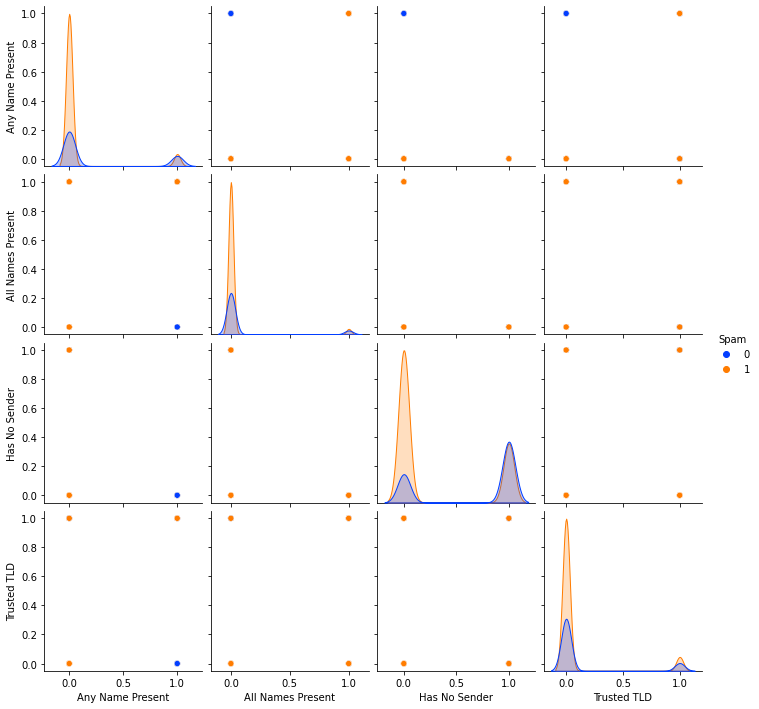

In [2]:
y = iris.Spam
X = iris.drop('Spam',axis=1)
sns.pairplot(iris, hue="Spam",palette="bright")

In [7]:
dfham = iris[iris.Spam == 0]
dfspam = iris[iris.Spam == 1]

In [8]:
print(dfham.mean())
print("-----------------------------------")
print(dfspam.mean())

Any Name Present     0.226368
All Names Present    0.084536
Has No Sender        0.682157
Trusted TLD          0.129818
Spam                 0.000000
dtype: float64
-----------------------------------
Any Name Present     0.072810
All Names Present    0.034343
Has No Sender        0.279687
Trusted TLD          0.083687
Spam                 1.000000
dtype: float64
